# GC Frameplot
Generate a GC frameplot for alternate coding phage 
window size of 210 with step size of 15 a good start 
3 lines - one for each position 
number of sequences ? 

In [1]:
#imports 
import numpy as np 
import seaborn as sns 
import pandas as pd
from Bio import SeqIO
from dna_features_viewer import GraphicFeature, GraphicRecord, BiopythonTranslator

In [2]:
seq = 'TGCAGAAGAGACTAAAGTCTTATCTCTCCTAACCACTTCTATTACCAAATCTCTTCTGGAGTATATTAATAAGCAAGATTTTAAGGAGTTATGCAATATTTAGAAATGAATAAGTATCAAACTGAACTAACTGAGGAACTAATGAATACCCTTCCTCAGGAGGTTCAGGAACAATTACTTGAGACTCTTACTACAGTAGAGTTTGTCAAGAGGCTTATATCCCCCAACAGACCTTATGCAAGAGATTTACCAAGAGATGAAAAGGGCAGGATTATAGTAGATATTACTAATCCACATATCATTGAGGATGCTGATTATTTCAGACAACCAGCTCTACATTTCTTAAAGTATGGGTGTTATACATTCTTGAAACCCAACAGTAATCCTAACTCTGAGTTCAGGAAACACTGGGATGAAGAGAAGAGAAGATGCTATGAAGGTTATGTGAGAGAATCAGATGGAGAATGGGTTACAGGCTTTAACTATTGGTTTATGAATTATTGTCCCATGATGGTTAATAAACTAATAGAAGGGAGAAAGAAGGCTATTAGAACTGAGGCTTTTCCTTTCTTCTTTGAGGGTATATACTGGAGATTCCATTATCTATGGCAAGCAAGAGAAGGTGGTAAACATGCTATTGAATTAGCAAAGAGAGGATGTGCTAAGTCTTATAGCTTAGCAGCAATTATGAGCCATAATCTTATACTTGGAGAGAGTGAGGAATCAAATAGAAGGGTTATTACAGTACTTACAGCTTATCAGAAGGAATATCTGAAAGATGATAAGGATGGTACTCTATCTAAGTTCAAGCCTTCAATTAACTTTAGCTTTGCTAACACTCCTTTCCCACATCTTATGTTGAAGAACTCTCCTAATGAGATGTCTTGGCAAATGGGTTATAAAGATGAATATGGTGTAGAGAAAGGCTCTCTAAATCAAGTACTTGCTGTATCTGCAAAGGATGATAGTGAGAAGTTGAGAGGTAAGAGAGGTTGGATTTTATTTGAGGAAATGGGTTCTTTCAAAGGATTGCTTTCTCTTTATGATATTACCAGAAAGTCTGTAGAGGATGGTGATTATACCTTTGCTACTATGTACCTTGTAGGTACTGCTGCTGAGAGTGAGTCTGACTTTAGTTCAGCTAAGACTTTGCTTTATAATCCAGATGGTTATAATATATTATCTATAGATAATGTATTTGACAGACCAAAGCAAGGTAAACCTAAGTTTGGTTTCTTCTTTCCCTCATATATTAATAGGGCAGGATGTTATAATAAGGATGGTGTATCAGATGTAGTTAAGGCTCTTATAGAGATTCTTATTGCAAGATACAAGGCTAAATATAGTGCTGACCCTAAATCAGTATTGAGAGTAATTGCTGAGGACCCTATCACACCAGCAGAAGCTATTATTAAGGTTAAGGCAGCATACTTCCCCATTACCTCCCTTACGGAGAGATTAAGTCAATTAGACCAAGATGTACATGCTTATGATGATGTGTATATTGGTAAATTGGTACAGAATAGTAATGGAGTTGAGTTTACTCCAACCAGTGATATACCTATCAGGAAGTTTGGAGTAGAGAATGATACTCCGGGGGCTATTGAAATATATGAAATGCCAGAGAAAGATAGAAGTGGAAAGGTTCCCCACACAAGATATATTATTGGTCATGACCCTGTAGATAATGACCAAGCTGAATCTTCCTCTCTCTCTTCTACCTTTGTTCTTGACTTATGGACTGATAAGATTGTAGCTGAGTACACTGGTAGGCAATCATTTGCAGATGATAACTTTGAGATAGTAAGATTACTATGCCTGTTCTATAATGCAAAATGTCTGTATGAATCAAATAAGAAGGGTATATTTGCTTACTTTAGTAAGATGAATTGTACTCACTTACTGGCTGATACTCCAGAGTTCTTAAGAGATAAACAGTTGATTAAGTATAGTTCCTTTGGTTCTAATGCTAAGGGTGTTAATGCCTCAGCAGCTATTAATGCTTATGCCAATAATCTTATAAGAGATTGGTTGATGAAGCCTGTAACTATTATACAAAATGTTGATGGAGAGGATGTGGAAGTAACAGTTTATAACCTTAACTTCTTAAGAAACAGAGCATTAATTGAAGAGTTAATTGCATTTAACCCAGAGATAAATGTGGATAGAATTAGGGCATTAGGTATGGTTATGCTCTATAGAGAGGAGAAGATGGTCCTATATCAAGGAAATCCTTCAAGAGACTCAGAAGAAGTACCAAAGGATTATTTAGGGAATGATAAGTTCTTTACTGAGAATTATAGGGCAGTGCAAGTGCCTTTTCAGAAACCCAGTAAATTTAGTACAGAAGATGCAATTAAATAAACAAATCACTTATGTACTTGACTAAATGGACTTTTTTACTTACTTTTGTCACAAAATTAAATGATGGAAGACTATGGCAGATTTTTTAAACTTTCCCAGACAGATGCTTCCTTTCTCTAAGAAGACTAAGCAATGGAGAAAGGATTGTCTGTTGTGGGCTAATCAGAAGACATTCTTCAATTATAGCTTGGTTAGGAAGTCAGTAATCCATAAAAAGATAAACTATGACTTACTTAATGGTAGGCTACATATGTCAGACTTAGAACTGGTACTCAATCCAGATGGTATAAAGGCAGCTTACATTCCTGATAGGTTACAACATTATCCTATCATGAATAGTAAGTTGAATGTACTTAGAGGTGAGGAAAGTAAGAGAGTGTTTGACTTTAAGGTTGTAGTAACCAATCCAAATGCTATCTCAGAAATAGAGGATAATAAGAAGAATGAGCTATTACAAAGGCTTCAAGAAATGATAACTGACACCTCAATATCTGAGGATGAATATAATATCAAACTTGAGAAACTAAATGACTATTATACCTATGAATGGCAGGATATAAGAGAGGTGAGAGCAAATGAATTGCTTAACCATTATATCAAGGAATATGATATTCCTCTTATATTCAATAATGGTTTCATGGATGCAATGACAGTAGGTGAGGAAATCTATCAATGTGATATTGTAGGTGGAGAACCAGTTATTGAGAGGGTAAACCCATTAAAGATTAGGATATTCAAGTCTGGGTACAGTAATAAGGTGGAAGATGCTGACATGATAATCCTTGAGGATTATTGGTCTCCAGGTAGAGTAATAGATACATATTATGATGTATTATCTCCAAAGGACATAAAGTATATTGAAACTATGCCTGATTACATAGGTCAGGGAGCTGTTGACCAGATGGATAATATTGATGAAAGATATGGATTTGTCAATCAGAATATGATTGGTGATGAAATAACTGTCAGAGATGGAACCTATTTCTTTGACCCAGCTAATCTATTTACAGAGGGTATAGCAAATTCATTACTTCCTTATGACTTGGCAGGTAATCTTAGAGTACTGAGATTATACTGGAAATCAAAGAGGAAGATACTTAAGGTTAAATCTTATGACCCTGAAACTGGTGAGGAAGAGTGGAACTTCTATCCTGAGAATTATGTAGTAGATAAGGAAGCAGGAGAAGAGGTACAGTCATTCTGGGTTAATGAAGCATGGGAAGGAACTATGATTGGCAATGAGATATTTGTCAATATGAGACCAAGATTGATTCAATATAACAGGTTGAATAATCCTTCAAGATGTCACTTTGGTATTGTAGGTTCAATCTACAATCTTAATGACAGCAGACCTTTCAGTTTAGTGGATATGATGAAGCCTTATAACTATTTATATGATGCTATTCATGATAGATTAAATAAGGCTATTGCTTCAAACTGGGGTTCTATCTTAGAGCTTGACTTATCTAAGGTTCCTAAAGGATGGGATGTTGGTAAGTGGATGTACTATGCAAGAGTAAACCATATTGCAGTTATAGATAGTTTCAAGGAAGGTACTATAGGAGCCTCTACAGGTAAGCTGGCAGGTGCTCTTAATAATGCTGGAAAGGGAATGATTGAGACTAATATAGGTAACTATATTCAGCAACAGATTAACCTTCTTGAGTTTATTAAGATGGAAATGTCTGAGGTTGCAGGTATATCTAAGCAAAGAGAGGGTCAGGTTTCATCAAGAGAGACTGTAGGTGGAGTTGAGAGAGCTACTCTTCAATCAAGTCATATTACTGAATGGTTGTTTACTATTCATGATGATGTGAAGAAGAGAGCTTTAGAGTGTTTCTTAGAGACTGCAAAGGTAGCTTTGAAAGGTAGAAACAAGAAGTTCCAGTATATATTATCAGATACATCTACCAGAATAATGGAGATTGATGGTGATGAATTTGCTGAGGCTGATTATGGTTTAGTTGTAGATAATAGTAATGGAACCCAAGAGCTTCAACAGAAGTTAGATACTTTGGCTCAGGCTGCATTACAGACTCAAACTTTATCATTCTCTACTATCACTAAGCTCTATACATCTTCAAGTTTAGCTGAAAAGCAAAGACTAATTGAGAAAGATGAAAAGCAGATTAGAGAAAGACAAGCACAGGCTCAGAAGGAACAACTTGAGGCTCAACAGCAAATAGCTGCTATGCAACAAGAGCAGAAAGAAGCAGAACTTCTCCAGAAGGAAGAAGCTAATATAAGAGATAATCAGACTAAGATAATAGTAGCTCAGATACAATCAGATAGTTCTAATGAGGATGATGGTATTGTAATTGATGATTATAGTCCAGAAGCTAAGGCTAATCTTGCTGAGAAAATAAGAGAGTTTGATGAGAAACTTAAACTTGATAAGGACAAATTAAAGCTGGATAAGAAGAAAGCTGAAACTGATGCAAGTATAAAGAGACAAGCTCTAAGAAAGAAAAGTAGTACAACTAATAAATAAAAGATATGAAGACAATAAGAACTTTAAAAGTAAGTCCTAATGCTCCTGATACTAACTCAGTATGGCTGAATAAGAATACTGCAAAGTATTTTAATAATGGTGCTTGGACTACTATTGGAGGTGGAAGTGGCATAGAGAGTGCAGAGTTTACATCTGACAGTTCTTCTGCTATAATGAATCTACTTCCAGAAGGAAGTACAGAACCAATACAAGCCTATCTACCATTAGCTAAAACTAATGCTTATGGGTTAGTGTTACAGGCTGCTTATACTGGTAGTTTAGCTGCTGATGCAGAGTTAGCTACTGTGATTACTAAAGTGAATGACATTATAAGTAAGCTAAAAGTAGCTAATATAATGGACAGAGGTGCAAACTAAAATCTAAAAGAATATGTATTTTACACAAGAGGATTATAGAAAGATAGAAAAGTGGCTTCTTGCAAACAGTAAGAAAGATACTCAGTTTGTAGAAGCTGCTACTCCTCTTCAAGGGAATGAGACAATAGTTCTAGTTCAGGGTGGTAAGAATGTAAATACTACTGTCAGTGATATAGTAAGTCAGTTCTTCGCATTAGGAGTATCAGACTTTATCAATGTCACTGATAAGTATGGTATATCTTATAATACTCTTGATGAAGCTATTAGAGTTATACCTTGGAGAAGTAGAAAAGTAGGTCAGGTTATTACCTTCCTAAATGAACAAGGTGAATGGCACTTATACCAATATCAAGGTGAGTCTGTTCTAACTTGGAATAACACTACTTTGTGGGTAGACTTACTTGAGTCTAGAATTGTTAACTCTATACTTCCTGATCAAGAAGACTTAACTATGACTGAACCTGATGCTGATGGTAATTCCTATATGCATTTCAAGGATAAAGATTATAGTATAGATGACTTCTCAGGTTTGGGTGGAGTATATTTAAGAAAGAACTTACAGACTCTTACAGACCCTAATACAGATGAAACCAGATTAATTAACTACCTTACTCAAACTATGGTTGGTAAGGAGAATGTTATTTATCATATACAGTATGATTATAATCTTAATGGTCAGACTATAATTATACCAGAAGGTTGTGTTCTTTTATTTGAAGGAGGTTCCATATCTAATGGTACTATCAATTTTAGCAATACATTCCTTACAGGTGATATAAAAATAAAGACTGATTTATTAGGAACTATTAAAAATAACAGTTTAAATGTCTTGTGGTTTAATGTTACTGGGGATGGAAATACAGATGATAGAAAGGCAATACAGGATATATTTAATATAGCAGCTTCAAATACTACAGTATTGTTTCCAAAGGTACAGAATTATTATAAAGTTGTAATAGGTACTGGTACTGGAAGTACTATTATAGACCAAAGAGCAAATGCTGTAGCCAACAATACCTTATATCCTATAACTGTATCTAATGATAATGTTGATATTGTTATCAAAGGTACAATAAAGTCTACTACAATACTTGGTAATATGTTTGAATTATCAGGTAATAATATATCATTATTAGGTGAAGGAGGTAAACTACAAGGACCTGGTGGTGCTGATGATGTAGGATTCTTAGATACTAATACTGCTGATACTGCATTACAGTGGCATCCTTGCTTATTGAAGGTAGATGGCAATAATTGTAGAGTATCTAATCTTAGTTTTGAAGACTATCCTACTCATGGTATTGATTGTTATGGAACAGCTTTAATTGTAGATTCATGCTTATTTATAGGTGGTAGAGTTAATCATTCTACAACTGGTGGCACAGTATTAATGGGTATTAGAACTAATGTTGGTGCTGACTCAGCTATCATAAAGAATAATAGATTTATAGCTAACTCTATTGGAGGTAAATGCTACAGCTGTGTGTTCCCTTCAGGTAATAATTTTATTATCTCAGATAACATCTGTGAAAAGTATCATGAACATGCTGTTTATGCGTATGGTGACTATGGTAGTATATTTAATAATAAGTTCACTGATGTAGATTGTATAGCTTCAGACATACAATACTTTGCTACTTATGGTAATATAAAAGGCAATTACAGTATTGGTACTGAAGGTTTTATTCAAATAATGCATGGTAAAGGTACTATTGTTGAAGGTAATATTGCTACTGGATGTAGAGGAGGTATTATAGTTAGACCTTATCACACAGTTGATGTAACTAAGTTACCATCAGGATTAAAGATAGTAAATAACTTTATAGAATTATCTATTGGTACAACTGGAAGTTGTTTAAGCTTTTATGTAGTTGGTACTTATGATATTTCAGATATTCTTATTGCAGGAAATACTTTTAGTAATGGTTACTATACTCAAACTTCACAGGTTGCAGCTTCTTTATTAATTGGAGCTGGCAGTTCTGGAAATAATGGTATTAAGTTCCTTAGAGTAGAAAATAATATAGTTAGAAGTGGTAGAGGTGCTGTATCTTGGTTAACAGGTATTCATAACTCTATATTCAAGAATAACAAGTTTATTAGTGAGAGTTTGGATGGAGTAACAAGTGCTTTCTCATCTGCAATTAATGCTAACTATGTTACTGACACTATATTTGAAGGTAATGAATTTATAGATATAAAGTCTACACCTACTATGGCAAGAGCTATTCAGTTAAACACTGGTACTACTAACCTGACAGTTGCAGACAATAATATTATAAACTATACTTCTAATATTTACTTAGACTATGACACAGATGCTAAGCTGATATATAAAAGAAATAACAGGTTAAATTATATACCATTAAATAGTACCACTGCTAATAGACCTGCTGCTTATGCTCAAGAGAAAGGTTTCAACTATTTTGATACTGACTTAATGAAGCCTATGTGGTGGAGTGGTGTAGCATGGAGGGATGCAGATGGTTATCCAATTAATACTAAGGTTGGAACAACTGCACAAAGACCATCTCTTGCATCAACTTTTGTTGGATTTGAGTATTTCGATACTACTCTAAATGCACCTATTATGTGGGATGGAACTAAATGGATAAATGAAGATGGTACTTTAACTTCAAAAGTAGTAATTGTTTAAATTAGTAAATGATGGAAAATCAGCAATTAATTAAAAAGGATAGGAGTGCAAACTCCTATTCTAAAATATTTCCTTGGACCTTTACAGACCTAGTTCTTGATAGAGTTACCAAGGAATCTCTTGATAATATCCTTGTAAGGAATAACTTTATAGCCTTACCTTATGTTGGTAGTAAGGCTGCAACTAGATTACAGGTTCCTATGAAGAATAGGAGAAGAGGTATTTGGTTAAGTTACATAGATTATGCAGGAACTTTAACAGTTGAGTACTATAATGACAATAACTTAGATGATAATCATTGGCAGGATAGTTCTTACTGGTTACCATATAATACAGCAGAGTTTCAACCTGCATCTGTTGGTTTGTCTGCATTAGCTCAAGAAGTATTTGATTGGATTAACAGTCAGATTACAACAGCAGTTAAGTTAAATCCTGAAGATTTACAGAAGAATAGTTCTGGTCAGATTGAAGAAGCTAATAGAGCTTATGACACTTCAACCTTTAGTGGTTTAGGTTATAGAATATTAAGAAAGAATATTCAAAGTAATAAGAATATTCTTACTCAATCTATGATCAACATGCCTAATAATGTCTATAAGATTAGGTATGACTTTGACTTAAATGGTGCTACTATCAATCTTCCTGCTAATAGCGTATTACAGTTTGTAGGTGGTTCCATTAAAAATGGAACACTTAATGGTAATAATACTGTTATTGAGGCTGATTCTAATGCTGTTATATTTGACAGTGTAGTTATTGAGGGTACTTGGAATGTTGAACATATCTATGATTCATGGTTTGCTTTTAACACCTCTCCTTCTTATATATCTAATCAAATTATAACTAATATATTAGCTCTTTCAAATGATGATGTATATAATACTATTCATTTTGATGCTGATAGAACTTATTATTTTGAATTACCATATAAAGGAAGAGCTAATCTTGGAGATGATGTAAGACCAGATTATTGGAAACTTAATACTGAGGAGTATTCATTTCTTAGAATCTTTACTAATTTTACATCTAATACACATCTCATAGTAAATAACACTATTCAGATGTTACCTACTAATCAAGGTGCTTACTTTATATTTCATATAGAAGGTAAAAGTAATATTGAAATTAGTGGTACAGGTGTTATTAATGCTGATGCTAAAGATCATTTATATACTGATCCTTTTGCTGGTGCTAATTATTATGGTGAGTGGGGACATATATTTAACTTTAGAAGTTGCGATAATATAGTAATTAGAGATATAACTGTTGGTTATGCATTTGGTGATGCTTTGGCATTTAGTAACATTGCTTATAATAATAATGGTACAAAAGCTGCTGGACCTGCAACTAAGAATGTATTAATTGATGGAGTTAAAGTTTTATATGCAAGAAGAAATGGTATTGCTTTAGGAGGTAATAATTACACTATAACTAATGTATATTTTGAAGGTTGTGGTAGTGATGAAATTAAAGGTACAGCTCCTATGGCTGGTATAGACTTTGAAAATGACTATACTGAAGTAGAACCTTCTGGTGTATGCAGTAATGTATCAATGAGTTCTTGTAAATTCAAGAATAATAAATATGATGTTTCTTCTACTATTAGAGATGATTTAGGTCCTGTACCAAGAGGTCAATTAGTCACTATTAGTGATTGTAATTTTACATCTCCTCTTAGATTAAATAGAACTAATGGTCTTACTTTCAATAATTGTCATATTGTAGGAATTAGTAATCATGATAATTCTATTTCTCCTTGGTTTGCAAGTAAGGATTTAGTATTTAATAGTTGTGTATTTGATGAACTTAATCCATATCTTGCTATTAGTGCAGAAGAACAGAATAAAAAGTTTATTAATCCTACTTATCCAGAGGATATTAAATATAGTACTACATTTCAGCAAAGTCTTGCTGCTGGCAGAGCATTGAAATTTACTATACCTAAACCATTAGTAGGCTTAGTAGAATTTACTGCATTTTGTAGTAATCCTAACTATAGTGCTGTTCAAATGCCTATAAATATTACAGAATATAGTTTCGGAAATAGTCAAAGATTAACAGGTATTAGAGATATAAAAGTAAAAGCTGCTCAAGATAATACTTTAAGATATGCGATTTATAGAAATGTTCCAGTATTTTCTTATATTAATTATTCAGAAGATGCTGACAATTTTAATATCTACTTTGCTATTGGAGGTGATTTAATTAGTAATCCTTTAGGTGGTAATACTTCAGTTAATATATTCTTAACTTCTAAAACTAAATTTATTGTAGTTGAAGATCCTGTTAGTGAGAATCCAGGAGTTGCTGGTATGTATGGAGGTAAATGGTCTACATTATCTGCTATAACTAAGTCAGTTATAGATGTTACAGCTATACCTTCAAGTGTTACTTTTCCAAGTAAAGAAATGTTTTCAGCTAATATGCTTGCTGATTTACCTACATCTCTTACTGCTGATAAAGTTGGATTTAGTCAATATGTATTAGATAATAGCTATAAATGTCCTGTATTTTGGGATTCTTTTTCTAGTGTATTTAGAACTGCTGATGGTAATAGAGCTTTAGTAAGAAGTGTTACTTCTTCTGATGCTTTGAATACTCTAACAGATCAAATGACAATAGATGATAGAGGATATGTAGTTTATACCACTGTTAACAATAGTTATTTAACTTGGAATGGTTATGATTGGGTAAATGAAGATGGTAGCTTATTTACTAAAGTTAAGTATGTTAAAAGAACTGTAGATATTACTGTACTTAATAATATATTTAGTTATAGTAATGTAGTATATAAAATAGTTGGAGATATAGATTTAGGTGGTGGAACATTAACTATTGCTACTGGTTCTACTCTTGACTTTCAAGGAGGCAGTTTTAGCAATGGTACAATTGTTGGCAATAATACTAAAATAATAGCAGGTTTACAAAAGATATTTAATAATGATATAATTCTTACTGGAACTTGGAATGTAGAAGAATCTTATCCAGAATGGTTTGGAGCAGTTGGTAATGGTGTTACTAATGATACAATAGCTTTAACAAAATGTATTAATTATTTTACTGTTACTTCTTTAAGTGCAAGAACATACATAACCGATCAAATAGATGATATACCATCTTTTAGAACTATTAAAGGATGTGGAAAGAAATCTATTATTCAAGCTAATCCATCAATGGAATTGACTAATAATTATCTTTTAAGAACTAAAGATGGAGGTAGTGGTATTATATTTTCAGATTTTGTATTACTTGGAGGTAGTAATTCTACAGAAGCTAATTATAAGATAGGAGGTATTTTATTAAGAAGTACATCAAATGATGTTAATGATCAATGGGATACGAGAAACATTATACAAAATGTAGAAATAAAGAATTGTTATGCAGCTTCTATTTATATTGGTACTTATCAAAGAGAAAATAAAATAGTTAATTGTTTTATTTCACATACAACTAATGTTGGTATAAATTGTAATGGTACAGATAATATGATTATTGGGTGTACTGTTGCAGGTAGTCATCAGGAAGGTATTATTATAAATGGTAATAATAGAATAGATAGTTGTAAATGTTTTGGTTGTGGAGCAAGTACTACAGAAACAGACAAATATGCACTTAAACTTATAGGTAATAAATGTAATGTTTCTAATGTAGAATTACAGCAAAACAATTATGGAGGTTGTATTATTCAAGGTAATAGTAATTATGTTCAAGTAACTTGTGATAATAATGGTTCTGGAACTACTACTACTGTAATAGGATGTAATGTTGTTGGAAGTTATAATACAGTTATAGTTACTTCATATAATTTTAGTTTCCATGATGATAATTATGAAAGATATTTTGTATCTACAAATTGGAATACTGTTGGAAATAATATTATTATTAATGGAACTCCATTAGCAAATAATAAAATGGCTACTCTTTCTCCTTGGAGTATAGATAATATTTGTAACAATATATTATGGAATGGATTTAATCTTACTCAAGCAAGAGAAACTCCGTTTAATAAATATTTGGTTCCTAATAAATATACTACTAATGGTACTGGTACATTTATTCAGAATGATTGTGGATTAGCATTTAGAATAGCATCTGCTACTGCTATAAATGCAGATGTATTATCATATTCTTTTTCTATACCTAATGCAATAATGATAGACAATAATGGTTGTTTTTCTGTTAAAGCAAGGTTTCATAAAGATAGTGATGTTAATTCTATAATATATCCTGTTATAAGAGTAATTACAACTTATACAAATAGTTCTGGTTCTTCTATTACAAGAACTGATCAAAATGTAGTAGTTAATCTTTTAGATAACAAAGATAGTTTAGATGTATATGCACTAACTTCTTATCATTATTTAGATGATAAACCTGTTTCTATTAATTCAATTATTGTTGAATTTGTAGTTATGTCAAAAGCTATAGCTTCAGGTTTAGCAATAAATGCTTATTTTGATGATATTAGAATAGGAGCAACTACTGCTGGAGATAAAATAGCTTTTTTAAATGAAAAAGGTATAACTTCTGCAAGACCTACTTTAGCATTAGTTAGTGCTGGATTTAAGTATTACGATACAACTCTAAATAAATATATTATGAGTAATGGTACAGCATGGACTAATCTTGATGGTAGTGCATTAACTTAATGTATAATGGGAGGACACTTAAAGTGTCCTTCCTATTTGTATATATGAGAAATTTTTAGTATATTTGTAACAAAATTAAATAATATGGCATTAAATATAACAATAAATAAAACAGCAGTAGCTGCATCATATCCTGCTGGGAGTACTGTAGCTACAGCAGTAGCTAGTGGAGGAACTACTCCTTATACCTATAGTTTAGCTACAGGTGGAGACTATTTTAATATAGATTCTTCTACAGGAGTAGTTACTACTAAAGCACTAATGGATGCTGGTAGCATACAGTCTTTCTCTGTTACTGCTACAGATAGTAATTCTACTCCAGAAAGTATTACATCTGGAGTTGTATATCCTAATATACAAGCTGCAATTCAAAATAAGTTTAGTAACTCTAATATGATATATAAGATTACTAAAGATATAGATTTAGGAAATGGTATTCTTACTATTCCAGATAATTGTACATTAGATTTTCAAGGAGGAAGTTTTAATAATGGAACAATTGTTGGAAGTAATACTAAAATTGAATCTGGATTAACTAAAATATTTGGAACAGATATTACACTTAGTGGTACTTGGATTGCTGATTCATTATCTCCTGAACATTTTGGAACTACTGGTATAAATGCTACTCAAGATACTACATATATTCAAAAAGCATTAGATTGTTGTTCAGCTATTAATATAAAAACTGTTAAGTTACAAAATAAAACTTATCAGATAAATAGTTCTTTATTTATACAAAGTAATATAAAATTAGAAGGAGCTGCTTCAAGAGTTTGGAATAATGGTAGTGCAACAATATTATCTTTAGCTGAAAATGTAACAGGTATTACTGTAGAATCTACAGGAGTAGAAATAAATGATTTAAAGATAATAGGTGATACTACTAATACAGGTATTAGTTTTACTAATAGGTCTTATTATTTTTCAGGTAATAGAATTATAACTACTGGACTTGGAATAGGTTTTGATATACAAAGTTCATGGACTTATATATTTAACTTATGTAGAGTTGAAGGAGGAACTATTGGATTTAAGATTCAAGAAGGGACAAGTGGAACATTTAATTCTTGTGTTGCATTTAGTTGTACAGAATATGGTTTCTATGTAACTAAATTGAATTATGGTAGTTTCAATGGTTGTGGAACAGATGGTTGTAAATATGGTTTTTATTTTACAGATGCTTGTAGAGGTGTTACTTTATCTTCTTGTGGATGTGAAAATACACAAGTAGGTGGCTATATGGTTAAATGTGGTGCAAGAGCTTATGTTACTATAACAGCATTTAGTGTTGGTACTATGGCAGATATAGATTGTGATCTATTTATATTTGAAGATGGTTGCAGAGTAAGTTTAATAGACTTAAATGTTGGTTCATTATATCATCCAACAGGAAATACATTAATTGTAAGTAGTGGTGCTTCTGTTGCTCTTATTAATTGTTATTTAACTGGTAATGTTACAGGATTAGAATATTGTACAACTATAGGTACAATAAGTGCAAGACTTAAAGATACTACAGTATCTAAAATAAATAGTGTTCAACTAACTACTCCTGCTTTAGAATCACAAGGAACTCAAATAATTACTCAAGCTCCTTTAAATTCTGTATATTTAGCGGTTGCTACAAATCTTGCAGCTTCAACTGCAAGAGGATTTTCAATTATTACTATACCAACTTCTTATGGAAGTGCTACTGTTGATAAAATTGTAACTGATGGAACTTGTGAATTTTCAGTAGATTCTACAGGAAATATTATAGCTAAAAATATAAGTGCTTCTACAAGAACATATACAGTAAGTTTGTTGAAGTTGAGATAAATATTTTAATAATAAAGAAAAATCACTTTCAAGTGAAAAGCATGTTGGCATAATTAATACTATATCAACTCAATTAATAATCCACTTATACACTTGTATGGGTGGATTATTTTTATTATGTTTGCACAATAATATAAGGGAAGAAGATATGAAGAAGTATATAATAATCCTTATTCTAATATTGATTGGAGCTGTGGCTTATCTATCATATCAGAATAGACAATTAACTACTAAGTATGAAACTTCCATTGAGAATGTTAAAGCCTATGATGCTCAATTGAGTGGACTTGAAGGTGATAATAGAGTATTAAAACTAACAGTTGAACAGCTTAACTACTTCAATGATTCAATCATTAAGAAGATGAAAGTGGTCCAGAAGGAATTAGGTATAAAGGATAAGAGACTACAACAGCTTCAATATGAAGCCAGTCATGCACAGAGACATGATACTATTGTTCTAAGAGATACTTTATTCAGAGACCCTCAGTTAAAGCTGGATACTATAGTGGGAGATAAGTGGTTTAAGACTAATCTTCATTTAGAATTCCCAAGTACAATAGCACTCAGCCCTGAGATAGAATTAGAGAGATATACATTCATAAATGGTAAAAGGGAGACTGTGAATCCACCAAAGAAATTCTTCTTATTTAGGTGGTTCCAGAAGAAACATACAGTAGTAGAAGTGAATGTAAGGGAAATGAACCCTTATGTTAAGAACAAAACTCAAAGATTTATACAAATAATTGAATAGTTATGATTGAAAGTGGAATACTTATTACAGCATTAATAGGTATTGTAACCACATTTACTTCGGGATTTACTGCATGGTTCTTTGCAAGAAAGAAGTATAATAGTGAGGTTGACAATAATCTGATAAATAACATGAAGGAGTCTCTTGAATTTTATACAAGGCTTTCTGAGGATAATAAACTCAGGCTTGATAGAGCTTTATCAAGGAATGAAGAACTTGAAAAAGAGGTTAAGGTATTAAGGCAACAGGTGATGGGCTTAATGACAAGTATATGTACAGACCTATCTTGTCAGATAAGAAAGGGGAATTATGAGGATGTAATTAAATTAAAAGGTAATTAATATGAAAAGAGCACTTAATCTTGGCACTCTTTCAAGGATAGTTGAAGGAGACCCAAATGAAGTTACAAATAATGAGATTCTTGTCATAAGAGATAATCTCTCTGGTAAGATTGAGGATATTCAAGTAAGAGGTACTGGAGGTGTATTGGAGTCAGTTCTTGTTGAAAGAGTTGCTTTTACAATTAAAGCTACTCCAACAGATGCTACTGTAACTATTAATAACACTAACAGAGATACTGTTATAGTTACTAAGGGTTCTACAGTACAATGGTCAGTATCAAAGACAGGATATACTCCTCAAAGTGGTAGTCAGATAGTAGATGCTGACACAGTAAAGGATGTTACACTGGCACAAATAGTAAGCTAATATGGAACTATTACTCAAAAGAACATTCAAAGGACCTCAATATACCATAGGTAAACTCTATGTAAATGGAGTTTATGAATGTGATACTCTTGAGGATACTGACAGAGGACTTCATGAAACACAATCTCTTCTGGAGATACAGAGTAAGAAGGTCTATGGACAGACAGCAATTCCCTATGGGACTTACAAGATTGATATGAATACTGTAAGTCCCAAATTCAAGGATAGGTCATGGGCTAAATTCTGTGGAGGAAAGTTACCCAGACTTATAGATGTGAAAGGATATGAGGGGGTACTAATCCATGTAGGTAATAAAGCTGAGGATACTTTAGGTTGTATCCTTGTGGGAGAGAATAAAATAAAAGGGCAAGTTATTAATAGCACAGCTACCTTTCAGGAGTTATATTCAGTTATGCTGAAAGCAAAACTCCTTGGAGAGGAACTTAGTTTAACAATAGAATAGGAGAGTTTATTTATGGCAAAGACTTGTAAATCAGGTGGAAAGATGCCACCAAAAGGTGGAAAGAAACCTACAAAGAAGTAGAAATGGGAAGGGTGTAGTATTATTACTATACCCTTATCTTTTGGCAGTAAATAAGTAATTTATTTATAGAGTTGTAAGAGTCTTATTTACTATGTTGTAGAAGTCATAAACTCCTCTTATCTTTGCATCAGTTTAATAACTAAAGGAGTAGAAATATGATAGGAGAATTAAGTGAAGACCTCATTATGACAGGGGATGAAATAGATGTAGAGAATCTATTTTCTGATGATGGGGGTGAAGAAGAAACACAGGTAACTCCACCTGCCCCAAAGGAGAAAGAAGATAAAGAAATTGAAAAAACTACTGAGGAAGAAGAGATAAATCCTGATGATTTATTTGATAATCCAGAGAGCGTAGGTAGTGGAAAAGATAATCAAGAAGAGGAAGATACCCAATCTGAAAAGGACAAAGGTACTTCTCCCAAAACTAACTTCTACTCTTCCATTGCCAGTGCCTTGAAAGAAGAAGGTATCTTCCCTGACCTTGATGATGATACTTTAAATGGCATCAAGACCCCAGAAGATTTTGCAGAAGCAGTTGAAAAGACTGTTCAAGCAAGATTGGATGAGAGACAAAAGAGAATTGATGCTGCATTACAAGCTGATGTAGAACCAGATGAAGTAAGAAGGTATGAACAAACCCTTGCTAATTTGGATGCAATCAAGGAGGAATACATAACTGATGAAACTGAAAAGGGTGAAAGATTGAGAAAGAACTTAATCTATCAGGACTTTAGGAACAGAGGTTATAGTGAAGCCAGAGCTAAGAGAGAGGTTGAGAAATCTTTCAATGCTGGCACAGATATTGAAGATGCAAAAGAGGCATTGGAAAGTAACAGAGAATACTTTAGCACTCAATATCAAGACCTAATCAAGGAAGCTCAAGAAGAGGCAAAAGAAGAACAAAGGAAAATTAAAGAAGAGGCTGCACAATTAAAGAAATCAATGCTTGAGGACAAGGAAGTATTTACAGGTATTACACTTGATAAGACTACAAGACAAAAAGCATTTGAGAATATTACTAAGCCTGTCTTTAAAACAGAAGATGGAGAATATTTGACTGCCATTCAGAAATATGAAATGGATAATCCAGTTGAGTTTAGAAAGTATCTGTCTGTATTGTTCACTATGACTGATGGCTTCAAGAATATTGATGGTCTTGTAAAAGGTAAAGTAAAGAAAGAAGTCAAGCAAAGTCTTAGAGAATTAGAACATAAACTCAGTAGTACTGCAAGAAATTCATCAGGTAATCCAAGATATGTTGGAGGAGTTGAGGAAGATACTGAGTCTTATATTGGAAAGGGCTGGGACCTTGATGTCTAAAAACATATTAACTAACAAAAATAATTAACAGATTATGGCTGGTAAATTAGGTAAATTTCAAATGTTAGGCTTCCAACACTGGAAGGGTCTGACAAGTGACAACCACCTTGGAGCTATCTTCCAACAAGCACCTCAGAAGGCTACAAACCTTATGGTGCAACTGTTGGCTTTCTATAGAGGAAAGAGCTTGGATACATTCCTTAATTCATTCCCTACAAGAGAGTTTGAAGATGATAATGAATACTACTGGGATGTTATTGGTTCTTCAAGGAGAAACATTCCTCTTGTAGAAGCAAGAGATGAAAATGGTGTTGTAGTTGCTGCTAATGCAGCTAATGTGGGAGTTGGTACATCTCCTTTCTATCTGGTATTCCCAGAAGACTGGTTTGCAGATGGTGAGGTTATTGTAGGTAACTTGAACCAAGTATATCCATTTAGAATCCTTGGTGATGCAAGAATGGAAGGTACTAATGCAGTGTACAAAGTAGAACTTATGGGTGGTAATACTCAAGGTGTTCCTGCTGAGAGACTACAACAAGGAGAAAGATTCTCTATTGAATTTGCTCCTGTAGAAAAAGAACTTTCAAGAAAGGTTGGTGATGTTAGGTTCACTTCTCCTGTAAGCATGAGAAATGAGTGGACTACAATCAGAATCCAACATAAGGTAGCTGGTAATAAGCTAAACAAGAAACTTGCTATGGGTATTCCTATGGTTAGAAATCTTGAAAGTGGAAAGCAAGTGAAGGACACTGCAAATATGTGGATGCACTATGTAGATTGGGAAGTAGAACTTCAATTTGATGAGTACAAGAACAATGCTATGGCATGGGGTACTTCAAACAGAAATCTGAATGGTGAATACATGAACTTTGGTAAGTCAGGTAATGCTATTAAGACTGGTGCTGGTATCTTTGAACAAACAGAGGTTGCCAATACTATGTACTACAATACATTCAGCTTGAAGTTACTTGAAGATGCACTGTATGAACTGTCAGCTTCTAAACTTGCAATGGATGATAGACTCTTTGTAATCAAGACTGGTGAAAGAGGTGCTATTCAGTTCCATAAGGAAGTATTGAAGACTGTATCTGGTTGGACTACATTTGTACTTGATAATAACTCTACAAGAGTTGTTGAAAAAGTTCAGTCAAGACTTCACAGCAATGCACTTAGTGCTGGTTTCCAATTTGTTGAATACAAGGCTCCTAATGGTGTTAGGGTAAGATTGGATGTTGACCCATTCTATGATGACCCAGTAAGAAACAAGATTTTTCACCCAATGGGTGGTGTAGCTTTCTCTTACAGATATGACATCTGGTATATTGGTACTATGGACCAACCTAATATCTTCAAGTGTAAGATTAAGGGTGACAATGAGTACAGAGGATACCAATGGGGTATCAGAAATCCTTTCACTGGACAAAAGGGTAATCCTTATATGTCATTTGATGAGGACTCTGCTGTAATTCACAGAATGGCTACTTTGGGTGTTTGTGTGCTTGACCCAACAAGAACTATGTCATTAATTCCTGCGATTCTGCAAGGATAAGCATAAATAAAAGGGAGGCAGGTAATTCCTCCTCCCTTTTTCTTTTTTAAAATGTTAAATGGAGAAGTAATATGGCACAAGAAGTTAGTAAGATGGTTTTGGATGATGAAGAGATTATGAAGGAAACACCAGTTGTATCTGATGTGAATGACCTCTTTGAGGAACCAAAGACAAGAAAAACAAAGAAACAAGCAGTAATAGAGGACAATGATGAACCTATTAGCTGCCTAAGAAATGAAAGAGTTATAGTAAGGTTTGTTCCCAAGCAAACTGGTTTAGTTTCAAACCCTAAGCATATCCTATATGGAGGTATGGCAGAAGCAGCAGTAAGATGGTTTACTCTACCAAGATTGAGTTCTGGTATGTATGTAAATGCTCTCACTGATAAAGAGAAAGCCTATCTTGAAGAGATAATGGGTCTTGAATATAATGCTCTATCTATCTACAAGAAGGTAGATAACTTCTGGGATAATTATACAGTGAGATTAACTAAGCAAGATAATTTCTTGAACTTGGCTGACCCTGATGATTATATCAAATATAAAATCCTTTTAGCAAACAAGGACTATATTGCATCTTCCCTTCAAGAGCTGCAAGACAGACCTAAAATGACTTATCAGTTTGTAATTGTACAGGAAGGTGAGGAAGCTAAGACTGCTAAGAAGGAAATGAATGCTACAATGCAGTCATACATGAAGTTTGGTGAAATTCAAGATGATGCTGATAAGCTGAGAGTAATCATTGAAACTATTGATGGTAGACCTCTTGCTAAGACAACTAAGATTGAATTCTTACATGAGAAGATTAACAAGCTAATTCAAGCTGACCCAAAACTTTTCTTAAGAGTTTCAGAAGACCAGTATCTTGATACTAAAGTTCTGATTAAGAAGGCTATTGAAGAAGGTCTAATTAGTAACAGAGGTGGTATGTTATACCTGAAATCTGATGGCTCTCCTCTATGTGGAGATAATGAAGAACCTACTTTGAGTGTAGCTGCTAAGTTCTTAAGTGCTCCTAAGAGACAAGAATTGAAGTTCAGTCTGGAAGCAAAGCTAAAAGAATAAAGATATGAATGTTAATGAATTTTCTAATGAATTTGATGTACTCTATAACAACATAATGAGCAATGCTGCTCCGGGGTTAAATGAGTATGAAAAGTCTGTACTGCTTACTAAGGCTCAAGAAGAGATAGTTAAGAACTATTTTGAACCAGCAGGTAATAAGTATGGAAAAGGATTAGATGATTCACCAAAAAGACAAATAGATTTTTCAGAATTAATAAAGGTAGGGGAAGGAGTACTTAATACAAGTGCTCCTACTATCACCTTTGCTAAAGGAGCTAAGGTATATGATTTACCTGCTGACTTATTCTTGGTTATAAATGAGGCTGTTGATACTAATGCAGGAACTAAACAGGTAGTTCCAATCAGTTATTCTGATTATACAAGGCTTATGTCAAGACCTTACAAGGAACCAGTTAAATATCAGGCATGGAGAGTAATTACTTCTTCTATAAACAATATCTCTGTAGAACTAATAGTGAACAGTAATGAAACTATTACAGACTATAAGGTAAGGTATATAAGAAGACCTGCTCCAATTATCACTACTAATCTATCTTCTGAATATGGTGATGTCACAATAAATGGTGTAAGCACTATTTCAGAATGTGAGCTTAACCCAATTATTCATAGTGAGATATTACAGAGGGCAGTTGAATTGGCTAAGGCAGCTTACCAAGGAGATTTGCAGGCAAGTGTTGAATTAGGACAAAGAAGTGAATAATGACTAATAAAGAATTTTCTGATGGATTCAGTACTTTACTTAACTCATTTGGTATCACTCCTAATATAACCCTTGATGAATATGAGAAATCAACATTTCTCACTAATGCTCAGGAACAACTGATTATTGACATCTACTCTGGAAGGAATATTATTTATGGTAAGTCCTTTGAACAGACAGAAGAAATAAGAAGATATTTGAGCAATTTGGTGGAGACCTATGAAACAAGTACTAAGGTTACAGGAAAGTTGGGACTATCACAAGACTCAGTATTCTTTGAGATACCACAAGATACTTGGTTCATTACTTATGAAGTGGCATTCCTCAAGGACAGTAGATTAGGTTGCTTGGATGGTATAGAGGCAAGTGTGGTTCCATTACCACAGGATGATTTATATAGAGCAAAGGATAATCCATTTAGAGGACCAAGTAAAGACAGAGTACTAAGACTTGATATAAAGAGTGATTTAGCTGAGTTAATCAGCAAGTATAATGTGGACAAGTATTTAATGAGATATATCTCTCAACCCACTCCTATTATACTGGTAGATTTACCTGATGGACTAAGTATCAATGGTGTAAGTACTGAAAGTGAATGTGAACTAAATCCTGTAGTACACAGAGCAATACTTGAAAGAGCTGTACAGCTTGCCATAATAAGTAAAACTCAACTAACAGGAAATAAAGAATAAATTATAAATGTTTAATTAAACTAAAAAGATTATGGTAATTTCTATTAATCAAGTAAGACAGCTATATGTTGCAAAGGCTCTCAAAGCTAATACAGCAGCCCTTACAACTGCTGGTGATATTGTCCCAAAGGCAGACACAGCTAAGACTACTTTGTACTTTCAGTACATGTCTCCTGCTGGACTTGTATCAAGTGATAAAATTGACCTTAAGCATGTATTGTATGCAAAGGCTACATCATCAGATGCTCTGGCTCATAAGCTGATTAGGTACTCAGTTACTCTTGATGCAGATGTATCTGCAACTCCTGTAGCAGGTCAGAATTATATCTTGAGATTGGCTTTCAGACAATACATTGGTTTGTCAGAAGAAGACCAGTACTTCAAGTATGGTGAAGTAATTGCAAGAAGTGGAATGACTGCATCAGACTTCTACAAGAAGATGGCTATTTCTTTAGCTAAGAATCTTGAGAATAAGACAGAATCTACTCCTCTTGTGAATATCTATCTTATCAGTGCAGCAGCAGCTTCTACAGATGTTCCAGTTACATCAGCTACTAAGGAATCAGACCTAACTGCAACTGACTATAACCAAATCATCATTGAAGAAACAGAACAACCATGGGTTCTTGGTATGATGCCTCAGGCATTTATTCCTTTTACTCCTCAGTTCTTGACTATTCTTGTTGATGGTGAAGAAAGACTTTGGGGTGTTGCAACTAAGGTTACTCCTACTAAGACTGTTCCTGATGGACACTTAATGGCAGACCTTGAATACTTCTGCATGGGTGCAAGAGGTGATATCTACAGAGGAATGGGTTATCCTAATATCATCAAGACTACTTATCTGGCAGACCCAGATGCAATCTATGATACTCTGGATATTCACTATTTCTACACAGGAAGCAATGAATCAGTTCAGAAGTCTGAAAAGACTATTACACTGATTGCTGTAAATGATGGTAGTCACACTGCAATGAATGCTCTAATTGGTGCTATCAATACTGCATCAGGGCTTACAATTGCTACTTTATCCTAAGTGATATAGCATTAGAAGGGGCATAGAATTAACTATGCTCCTTTTTTTTTTATCAATTAAAAATATGAACTATGATAAAGGGATTTAGTGGAATAATCTATATGTATAAATCTCCTTCTGGTAAGTATTATATAGGACAAACTATTAGACCTAAGTTTAGGAAGAATGAACATGTAAGTAGAGCTTTTAATGGAAGTGAATTACCATTTCACAGAGCTATTAGAAAATATGGGATGGATTCTTTTGAATATTCAATTCTGTGTAAGATTACTTGTTCTAATACTGAAACTCTTTCTGAGATTCTTAATAACCTTGAACAGTACTATATAACTAAATATAATAGTAAAGTTCCTACAGGTTATAATGTTACAGAAGGGGGTGAAGGTAATTTGGGTATTGTATTAAGTGAAGAAACAAAATACAAAATGTCACTATCAAAGGTAGGACATAAATGTTCTACTAATACTAAAAAGAAGATGAGTGAGTGGCAAGTTGGGAAGAAACTTTCTGAGGATACTAAAAATAAAATTAGAGACTCTCATGTAGGAAAAATTTGTAATAAAAGACCCTGTTGCCAATATACCTTAGATGGAGAATTTATCTCTGAATACAGTTCAATAAAGGAAGCAGCAGAAATGAATAATATTAATAAAGTGAGTATATCCCTTGTTTTATCTGGAAAACATAAAACAGCAGGAGGATATACTTGGAAATATAAGGAGGACAATAATAATGATGCACTTTAATGAGCTTAGGATTAGTCAGGATAACAGATTTCTTATTATAGATGTATCTGTAGATAATCAGGACTACTTTGAGGATGTCCTATTAGATAGTATAGTCATTGATACCCAAGATACTTTTGTGATGAATGGACCAAGTGACAATCCTCTTTATGTATATAATGTAGAGGATGCCTATGATTTAACCTATTCTCTTCCTGAGCAATGTAATTGCAATCCAGTAAGAGTTGAGGAAGATGAATCATACTGTTTCACTTATGGTACACAACAAATGAAGAATGTAAGACTTGAATTAAGTATTCAAGACTTAAAGGTTTCTCCTTGCAGTACTATGTTCTTTGTGTATGTAAAGTCTAAAGGTACTCCATCAACTGATACTCCATGTGGATTTGATAAGGGGCAGATAATAGGCACTGTAATTAATTTACAACCTATATACAAACAGACTCTCAAGTATCTAAAGGAAGTAGAATGTGATTGTAATATACCAAAGGGTTTCATTGATATTATACTTAAGTTAAAGGCAATTGAACTTTGTGTTAGAACAGGAAATTATCCACAGGCTATTAAGTACTGGAATAAGTTCTTCATAAAGAATAATTGCAAGTCTCCAACCTCTAATTGTGGATGCTATGGATAAAATGCTTGAAATATCTGAGGAAGCCATCACAAGATACTTTACTACTCTATCTCAATTTGGATATAAGAAGTACAGTGATGTAGATAAGATAATAGTTCTCTTCTTCATGGAAGAAATGTTAGCAGGAGAAATGTCTTATTATGTAACACAAGATGATTACAGGAATATAGTTAATGCACTATATTGTCTGGCAGGAAGTACTTGTATGATAGACTTTCCAATGTTTGAGAGCTATGATACTTTGGTTCATTCTAACAATAGAACCTTTGTACCAAGAATAACAGAGGATAGTATATTAAGAAGTACTGAGGATGATAACTTTAGAGTAGAAGCATAATCTTTATACCCTGAATATAAAAATAGTAAAACCCTTGTAAGTGTAGATAATTTATTCTATATTTGCAAGGGTTTTAAAGTATAACTAAATAATTAATAATATGACATACAATGAGTTAATCTATATAGTATTGGATGAACTTAAGTTGAGTTCTGATGATTCATACTACACTCCAGACCATGTTATATTTCTGCTTGTAAAGTATAGGTCATTCTTACTGAAACAGAGATATTCAGACATAAAGAAACAGATACCAGATAGTGACTATCAGAGTATATGTTTAGACCTTATTGAGGTTCCAGCTATTAGTGGAGAACCTTGTGAAGGTAGCTCCTATTTAAGAAGTAAGAATAAGGTTCCTACTACTATGATGATAGGTAATCCAAGAGTATATCCTATGGACTTCTATCAAGGTGAGATTACTTATATAAGTAGAGATAGAATGAGATATGTAGGTTATAATAAGTTCCTGAGAAATATAATCTATTGTTCAAAAGCTCCTGATGGCTATCTGTACTTCAAGTCATGGAATCCTCAATTCCTGCATCTTGAAAAGGTAAGTTTCAATGCAATCTTTGAGGATGCTAAAGAAGCATCAGAAATGGCTTGTCCAGAAGAGGATGGTGCAATATGTAAGTTAGAGGATAAGGAGTTCCCAATAGAAGATGCTTTAGTTCCTCCACTTGTAGAGTTAGTAGTAAAAGAATTAAGGGGTCCTGAGTATAGTCCTAAGGATGAGGATAATAATGCTCATGATGATTTAGATGATTTGAATAAGAGATAATGGAGACACTGGGAGAATTTAAAAGGAGGATAAAGAAGGTCAACCAACCAAGAGAGTACAAAGTAAGAAACTCACTTGGTGTATATGATGGATATAAGTATTACAGAAAGAATAAACCAGATAGTAAGGAATATGTTCTTACTGAGTCACAATACTTTGCTATCATAAGGAAGATAAACTTACTTTTGGTTGATGAATTATTACTTGGTAATGATGTCAGACTTCCTAAATCAATGGGTACTATTGAGGTAAGAAAGTTTGATAGAGGAGCTAAAATAGGTAAGGATGGAAAGATTCATATTAACCTTCCTATAGACTGGGATAAGACACTTGAACTTTGGTATAAAGATGAGGAGGCTTGTAGAGATAAGATATTAGTCAAGATGGAAGAAAAAGAAAGTTTCCAGATTTACTATAATAAGGAATCAGCCACATACAATAATAAGTCCTACTATGAACTTGTACCTAATAGGGACTTAAAGATAGGAATTAAACAAAATATAAAGAAAGGGGTAATCAAAGATGCTCCTTACTTAGAAAGGAAATTAAGATATGGTTAAAACTTGGATAGTATATAAACATATTTCACCATCAGGTAAAATCTATGTAGGTATTACTTCTAAGTCCAACCCAAATGATAGATGGAATAATGGAAAGAATTATGTAGCATGTAAGCATTTCTATAATGCCATTATAAAGTATGGTTGGGACAACTTTCAACATATAATTATAAATTCTGGTCTTGCAGAAAAGGTTGCTAAGGATTTAGAGAGGAAACTAATTAAAGATTACAAGAAGCTGGGTATCTCTTATAATATAACCAATGGTGGGGATGGTCATAGTGTAGACCATCTTACAGAGTCACATAAAAAGAAAATATCTATAGCCCATAAGGGAAAGAAGCTATCTAAGGAACACAGGAGCAGGATTGGTAGAAAAGGCAGGATAATATCTCAAACTACTAAACATAAAATGAGTGTTTCTAATAAAGGTAAGAAGAAACCTATTGAATTAGTAGAGTCTTTAAGAAAGCATAATACTGGTCTTAAGAGAACTGAGAAACATAAAGAAGCTATAAGAAAAGCTCATAGTAAGGCTGTTTTACAAATTAAACCTGATGGTACTATAATTGAATTTGCCTCAGCTATGGAAGCTGAAAGAGTTACTGGAGTATTTCATAATAGTATAAATAAATGTTGCCACTTGGTGATTAAATCTGCTGGTGGCTATAAATGGAAATTTAAAAATGGTACAGAACAATAATTTTGTAAATATAAGAGTAGTGCTTGACAGATTACTAAGACACCCACTACTTACTGACCTCAATCTTGAGACAGCTATTCAATATACACTGGACTTTATTAGTGCAATGGGACTTCCTAATGTCTATGTTGATAAGATAGAAACAATAGATATTAAGGAGTACAGAGGTGAACTTCCCTGTGATTTAATCTCTATTAATCAGGTCAGATTACATAAGAATGGAATAGCACTTAGGGCAATGACTGATAATTTCAATGCCTATCCTACTCATGACCATAAGGAAGGAGATTGGTATGAGAGAGGAGAGCCTTCTTTCAAGACACAAGGTAGAGTGATATTTACTTCAATAAGACATGAGAAGGTGGATATTAGTTATAAAGCTATTATGTTGGATGATGAAGGTCTTCCTTTAATTCCAGATAACTCTATCTTCCTTAAAGCACTGGAACTATACATCAAGAAAGAATGGTTTACTATCCTTTTTGATATGGGTAAGATAAGTCCTGCTGTACTAAATAATACTCAACAAGAGTATGCTTTCAAGGCAGGTCAATGTAATAATGAATTTGTGATTCCTTCTGTATCAGAAATGGAAGCTATCACTAATATGTGGAATCAACTTATTCCAAGAGTAACTGAGTTCAGAAGAGGATTCAAGAACTTAGGAGACAAGGAATATATAAGAGTACATTAATATGGCACTAAAGAAAGAACAACATTTTTTCAAAGGGATGCAGAGAGACTTATCAGTCTCTAAGTTCAATCCAGAGTATGCCTTTGATGCTCAGAACATTAGAATAACTGCAAGAGATAATAATACTCTCTTGTCAGTTACTAATGAAAGAGGTAATAAGGAGATACCATTACAATCTCCTTCTGGAGACCCTGTAATTATTGATGGAGTATTACTTGGACAGAATGTGCTTAATAATTATGTGACCCTCTTTACAAAAGGTACAAATGATAATATCTACAGACTTGAGAATAAGGGTACTTATTTTGAGACATTACTTCTATTCTCTGGTAATCTGAACTTTAGTACAGACTATCCAATTGAGAGTATTAGTGTATATGAGAATAATAACATTCAGAAAGTTTATTGGGTAGATGGTTTAAATCAAGCCAGAGTTATCAATATAACTAAGGATGATTATAATAATGCTGATGATTTTGACTTTGTAGGAACTATACACACTTCAAGTAAAATAGAAGTTTCTAAAGTTAATGGAAGTGGTGCTTTTGGTCAAGGAGTAATTCAATATGCTTTTACTTATTATAATAAGTATGGTAAAGAAACAAATATATTTAGAACTTCTCCTTTATTGTATATTGCTTATAGTGACAGAGGGGCTTCTCCAGAAGAGACTGTAAGTTGTTCATTCCAAATTAACTTTACAGAACTTGATAGTTCCTATGATTTCATAAGAGTATATTCAATACATAGAACATCTATAGATGCTACTCCTACTGTTAGAAAAGTAGCTGATTTAGCTACTGATACTAAACTTTATGTAGATACTGGAACTACTGGGGAGATAGTAGACCCAACTTTGCTACTATATGTTGGAGGAGAGGAAATAGCTCCATATACTATGACTCAGAAGGATAATACATTATTCTTAGGTAATTATACATTAAAAAGAAGTCTTATTTCCACTGAGTTAAAGAATCAAATTAAATCTGATTCTATTGTTACAACTATATTAGGGGGATTAGATGATGTTATAGAATCTGAATGGAATGTTAATACTCAGTATAATAGTAATTATGATTTAAATTATGATTCAAGAATAAAAGGATTCCAAAAGGGAGAAATTTATAGATTGGGTATTCAATTTCAGGATAATAAAGGTAAATGGAGTGAAGTAGTATTTATAGGAGACTATGAGTGCACTGAAAGATTCAAATATACCCAATATGATACTTATGGGATTACACTTATTCCAAGATTTAAGGTTGTAATAAGTAATTCTACAACTATACAAGCTATTAAGAACTTAGGTTATATAAATGCAAGAGGTGTAGTAGTGTTTCCAACATTAGAAGATAGAAACATATTATGTCAAGGTATATTGTGTCCTACTGTAGCAAACTATAAAGATAGGTTAGATAACTCTCCATTTGCACAGTCCTCATGGTTTAGTAGACCCAAACAAGCTACTGAAACTTGGAAAACTGAGTATAGTGGAACCAATCACTTGTCTGAATTTGGAGAAGTTCCCTACTTTCAACATAATGAACCTATAGGTTCTGCTTCATTATCAGAAATTACCAGATGGGAGATACAAACTTCTTTAGGTCTTGTTCCTTATTATAATCCAAGTACTACTAATGCCAAAGATTTTGTGGATGGTTCTCCTTCTGAGTTTTTAGTAGATGAGAATATAGTTACTATGCACTCTCCAGATGTTGAATTTGATGATAGGTTACAGAATATTACTAATGGGAAATTTAAACTAAGGATAATTGGTACAACTCATCTTACTAATACTTTATCTGATATAAGTGTTATTACTTCCACTCCTACTTATGGTAATTATGCAACTGGTTTTTATAAGGGGAAGGTGGCTAATATGAATATATCTACCTCTTATTATGGTGGTAGACAATTATCTGCTGGATTATTTTGGTCAGATAATGTTAAGTTCCAAGACCCTTCTCCACAAGATAAACTTGAAAGATTATGGATGGTATATCCTTGGCATAGAAATGGTTCTTTAATGAATATGGGTGTTCCTACTGAGGGAACAAGAGCTGCTGCATTACAAAGAAAGATTATAAGTAATCTTAAATTTGCTTCACAGAACAATTATCTACCTAATCAAAGTGTGTGGGAAGCTGAAATTTCTGGAGATGCAAATCACACGGGTATAACACCTGTTAATTCTTGGACAGAGGGGTTAGTTAGAATCCCTGCACAAGCTAATTCTAATTTAGGTTCTTTAAATTATTATGCTAATATAGATAAAGTTCTTACATTTAATAGGAGTGAACAGATTTCTGAAATATACAAAAATGGATATCTGATATACACTACTAAGGATTGGATAACTGATGGAAAGATTGCTGACTTGTTCAATAATGCTATAAGTCAAACTATATCAGTTGACCAAGTACAAGATTGGTTAACCAGAATAGCTGATGCAGATAAATATGGAACTGAGCCTGTTAGTATGAAATATAAATCTAATCCTCATTTAGTATTTGCTTTTAATTATACTAAAAGTGGTAAACAATTAATACTTCCTATGAAGAATAATAATAATGGTTACCTTGCTCCATCAGCAAATAGTAAGCCATTTTGGAATCCCACAGCTCCAGAAGGTGCTGTTTATCAGGACAGTATTAATTTTACAAATGAGAATAGAGCCTTCTTTTGGTTAGCTGAATTATATAGAGATAATGTAGTTAATAGATTTGGAGGAGATACTGAGGAGGCTATATTAAACAACACTTGGTTACCATCAGGAGATTCAGTTATAATAGGGGATTCTATAAATATTGAGTATACAGAAGGTGATACCTATTATCAAAGATATGATTGTCTTAGAACATTTGCTTATACTAATGAAGACCAAAATAGTATTGTAGATATAGTATCTTTTATGTGTGAATCTAAAGTTAATATTGATGGAAGATATGATAAGAACAGGGGACAGGTTAATAATTTAGCTGTAAGTCCTACTAACTTTAATCTATTTAATCCAGTATATTCACAGAAGAATAATTTCTTTACATTTAGAACTATAGATTATGAAAGATTTAGTATAAACTATTTTCCTAATTCTATTACTGTTACTAAAGAAAAGTCATTAGGTGAAGATATAGATACTTGGACTAATATCACTTTAGCTACAACTCTTGACTTAGATGGAGATAAGGGGGAGATAGTTTCTCTTAATACTTATAATAATGAGATATTCTGTTTTCAAAGGAGAGGTTTGAGTAATATATTATTCAACTCAAGAGTACAGATACCAACTTCTGATGGTATGCCAATTGAGATTACTAATGGATTAAAGGTAAGTGGTAAGAGATATATAAGCAATACTATAGGCTGTGCTAATAAATGGTCTATTGCAGAATCTCCTTCTGGACTATACTTTATAGATAATGAGACTAATTCATTATATCTGTTTAATGGAGAAATAGTCAGTTTATCTGATAAGTTAGGGTTTAGACAGTGGATTAGTGCTCATAATGTTCATGTGAACTGGGAACCAGTTGGTTATAATAACTACAGGTCATTCTATGACAAGAATAATAATGATGTGTACTTTACTTATAAAGACCATTGTCTGTGTTATTCAGAGTTGATTAACCAGTTTACTTCATTCATGAGCTATGAAGGAGTTCCTGCTATGTTCAATGTAAGTAGTGAGTTCTATGCCTTTAAAGATGGTAGGATGTGGGAACAGTTTGCTGGAGACTATAATATGTTCTTTGGTGAATATAAACCATTCAGTATTACCTTTGTAGCTAATGCTGAGGAACCAAATGATAAGATATTCAATACAGTAGAGTTTAGAGCTGATAGTTGGGATGGTGATAACCTAATGAGTAATAAAACCTTTGATACTCTTGATGTATGGAATGAATATCAGCATGGTACTACTCCTCTTACTAATCTACTTGGACATCCTTCTCCATTAAAGAAGAAGTTCAGGATATGGAGAGCTAATATACCAAGAGCAATAGTAAATAACAGGGATAGGATAAGGAATACTTGGGCTTATATTAAGTTGGGAATGAACACTCCTAATACATATAGAACAGAGTTCCATGATGCTATTATTCACTATTTTGCATAATTAATAGGAGTCCATAAACATTTTAGTTTGTGGACTCTTTCTTTTTTAATTAATAACTTGTGTATAAATTAGATTTTTCATATATTTGTGCCAAATAATATTTATAGGAGGACAAAAATATGTTATACTTAATCAAAAGTGGGGAATATTTTAAAATAGGTTTCTCATCATCTTCCAATTTAAAGAACAGAATAGATGCTTATCTAACTTGTAATCCAGATTTTGAACTGGTGGGAATAAGGGAAGGCACAAGAAGTGAAGAATCTAAATATCATAAATGCTTGAAATTTTTAGGTCTGCAACATCCTGAAAGGATGGAGTGGTTTAGAGAGAAAGAAGGTATATTAGATATACTTAAAGAGCAGTTTATTTTAGACTATAAGACTCTTTATCCAGAACTTAGAGTAAGTTTGAAACCTTATGAAGGAAGACTTACAACTAAAAAAGAGATTAATGATTCTATTAAAGAAATAGTAAAGAATAAACTAAATCTTGATAATGGGTTCTATCCAAGAGCAGTTCTAAAAACTTTGTTAATTCAGGTATATAAAGATGTTGGATTAAAATCCACCCCAAAAGCAACTGATATACAACTATACTATAATGCAAGACCAACTCAAAGGATAGTAAATAATAAATCTACTATGGGGTTTGTAATAGAATGAATTAGTATATTGTTATACTCAAAAAGTTTATATACATTTGCAACAAAATTAATTATACTATGGCTAAGAAAAAAATTAAGAGAAGAGGCAAGATGCCTCCTAATATGTTTGAGGATGGAGGTGCTGCAAAGCAAAGCTGGGGACAGCAATCCTCAGAGCAATTCTCAAATGCCTTTAAAGGGGAGAATCTTGGCAGTTCTATAGGAAGTATTGGTGGTGCTGTTGGTAGTATAGCACAAGCTGGTATATCTAATGCACAAATAGCAGACACAAGTGGTATTGAAGCTCAGAATGATGCCCAAAAGAATATGGTAGTAGGTGCTTCATCTAATGATGATTTGATGAGTGAATGGGGTACTTGGAATAAAGTAAAGGACAATTACTCATGGAAAGATGTAAGAGGTGGAAGTACTGGTCAGAGAATTACTAATACTATTGGAGCTGCTGGTCAAGGAGCTGCTGCTGGAGCATCTGTAGGTGGTCCTATTGGAGCCATTGTAGGTGGTGTAGTAGGTCTTGGTAGTGCTATTGGTGGATGGCTTGGTGGTAATAGAAAAGCCAAGAGAAAAGCCAAAAAATTAAATAAAGAGGCTAAAGAAGCTAATGAGAGAGCACTAACTTCCTTTGAGACAAGAGCTGATAACATAGATACACAAAATGACTTTAATATGTTAGCAAACTTCTCTGCTTATGGTGGTCCACTTGAATTTGGTAGTGGTGCAATAGGCTATGAGTTTGATAATAGGTACTTAAATAATCAAGAGATGAGTGCAATTGCTAAACAAAGATTGACTTCTCTTCCTAATTCATTCCAAGCATTACCAGAGATGAATACATATAATGCTTTTGCAGAAGGTGGTGGCTTATCCAGAGAGAAAAACTATGGTTCTAAGAAAAAGCCTTATCCATCTGTTCCTTCTGGAGACTTTGCAGGACCTCACAGAAGTTACCCAATACCAACTAAAGCTGATGCAAGAGATGCACTCAGATTAGCTGGATTGCATGGTAAAGAGAGTGTAAGAAGAAAGGTTCTTGCTAAATATCCTTCACTAAAGGCTTTTGGTGGAAGTCTGTTTGATAGTGTAGTAGGTAACAATTTCAATCAATCCTTTACACAAGGAATACAAGGAATGTTCCAACAAGAACCTGAACAAACTGTTCAAGCAGCTAATATAGCTAAGGATGGTGGTGGTATTCATATTAAGGAGAAAAACAAAGGCAAGTTTACTGAGTATTGTGGTGGTAAAGTAACAGAAGCATGTATTAGGAAGGGAAAGAACAGTTCTAATCCTACTACAAGAAAGAGAGCTACTTTTGCACAGAATGCAAGGAACTGGAATGCTTTTGGAGGATGGTTGAATACACAAGGTGGAGACTTTACTAATGGAGTTACCTTTATTGATGAAGGAGGTTCTCATGAAGAAAATCCTTATCAAGGAATACAGATAGGAGTTGACCCAGAAGGTGCTCCTAACTTAGTTGAGCAAGGTGAAGTAGTTTATGATGATTATGTATTCTCAGATAGAATGGAGATACCTGATGATATAAGAAAGGAGTACAAGTTAAGAGGTAAGACTTTTGCTAAAGCTGCTAAATCTGCACAAAGAGAGAGTGAAGAAAGACCTAATGACCCTCTAAGTAATAGAGGATTACAAGCTGCTATGGAAAGAATAGCTACTGCACAAGAGGAAGCAAGACAAAGAAAAGAGGCTCATAGAGAGGGAAATGAATACCCAAGTATGTTTGCTTATGGTGGTGATACAAATCCTTATGGCTTAGCTTTGGAAGACCCAATGAGTGTTGAAGAGCTTGAAGCTCTTATGGCTCAATCAGGAGAAACTGGTGAAATAGCTCCAGAAGGTAATAATGGTAATAGGCAGACTTGGACAAGATATGCACCAATTATAGGTTCTGGTTTAGCAAGTTTATCAGACTTATTTAGTAGACCAGATTATAGTGGTGCTGATATGATAAGTGGAGTAGATTTAGGTGCTGAGGCAGCAGGATATGCTCCTATTGGAAACTATCTATCTTATAGACCTTTAGACAGGGACTTCTATATCAACAAGATGAATCAACAGGCTGCTGCTACAAGGAGAGGATTGATGAATACCTCAGGTGGTAACAGGCTTAATGCTCAGGCTGGAATACTTGCTGCTGATTATAACTATGGTCAAAACATGGGTAATTTAGCAAGACAAGCAGAAGAATATAATCAACAGTTGAGAGAAAGAGTTGAGGCATTCAATAGAGGTACTAATATGTTTAATACTGAGACTGGACTTAAGGCTTCAATGTTTAATGCAGAATCAAGAAATGCAGCTAAGAGAGCAAGATTAGGACAGGCTACAACTGCTGCTCAATTAAGGCAAGGTATTAAAGACCAAGATAGTGCAAGAAGGAGTGCTAATATAACTAACTTCTTACAAGGTTTAGGTGATATGGGATGGGAAAATGAACAAGCTAACTGGCTTGATACATTAGCTAAATCAGGTGTTCTTAAGATGAATACCAAAGGAGAATACACTGGAGGAACTAAGAAAGCTAAAGGTGGTAAAGTAAGAACTAAAAAGAAGAAAGGATTGACTTATGGCTAATTTCAGTTTTGTAAGTGGTGCTAAGTTCAGACCATTCTCTTATCAGGAAATGCTTCAACCACTTCAAGCATACACTCAAGAATATAATACTATTCAAGAGGGTATGGGTGAATTAGGGACTAAGGCAGATGTCTTTGATAGGATGGCTAATGAACAGACAGACCCACAGGCTTATGCAATGTACAAACAATATTCTAATGACTTGGCTAAACAAGCTGAGTCATTAGCTAAACAAGGACTTACTCCTGCAAGTAGGCAAGGATTGATTGATATGAAAAGAAGATACTCTTCTGAGATTGTTCCTATAGAACAGGCTTATAAGAGAAGACAAGAGTTAGTAGATGAACAAAGGAAATTACAGGCTCAGGATAGTACACTACTATTTGATAGACCTGCTTCTACACTTTCCTTAGATGAACTTATATCTAACCCAGCTCTATCACCACAATCCTATTCTGGAGCACTATTATCCAAACAAGTGGGTACTGCTGCACAGAATTTAGCTAAGGAAGTAAGAGAAAACCCAAGAAAGTGGAGAACAATCTTAGGTAATCAATACTATGAAACTATCATGCAGAAAGGATTCAGACCTGAGGAAATTATGCAGGCTGTACAGAATAATCCTGAGGCTTCTCCTATACTTCAAGGTATTGTAGAAGATGCAGTAGGAAGTTCTGGCATCAAGAATTGGAATGATGAGAATATCCTTAACAGGGCTTATGATTATGCAAGACAAGGCTTGTGGAATGCAGTTGGTGAAACTCAATATCAACAACTATCTAATAAGGCTTATGACTATGCAATGCAGGAAAGGTTAGCTGCAATTAAGAAAGGTAAGACAGAAGGAACTCAATCTAAAGTTTTTAGGGCAGTACCTAAGACTAAAGTAGATGGGGACAAGAAGACTACTGAACTTAATGATGAACTACAGTTCATACAACAGTTAAGAGCTAATCCTGCAATGATTAATGAAGTAGCTAAAAGAAGAGTTGGAGTTCATGACCCTGACAGATTATTAGGAACAAGAGGTAATCTACAATATTCTCAGTACAAAGATGAAGAGTACAAACCTAATGCAGAAAGACTTCAACAGATAATCAAGAAGTATGATATGAAAGATGGTAGTATGGACCAACTTGAACAGAAGTTACAAGCTGATATTAGGAGTAGTGCTGTAAGGAACTTTATATATAAACCTGATATAACTCAGAGTGATTTAATATCACAGGTTATTAAGGAGAATGCAAGAACCTTAGGAGCAGCTACAGAATCAACTGGTCTTTATGAACTTGATGATAATAGGAAGGGAGACCCTATTAAGTTAAAGAATATCTCAGATTACTTCACTGGTGACAATGATATAAGTTATGACCCAGAGGTTGGACTTATAATCAATGCTACTAAGGATGGTAAGACTAAATCAGCAGTTATTGACCCTGAGTTAATTGATGATGCAGATAGAAATGTATCAGGATATATGAAGAATATTAATGTACTTCTTGAGAATGGCTATGATGTAGAAGCTCAGAAGTACATTGAAACTATGATGAATTATATCTATGGTAAGTTCAATACACTTGCTAAGAGACAAAGTAATACAGATTCTAAATTAGAGTAGAAGAATATGGCAAATAATCAACAAATCCAAGACCCATCTACACAAGGAGTAGGTGGGTTAAGGGGAATTAAAAGTATAGATGCACTAAAGCAGGAAGGACTTCTTAGGGATGTTCCTCTTATTAATAATATAGAGGAATATAAGCAAGTCTCTAATAGGGCATTAGAAAGGGCTGTACCTCAAGAGGTAGGCTTTGTTGGAGTAGGTGATAGTATGTATGATGAAGGTATTACATCTATGACCCAATTGGACAACTTGGCTAATACAAGAGGTGAGTTGCAGCCTTGGTATGCCCAAATAGGAGCTGGTTTAGCTAAGGGTGCTGTTCTTGCAGGTACTACCTTTGCTGATGGTATCATTGGTACTATAGTAGGTTTAGGTAATGCAGCAGCTACAGGAACATTCTCAGGCTTCTGGGATAATCCTTTCTCAAATGCAATGCAGCAAGTAAATGAATGGTCAGAGTCAGCTCTACCTAATTACTATGCTGATGCAGAGAAGAATGACCCTTGGTATGAGAATATATTCTCAGCTAACTTCATTGGAGATAAGTTCCTTAAGAACTTAGGTTTTGCTGTTGGTGCTGCCTACTCTGGTAAGATTAGTGCTGGTGCAACCTCAAAGTTACTTGGTCTTAATAAAGCAAGACAAGCATTCAAAGGTGCAGTTACAGCCTCAGGTGAAGCTCTTAATACTAATGCAGCTTTACAGGCTTATAGGGAAGGAGATTTATTCCTTGATGGTGTAAGGCTTACTGAGGAATTAGCAAGGGATGCCAAGAAACTTAAGATGGCTGAGCCTACTCTTAAGCTAACAGGTGCTTTCTCAGGTGCATTAGGTGAAGCAAGAATTGAAGCTATACAGAATAGTAAAGACTGGTTTGAGCTTCATAAACAACAACTGGATGATGCACAAGCTAAAGTAGCAGCACAAGAGCAAGAAGCCATGCTTAGAGAGTTCCCTCAATTTGCACAATATCAGATTTCTTCTGATGGAAAGTCTTTTGAGCAAGTTCTCACTCCAGAAGGACAAGCTATGTTACAGGCAAGAGTAGATGCTAAGTTTGATTACAAAGGTGGGCTACAGAAACTATCAGAAGATAGGGCTAAGATGGGTAATATAGACTTTGCTCTGAATATTCCATTACTTACTGTATCAGATGCTTGGCAGTTTGGTAAGTTCTATGCAGGTGGATATAATACAGCTAAGAAAGGTAGTCAGATACTAAGGACAGTTGCAGAGGATGGTACTGTAAGTTATAGTGCAGCTAAACCTTCTGTACTTAGAAATGCTTTGAAGATTGCAAGTAAAGGTGTTGCAGAAGGTCCTTATGAAGAAATGGGACAGGCTGTTGCAGGTAAAGTTGCAGGATATAAATATGCTTCTGAACTTAATGATTTCTATGGAGCCAAGATAGACCCAGATGCAGAGAGTGAAACTATTGACTGGTTACAAGCTACTGCAAAAGCTATTCAGCAAACCTATGGTACTGTTGAAGGATGGGAAGAGGGTTTCATTGGTGGTTTAACTGGTTTAGTTGGTATTCCGGGCTTTAGAAGTGCAAGGAATAGTGAAGGTGGTTTCCAATCCCCAGTATATCTGCAAGGTGGTATTAAGGAAGATATTCAAGAGATAAGAGAGAGAAGTGAACAAGATGATGCTATTGTAGCTCAACTTAATAATAGAGTACAATCACCTGAGTTCCTTAACTACTATCAGTCAGCTATCAGACATAATGCCTACCAGAGACAAATGGATGAAGCTGCTGATAATAATGATAACTTTGAGTTTAAGAATGCTGAACATAACCAGCTTATTAGTGATGTTATCATGTTTGACAAGGCAGGAAGAATCAATGACCTATATGATATAATTGAGGAAGCTGGTAATATAAGAGAAGAAGATGTTGAACAAATAAGACAACTTACTACTAATCAGGAAACTGGTACATCAGTGTATGATAATATGACTGATGCAGAAGTAATTGAACAGGTTCAAAAACAGACTCAAGAGACTAAGGAAGCTGTAGATAATTACAGAAAGATTAGTCAGGACTTACAGGTTAAGATTGGTGATTACTTTGATGAGGATGGTCTTGAAGAAATGACTTATTACTTCTCAAATATTGATAACCTTGAAAACAGGTTTAAGTCAGTACATGAGGATATAAAGGACAGACTCCAAGGAGTACTTGATGCTTCAATGGATAGGGAATTTATTAGTGACAGTGATGAGAATAAGATTAATAGGTTATCAGATTTATTGAACTATTCTCCTGTAAGACTAATTAATGAACTTGCTGATTCAAAAGAGGCTCAAGCCTATATTTCTTTATTAGATAAGGCATTACAGACTGACCCTAATAAGCAGGATATAATTGATGAGGTTAATGACCTCCATAAAATAGCTGAAAGAAGACTTGATTTCATTGATAAGTATGATACTTATCTTAGAAATCCTCAAGCTCTTGCACAAAAACAAGAGAGACAAAGAGAGAATATTATAAAGGAGAATGAAAGACAGGAAATAGCTAAGACTAAGGATGCAGCATTAGCTGCTACTAACCTTAATGAGTTTAGAGAAGCATTGAATAATGAGCCTGATTCATCTAAAAGACTTCAAATTCTTGATGAACTTGAGAATGAAGGTAATAAGATGGCTAAGGACTATAAGGAAGTTCAAATGTATAATAGTGAAGTAAGCAGGGCAATAGATAGACAACCTATCTCTCCTGAGGCTAAAGCTAATGCACAAGAACTACTTAGGACTCAACATGAAAATGCTAATAATCTTGAGGAAATGGCTAATCCTAACTCAGTATTCATTAATAATCCAGAGAGTCTGTATGATGAAAATCTACCAGATGATTTGAATATGATGAATTTTGCTGAGGCTCAATATGGTCTTCTATCTGCAATGAGTGAGGTTAATAATGACCAAAGATTCAAAGCAAGGTTCCCTTCTGAATATCTAAAGCCAGTTGAGAGAACAGATGGTACAAAAGGAACCACATCAAAAGATACAACTGGAGATAGTGGTACAACAACAGTTCCACCAGTTAATGCTGGACCAGTTGATACTTATGAACCTCCTGTAGGTAATATTACCCCTCAAATGGTAGCTGAGGAAAATAAGAAAGCCAATGAAAATGCTCCTACTCCTCAATCATTGGATAAGGATGCAAAGGGTAAGAGGCAGTATTATAGACCTACTATTCCTGAATTGCATATTAATGCAAGTAAGGATGGAGATTTCAGACCTTTCAATGTGGTAGTTGCAGAGAAAGAGAACTTGAACTTTGATGAACTTTATAACTACCTTAGAGATAATAGAGCTTTCAGTTATGTAAATGAAGGTAATCTAAAGGCAGGTGATGAACTTGGCTTCATGATTGACCCTGAATTTAATGACCATACAATCTTTATTGTAGATAAGAGAAATAACCAAATAGTAGGTTCATTAGATGAAAGTCAATATGTAGTAGATAGATATGAAGGTCTTGCAGGTCTAATTGAAAGAGTAAAAGAAGAGTTCAATCAGACTGGAAAGGATAAGAAGTTTATAGCTACTCCTACTACAAGAGTATCTCAGATAATGGTTGGTAGAATACCTTATGGTACAGAAGAAAGAAACATGGGAGAAATACCTAATGTATCTGCTTCATCTATCTTTGGTATTGTAAAGAATGGTATCTTATCTACCAATGGTAGAATCAGTGATGATTTAATCACCAAGCCAATGGATATGAGCCAAAAGGAAGGTAGGATGTATATCCTTATTCCTAATGCTGCTGGTAAATATAGTCCTGCTGCTGTAAGGGTTAAGCACTTCAATGAGAGTGAGTATAATCCAGAGGATGTTACTATTAACTCAACTCCTTTATACAAGAATATAAAGAAGAGTATTGATGCTTTAGCTAATGCTTTTACAGAGGAAGATGTTAATAATGCAGTAAAAGACTTAGCAAGAAGTCTATATATTGGTGATGTTCATATTGACTATATACAAGGTAAGAATGGTAATGGTATCAGGTTCACTAAGGTTCAGAGAGATGCTAATAAGAATGAAATCTATGATGAAGTAGATGGTCAGAGAGTCAGAAGAGAAGATGCAAGAACTGTATTCTTAACTGAAAGATGGGACCCTAATGTTCTCTATGAATTAGGTGGAGATGGTGTTAAAACTCAACCTGATACAAGAGATTCACAGGAAGTAGCCAGTGAAATACAAAACATTTTAATGGCATTCAATCTTCCATTACAGGTGAATTTAGGTATGCTTAATAAGGGAGGCTACAATAACATGTTACTCTCTTCTGGAGTAATGACATCCAATATAATAGATGCCAGTGTAAAAAGTAACTGGTTTACAACAGATTACTTTGATATACAAGGTAACTTACAGCAAGCTCTAAATCCTGCATCAGTTAAGGCTGAGGAAGGCAGAAAGATACAAACTCCTGTAGGAGGTACAGAGGGAGCTATTGCAGGAACTACAGTTTCATTTGATAATACTACATACCATGTAGATTTGACTTCAAATACTGTAAGGGATGATAATGGCAGAACTCTTAACTCTTTCCCAGAGTCCATTCTTGATATGGCTTATATACAAGAGAACTATGGGGATGCTCAGAATGGTTCCATGATGATGGGGGGTATCACCCTTCTTCCTAATGGTAAGGTTCTGAATAGAAATACAGGTCAGTATGTGACTGGTGCTGCATCAGATAAATTCAAACAAAAATTAGCTGATAGAAAGAAGACTGTAGCTGACTCTAAGAAAGTTATAGACCAGATTGCAGAGAATCAAGCTAAGGTTGATAAGACAAGAACTGATGGTGAGTTCTATTATATCCTTGAGGATGATGGTGAATATCATGAATATAAGAGGGTACATTCAGTATTAGGAAGTAATTGGGTTGAGTCTCCTAAACAGACTAAAGCTCTACAGGATTTAAGAGTTAATCTCTCAAAGAATGCAGATAATATAGCACAATTCAATAACTATCTTAAGAACTTAAGTAACCATTATGGTGTTGACCTTTCAGCATTTGAGGGTAAGATAGATGCAAGAAGCAGGGATACTATTGTGAATATAGTAAGAGATAAGATGTCTGGAACTAATTCACAAAGAGCATTAGATGCAGGTACTTCTGTAGATAGTGTAATCAGGAACTTCTTCACATCAAGTGAGATGCCAGTTAAACCAAGCAATATGTCTGAACAGGCATTCAATGACTTGGCTACTTCTCTTACTGAGATTAAGAGTAATATTGAAGCAAGGGGTGAAACATTCCTTACTAATAATATAGTACTTTTCAATAAGTATGAGAATGGAAACAGGGTAGCTGGTGAGGTTGATATTCTCTCTGTAGATGCTAATGGAAACTTCAAGATATATGATGTTAAGACAAGTAGATATAGCTTCTATGACTTTGTTGATAGGAATGGTAGAAAGGTTAATTATTTCAAGAATAAATCTAATACCCAAACAATGAGTCAGGAGCAGTATTATACTAAACAATTGAGTGCTTACAAGAACTTATTTGAGTCTCAATATCATACTCCTATCACTACTTTAGCTATATTACCTTTTGTACTTGAGTACAACAAGGATAATGTTAGTAGAGTAACTAAGGAGAAGGGTATTCTTCTTAACTATGATTCATCTGTGAATGTTCCTTTAGTTGGCAGTGTAGCCACTCCAGAAGTGAATAATACTAATAGTAGCTTACCTATATTCAACAGTACATTTGAAACAAGAGAACCTATAAACAATGTTCTGCCAGACTATAGTATGTCAGATAGTAAAGTAGGTTACTTCTTGAGAGATGGAAAGTTACATACAGGTTATCTAAGCCCTATTGGAAAGGTGAATGGAGTTGAGGTATATATGACTAAAGTTCCTAATATTACTAAAGGGTTTGGAAATCAACCTGCACATGTTGCATCTAATGATTTCTATGCAGTATTTCCTAATGGTAATACTATTGCTTTAGTAAAGAATGCTGTACTGTCATATAGTGAGACTGAGGCTAAGAACAATATAAAGAAGATACTGGAAGGTAATCCTCAGAGAGTTGTAGATATGTCTCAGGAAAGTACTTTACTTTATACTCCTTCTACTGAACCAGTTAAGATTGAGAAGCCTATTATCCCTGCTACTATTAATCAGGGAGAATCTAATGGTGCAGCTTCAACTGTAGCTAAAGAACAGGCTATTAATCAGGTTGATGAAGAGTTTGAAGATGTACTTGAATTAAGACAAGTTGATGATTTATCAAGACCTATATGGGATAAAGATAAGGAATTAGCTTGGTTAAATAAGGTTCTACCTCAATTAAGTGAGAGTGAGAGGGTTGTAGTTACTAATGGTCTTATTAGAGTAGCCAAGACTGGTGCATTAGCATGGGGTCAATTTAGTGATGGTATTATTACTTTAAGTGATATAGCTGCTGAGGGAACTACATATCATGAAGCATTTCATGCAGTATTCCACTTACTCACAGAACCTACACTTAGGGATGAATTACTTCAAGAAGCTAAGAGAACTTATGGAGACTTAAGTAACTCACAACTTGAAGAAGCAATGGCAGAAGGTTTCAGGGAATATGTGATGTCTCAAGACACTCAATCTTTAGGTACTAAGATAATCAATTTCTTCAAGGAATTGTTTGCTAAAGTCACTAACTGGAACAGTCTAAGACCTTCTCTTACTGAATATTACAGAAATATTAATGAGGGACATTACTCTAACATAACCTATAAAGTACCATCTCTTCAAGAGATGAGAAATCAGGAGGGGGTACAATCCTCAATGGATTTCAGTAGTATTGAGACTGAGACAAGGGAAGCACTTGAAAAGAAAGGATGGACAGAAGAAATGTGGAACTCTATCTCACAAGAGGAAAGAGAGCAAGCTATCAGATGTTCATAGCTTCAAACATGAGGTTTAAATTTTTTATTAAGGTGTAAATAAAAAGGGGAGGTAGAATAATCTACTTCCCCTTTCTTCTTTTAAGCCTATTGCTTAAAGAATGGTATTTGGTCTTCAATAAAGATACCTCTTAGAACTGTATTATACATAGGAGCAAGAGGAGATTTAAGTAAGCTCTGTTGAGCTTTAGACTTATCTTTATATGGTCCAGATTTAAGTATTGCATCTTCTCCATTGAATGTTTCATAGTTCATTGGATTCATCAGATTGATTAGATTAAGAGTCTTTTCTACTGTATTTACACCAGCAGCAGGAGACTTTAATATTCTCAAACCTTCACCAACCATCTCTGGAGTAGGAGTAAGAGCACCTAATTCAGTATATAACCTTCTCAATTGGTATTCAATCATCTTGACTAACCAAGGTCTATCCCTATCATCACTCCACTCTATTAATCCAATAGCTGCTGCTACTGCAAGGAAGTGTGCTACCTCAGTTAATGCTCTTTTGACATTTGCCTGTTCTGTAGGAGTCATTTCATTCCACTTACTTGCAATATCAAACTGAGCTTTCCTAAGGTCTTGGAATAGAGCATTCATAAACCTACCAGTAGTAAGATAATAACCTTCTGTCCATGCTTCAAGGTCATAGTTATATGTAGCTGATTTGAATCTCCTATTGAGCGAAGGTTTTATCCATTTCCTGAACATCATACCCAACCTACCAATAGCCAATCTTTGTACTGCACTTCTATCAGCTTTATTATAAATACCGTGCATTCTTTGATTAATAGCTGCACTCTTTCTACTGAATTTGATTATATCTTCTTGAGTAAAAGCTGAGCCATCAGCCTTAGTATAGCCTTGTTTTAGCTGTAATTTAGCACCTAACTTCTTGTTACTACTGTCTAATGGTACAACCTCAAAAGCATCCCACAGACTTACTAACTTACCATTAGGAGCCTTCATTTTATAAGCATCAGCCAGAGCTAAAGATGTTCTATTCTGCATCCAGTGTTCACCTGCATTATTCATAAAGAATAGAGCAGATGTACCAAACATTCTACTGAACCAAGTCTTCCTGTCAAAGTTGACTTCTCTTGTATCCTGTTCATATTCCTGCATTACATTGAATAGTTCATCCCATAAAGCTAACTTATTAGTCTTTACCCTATCACCTAACTGAGCTAAGAATGCTGGTAATTCCTTACCATAGGTTCTATCAGCTTTTAAAGTATTCTTTTCATTGAAGAACTCTCCTGAGAAAGACTCAATTCTCATCATCACTTTACCAGTAGCTATATTTGAAACACCTGAAAGGACATTCAATGCCAAGTTATTCATAGAAGTCATTCTATTAATAAAGTTAGCTACCTTTCCCTTGTCAATATTAGTCTTACCAAAGGTTCCTTCATCTGCCATATATCTTCCATATACCTGCATTTCAAAGAAGTCATTCAGTCTTTCCATAAACCTTGACTTGTCTCCTGTCTTAGTTAGTTTACTCTCAACCTTTCTACCTACTGCCTTAAATTTCTCAACCATAGGTTTACCACCTTCTGTCTGAGTAACCTGTCTTTCTCTCAGCATATCTCTACCTACTTCAAGAACATCAATGACCTTATTCATTTCATCAAAGTCATTAGCCATTGCTGCATAAGCAGTCATAGTACCTACTATATCAGTAGATAAGTCATTAGCACTTTCTCCCTTCTTGAGCTTTGTAAAGTAGATAGGTAACATTTGTACCTCTCTATCCTCAAAGTCTTTTACAGTTGCCTTGTCTCCAAAGTCTGTATCATCAGTTCTCCTAATGAAATTATCCTTGATACTCTCCCAAACTTGTTGAGCACCAGACTTCACACTTTCAGAGCTTTTAACCCTTTCAACTAAGTCTTTCCTAATCTTTACAGCACTATTCAGCTTTGTATATTTATCAGGAAGTAGAGCATCAAGTTTAGCCTTAATATCCATCACAGTAGTATAATATTCTCTCTGGGCTTTATTAAGCCTTCTGAACTCCATACTTTCATAAATGGATTTCTTAGGTTGTCTAACTCCATCTACAGTCTCCATATTGGCATTGAACCAATTCTGCCTCTCTTCATTATATTTATCAGCATTCTCCCCTACAGGGTTTCTGCCATACTTTTCATTAAGACTTTGGAACATAGTCCTCATTCTCTCTCTGAATAGAGCATGGTTTATCTCACTGATATAATTACCACTCAGATTACCTTTACTATCTCTCTCAAACATCCACTCAGTGTCTTTTACACCAGCCTGTTCAAGTTTAATAGTGGCAGCTTGTAGTTCCTTCTGAATATCAATAGTCTTCAATCTGGCTTGCTCCTTGCTCTTTTTAACAGCTTGGTCCATAATCTTCAACATATAATCAGATGAATCAGCCATACTATCCAGCCATCTGTCAAAGAAAGAAATATCCTCATCAGCTACTTTAACTAACTCTTCTGCATTAAGAGTCTTTCCTTTGTACTTTCCAAATGGAACCACAAGGTTATCTCCTACAAAAGGCTTGATGAAATCAACAAATAAAGGCATAGAGATTGTATTGTAGTCCACTGCAAGGTCATTAAGCATTGTAGTGACATTATCTAATGCAACTCTTACTCTTTGACCATATCTATTGTCTGTGGACTTCTCTTCCTCTCTGAGAGCCTCTCTTACTGAATCAGCTATCCTCTTATAACTGTACATATAGTTCCTGATGTCCCTGAGTACTCCAGCCCTTTCATTAAGATTGGTTGCAGGAGTATTTCTCAACACCTCAAGTCTACTGCTTACTTTCCTTAGTTCTTCAAGTGCATTATCAAGGAACATATAGATACCTTCAATCTCACTATTATCAGCTAATTCAAGCTCTAACCTGTCTATTAATAACCTCTGATTGGCACTAAATTGACTGTTAGGATTTCTCTTTTCATAAATCTTGAGTCTCTTCAACTCATTATCTATAATCTTCTTCAAGAGAGTTTTATCTCTATCCACTCTTTCAGTAGTAGAATAGAATGCCTCAGAAGTAGCTATGTTCTCAACACTGATAGCTTCATCCATCTGTCCAGTAAGAATATCACCAGCCAGCTTGCTAAAGCTACTTTCTGCCTCAAGCATTGCTTTTTGGAACTGTGAAGCCCCTAATCCTCTAAAGAAATTTTTTACAGCATTAATAAACCTCTCCAGAAGGGATTTATAAGATGAAGAAGGGATGGGTTCAGACTGTAATAAGTGTTTAGCAAGTAATTTACCAGCAGCTTCTCTGGCTAACTTTGATTCATCACCTTTATACAGACTATCATAGGTATTGTAATCATCACCTAATATCTCACCTACCAAGCTATTATTAGCTAAGTGATTAACCAATCTATTGATAAGAGGATTATCACCCATTGCCTCAATAGCAAAGTGAGCAAATTCTTCTGGTAATGCTCTCTCACCTTTAATACCATCAGCAAGTCTAATCAATTCAATTATACCTGTTGCAGCATCTCTGGCTTGACTAAAGTCTGTTACTCCTGCCACTCCTCTTCTCTGTTCTAAGTCTGTAAGAGCACCTATCCCAATGCCATTAGCAGCTAATATCTCCCTCAATCTATTATTAAGAGTGTAATTATACTGCATACTATTAGCTTCAAGACTGTTCATCTTATTTCTTACTCTGACAAAAGGACTGATATAAACCCTATTACTTTCATTGTCCCATACCTTCTCAACAGATGCAACATAGTCCTCTCTAAACTCTGATTGAGTATTGAATTGAATAGCCTTTTGGACTAACATTCTATAGTTTTCATCATTGTTCAGATATAACTTAGCTCTACCTGTCTTATGGTAATGACCAATCTCTTCATTAAGGTTCTTTAGAATCTTCTGCTCATCAATAATACTTCTTAGATTAGTTTTCTTCAAGAGACTGCTTAGAGTAGGTTCACCATTTTCATCCATCTGTAACCTTGGATTCCAATTAGTAATAAAGTCACTACTCTTTGTAATGAGGTATATTCTTGTTGCCTCCTGCCTATTAGGGGCATAAGCCAGCAGGTCTTTAAATAACCTGCTGCTTACTACCTCATTTTTACTGTTCCTCACTTGAGGAATTATTGCACATTTCTTAGCCATATCTATAATTCATATAATGTATTTGCACCACAGATTTTATCATTGTTTGCATCCTCATACTCAGTATTAGGACTAATAGAATTAATATCATCTGCTTTCCCTTCATTCACTTCAAGTGGAGCACCATACACCTGACTGAAAGCCTCACTTGCAATATCTTGAGTCAGACTTGAGAAATCATAGTTAAGATACTCTGGCATGGAGTCATAATCAATATCAGCTTCCTGATAGGCTGTTATATCCTGATTTATATTAGGAGTATAATTCCTGTCATTCTTCTCAATTACTGACTTCATTTCAGTAACATCCTTACCATATTCATACTCAATGAAACTGTTCTTGAATCCAAGTGGGTCTATCCTTTCATACACAGCTACATTAGGCTGTACATTATCAGCTTGTGTAAGCCTATAATATATTGTACCTCCTTTGTATCTTCTTGCTATATAATTAAAGAAGTCATAGGTTGTTTCCTCTCCTGTTCCTTCCCTCTTCCTTATTATCTTCTTATCACCACTGTTAGATTCAGTATCAATGGTTATTTTAACCATATCCAAAGCATCACCTTGTTCATCAGTGAAAGAAGTAGAAGCCTCTGTAGGAACCTCAGGAACTAACTGTCTATTATCCAAGTGATTGTAGATGTACTGGTCAATAAATTGACTGTAATCATCCTCACTTTCCAACAATCCCCTCAGTGTATCAATATACTCTGGAACAGACTGTCTAATGGCAGTTGGTGCTAAATGAATGAAAGTAGAAGGTCCAAATGCAAACCCATTTCTGTAATAACTGTATCTGAATAAATTAAGAGCTAAAGCCTGAGCTTCTGGACCCATATATAATAATGATTGCCAGTCTCTCATATATCTTTCTCTCAGAGTAGGACTTAACTGACCAACATTCTTAAATACTATTGTATCTACAGGATTATTCTGGTTAGCTCTTATCACTCTCAATCTCTTAATAAATTCAAGTTCAGCTATTTCAGGATGTTCACTCAATGTTCTGTTGAAATAATCAGGGAAATTATTGATGAAATCCCTTCTCTTATCACTGGCTGTTGTAACCTTATCATCTGCTCTGAGGTTAGCTTCTTGCCCAAAGAATGATGTCTTGGACATAATATAGGCTAACAAATCATTGTAGATATTATTGAGTGTCTTTGCATTTAACTTGCCTGTCTTAGTGTACTGTCTTAAGCCTCTCAATCCCTCTTTACCATCAATTACTTCTCTGAAAGAGTCAGTGAATTGAGGGAAATATCTACTGAACATTTCCTGTGTCTGGTCAATACCAAGACTAAAGAATGCCTGTAAATAAGGTAATGGGGAGCTTAATAACTTCTCTCTTATCTGGTCAATATCCATACCTTTCATACTGAAAGGCATGATAACATCTGCACCAGTTAAAGGAGAGTTTTCATTTAAAACCACATTAGTCAGGAAATCATCAACCTTCTGTATCTTAATCTGTGTGTCTGCAATAGTAGGACCTGCTGCACCACCTTGAGTATCTGCTCTTGTAGCCTGAACCAACTGTCCTAAAGCATCTGCTGTGCTCATTATTCTCTTAAATAAATAACCAGCAGCCACCTGCTTCTTATAGAACTCAACCTTTCTGTAGTCAGATGTCTGTGTCCTATCACTCAATTCCTCTACTTCCTTCTGGAGAATGATATTGTCTGCCAATTCATCTGCCATGAACTTATTAGATTTATAATTGTCATAGGTTACATCTTCCATCATTGCAGCCCTTTTCTTGTAGTTCTCAATGACTTCATCAATGATTGTGTCCTTTCCTTTGCCTTCTCTACTCTCTCTGAAATAGGTATTAGTAATATCCATTACAATTGGTTGTGACATAATCAAACCAATCTCAATAGGATTATAACCAAGCCTACTTAAAAGCATTGAGGCATCAGCAGTGAATGTATTCTGATTCAATGAAGCAAGCACAGGGTCTTTCACATTATCCACAGATGCAGCAAGGAAACCTGCATTATTCCTTGAGATATACTCCTTATTGTCATTCATCAGACCATGAAGAGAAGTCAGTCTCTTACCATTAAGTAAGAAAGAGCCATTCTCAGTATCAAGACCTAATTCAGTATGTTGCATCAAAGCATGGTTTGCATTATGGTTGGCATAAATACCAATCAATGCTGCACCAGTCATATTCTGCTGATGAAGTTGAACCTGAGTTCTTGGGTTAAGAGGGTCAAGTTTCTTCTTGAACTTCTCTGCCAATTTGTCAAGTTGCTCCAAATCCATACTGCTTAACTTATTAAGAGTACTTTGATTCTCAGGAATATTCAGCTCCTTTCTTAGTTCAGACTCTCTACTTGATTGAAGGATGTTAATCATTCTTGCAGACTTCTTCTGATAGTCAAAACCACCGGGGTTAAGCATCTTTGAAGCAGTGTCAGCATTAGTCAGAACACCCCACATCATATCAATCAATAGATTGTTTCTGGCTTCAAGACTATTCTCTTGTGGAGACTTGCTAAAGTCATATTCAATCTTCTCAATCTTATCCTCAGAAGATACTCTATACTTCTCTCTATTAGCTTTATATGTCTTCCAAAGATTGTATTCCTGACTATCCTTAGGAGCTTTCCTACCATCATCTATGGCTCTGTTTACACTCTGTCTATACTCCTTTAACATTTCAGGAGATACAGCTTTTCCTTGTGTCAATTGAGCAACCAAATCATCAACAAACTGTCTTCTATTATACTTAGGAGTTATCTTGAACTCAGGCAACATGATATACAATTTATCCACATCAAAGTCAGAACCACTTAGGGTAGTAATCTCTGCTGGGAGCATAATTGCAGAACCATTCTGCTGAGGTAAGAAACCTTTAATATAAAGAGGAGCCATTGAGTATTTGTCCTCAGTTGGAACTCTATAACCAATCAACTTTCTCAAGTTGTCTGGTAACTTATTTATATCCAGTTCATGAGAACCTGCCTTCATAAGAGGTTCATAGAACTTCCTACTATATGCTGGCATATAAACTTCGAGATATTTAATTCTCTTGTTCTCTCCTTCACCTTCAAAAACAATCTTCAATTCATCAGTAAGACCATAATCAGAGACCTGAATAAGTGCTCCTCCTCTAATCTTCTGCTTAGTAATCCTACTCTTGATAATACTATTCAGTAATGTTTGTACTCTCTGGGATTGTACAGGGTCAAATAATGGAATATTGAATTGTCCTTTCTCATTAAGAGTACAGGCTCTAATCATATCAATTCCATATCTCTGATTACCTCTCAATTCCTCAAGAAGAATCTTCTCAACCTGTCTGGCATCCTTGAAGATTTCATTTACATCAGCAAAAGCCTGAATGATATTCTCAGTGTTAATAGCATTGTACATATCTAACCATTCCTGTTTAGACATTTCTCTACCATTCACATCAATCTTAACATCTGGGCTAATATCTGCTGTAATCAGCTTTCTAATCTGAGTACCAACTAACTGAACTGCATCAATAGCATGTTCTGGAGTTGCAGTCTGAATACCATAGTCTTCATAACTTACTTTATGAACCACATTAGGGTTCTCAACACCATTCTGAGTAGTGGCATTCTTAAGTACAGACTTGACATCTTCCTTAGTATTGACACTGTTCAAATCAATTACACCTTGTTTCCCAACCTTAGTAGTTGATTCAAATTGAACTACATCAATTCCATTCTCTTCCATGAACTCATTGATAGCCACAAGTTTACCTGATTTACCAAGTGGACCTGAAACTAACTGGTGCATAGCCATAAGAAGGAACTCTGAGTTCTTATGTTGAACTGGTGTCTTAATGCCTGTATGACCTTGAACTCCACTCATATTATTCACCTGAGTGTACACATAAGGTTTCTTGGTCTGCCAGATAATATTGAAATCAGCCATATCCCACTTACCATTTTGGAAGTTATCAAAGGCTCTCTGCATATCATCTGTCCACTGACCAGACATATCAAGAATAGCTCTGTAAGAACTTAATGACCTGTAAGCCTGAGCATCTGCCACATTTACCTCTCTGAACTTATTCAAGATTAAATCTCTGTCTCTCTTTGACATCTCACCTTTCTTGACTCTTTCATCAAGTACAGTTGCAATATCATCAAGTGCAGAGGATACAATCTCATCATCCTTTAGATAAATAGTCCTCTCTTCCTTTCTACCATACTTAGAGTTGGTATTAAGTCTGAGAGCAGGAGCATGAACCTCCTTATATCTCTTTTGGAAGTCCTCTATATTCTTATAGAAAGCAAGGTCAGTTGTAGTGAGTTCAATGATTTGTGATGTAGCAAACTTACTATTCCAGAAGTATTCTCTCAACTTAGCTTTGGCATTATTTCTAATAACAAGGTTTCTGTTGATACTATCTACTTCTTTGGGAGTAATCTCACCTCTTACCATCTTTTCTCTCAACAAGTCCTTGATACTTTCAAAAAGAGTAGTTGCTCTTCTATCATCCACTGGATTATTATTGTTGTAATCCCTTAAAAGAATATCCATCTCTGTAGTCCACATTCCTTCAAGAGCCTTCTTTGCATTGTTCAAAGAAGTTGCTGTATTCCTGTTATAAGAACTTTGACCAGCATTTACACCAATTACTCCAAGGTATTTGTACTTACCATTAGGCAGTTCTTCAAGTAAACCAGCTTTAGCCCATTCTCTGTAAGTCTGTTCAAACTCATTATCAAGAGCTTCTCTTACTGATTCTCTGATGAACTCTCTTAACTCAGCACCAGTTCCTTCATTCTGGATTCTCTGGAACCTATCAAGGAAAGTCTCACCATTGTCATATCTTACATCATTCAGAGCTGTAAGGAACTTAAATTCAGCACCACCAATACTCTTAATAGTACCATCCTTTTTCCTTACTATATCATAGTTTGCAATAGGAGCAATATTTGGATTACCCTTTTGATATTCAACATCCCTTTGGTTTACAAGAGCTATTCTATCTACCTCTTGATTAACCAAATCAACCATCCTATCAAGGATAATATCATCATACTTCATATATTCACCATCTTCTCCAATGATGCTATGATTATCATACTTCCTGAATCTAATGAACTCAGCAGAAGGACTATCTGAAAGAATTGGCACATGATAATTAGCCCATTGAATATCAGATTTACTGTTATCTGGGTCTCCAAAGTATTCTGTCAGTAATACTAAGGTGTAATCCAAATCATCCCAGTTCTGATATGCAACCTTATCTGAGTTAAGTAGAACCTTATGGCTCAATCCTCTTCTCATTTCAGGGTTATTTACCAGTTGCTCAATCCAGTCATTTCTCCATCTACCATCCTTATAGAACCATTCATATTGTCCAAATTCATTTTCAACAAACTCTTTGAACCTTGTTTCATTACCCATAACATTCTTAAGCTGTTTAATCAACTTGCCAAGATAGTTAGGAGTAACATGACTATAGTATGACTTATCATTTTCCCTCACACTACTTTCAATGGCATCTTCTGTTACTTCTGCAAGCATCATAGCTATACTGTTATATGCAGAACCAAAGGTATTTATCAAATCCCCTCTCTTTTCAGTTCCATCTTCAAGAGTCTCAGATTTAACCTCACCTTTCTTTACACCACTGAATATGATGTTTAATTGAGGAAGAAGCAACATAATTGGGTCTGTTGCAGTACCACCTTCATATTGCTTTATATTGGTCAGAGCATCTAATAATACACCTTGATTAGCATTGATACCAATCATATTAAGGAGCTTATTCAATGTCTTCCATACCTTTTCATCTTGTAGAAGTTCCAACCTTTGTTCTGTACTAAGATTGGTAAACCTGTTATTGAGAGCCTCAGTCCATTTAAGACCATTCTCTGCATTCTCAAGATTCAAGTCTCCATTCTTATCATAGATACTATCATCATCAAGCAGATTACCATTCTCATAGTTATCCCTCCATTCATCAAGTAGATAATAGACACCCTCAGGCTTATTGATAGCAATAGTTTCCATCTTGAAAGTACCATCAGCCTGTAGTTTCTTCTTCTGAATCCAGTAAGGCATAAAGTCCTTTCTGAAATCCTGATAGAACTGACTGAATAGTTTAGGCTCAGCCTGTAGTTTCTTGACTATTTGCTTAGTCCAAGGCTTGGTATTACCCAGAGTCTCCAGAAGTGGTAACATATCATCAGATGTAATCATATCCCTGAGCTTATCTATAAGGGTTGCATGAACATAGTCTGCATCAAGAAATCTAAGATTTCCTAAATCATCCTTATCATACTTTCCTCTGTAGTCAAGTTGGGGAATCTCTCTAATTACCTTTCTAACCTCTTGACTTAAAGACTCATGAGAGCTTACTTCCCTATAATTAGTCATCCATCCATCCTTGAAAGCCTCATCCTTTACAAAGTCATCAGCCTGTGTATCTACCGCACTATCTCCCTCAGGAGTATCATTATTAAGGTTGGCATCTTTAGGGGCAATATAATTAGGGTCAATCCTAATCCCCTCAGTGGCTATTAGTATAGTACTTGCTTCCTCAGCCAAAGGTTTGAAGTTATCTACTACTTTCTGATAAGCATTGGTTTTATATAATGCTTTCTTCTTTGCAGCTTCATACTTCTGTTCATCACTATATCTCTCAGAACCCTTCATACTATTGATTGTATTCAGTTCTGATTGTATCCTATTCTCCTCAGAGTCAAGTATATAGTTATTGAAATAATCCCTTACTCTACTAAATAAGCCAGCAGGTGTATATAGCTTGATTATCTTGAACCTATCAAGAGTTCCTAACTCTTCTTTCAGTTCATTGACAGCAAGTACATCACCTTCTTTTCCAGCATCAGCAATTCTCTTATTAAGAGTATCATTGTGTTCTTGCAGTGCTGTATCTATTTCATTGCTAAAGAATCTTGCAATCAGACTAACCCTGTCTCTTCTTGTTCTTGGGTCAAAGTCCAAATCTACTTTAGCTTGTTCTTCCACAGTGGAAATCCTTGGAGCCTCAAATGAAGGTGAAAGTGCTTTATCTAAAGCCTCTATCATTTCATCCTTACCTTTCCTTAGTTCTGCCCTAAAGTTATTTAGTTCAGAAGCAGTAGGATAAGTGTCCCAGTCCTTATTATTCTTGTCTTGCCATAGCTCAACAAGTCCCTTGACTGATTCTATAGTTTCACCCTGTAATTTAGCAGCCAATTCTTCTATTGTAGAATTAGTTGTGATACATCTTTTACTCATCTTGTTATAGATTTATAATTAAATTTATGTGCAAATATAAAGGTTGTTTTCTTAATATGCAAGTTATTAAGGGTTTTCTTTTTGAGAGGTAAACCAAACTCTTTAAAAATAAGAAAGGGGAGACTTAGCTCCCCCAAACTATTATTCAACTACATACTTAACACCATTGAATACAAGGGCTTTAATTGTGTTGATATTTACTAATCTAATCCCATCTTCTTTGGAATTTCTTTCAATATCCATATCAAGACATTTATATTTCCCATCTCTTGATACAAATTGCATCTTGTAGCCTCTTAGTATCCTATCTTCTCCTTCAATGAAGTCCTTAATAGGGTTATTCTGAATGTGTTCCAGAGCTTCTTTATAAGCTACAGCCATTGACTTCTTAGCTTTCTTAGCCTTGTCAATCAAAGCTACAGCCTCTTGTCTTTGTGCTTCCCTCTCAGCTTCATATTGCTTCTTGGTCTTAGCCTTATCCTGCTTTTGGAACACAACAGTGAATACCTCAGAAGATTTGATACCCTCAAAGATTGTCCTTATACCCGGAGTACCATCTTTCTTATCTTCTTTAGTTACTTTTACTTCTTTGTCATACTGGTCAGAAGTATTAAGCAGGTCTTGAACATAACCATAACCTAATGTTACTGACTTTCCACTCTCTGTATGTTTGAATTTGATTGTATCTTTACCAATCTCTTCAACAATGTAATGTGACTCTTCTGAGAATACATCACCTACTGCTATCTCTTTAATATTGATTTTCATTGTTCTTGATTTTAATCTATTACTTCTTTTGAATAAGCAGTATATACTGCATTTAATTCTACATCATCCTTTACAGAATCCATAGTAGCCATATACATAGCTTTTGTCCTTGTTCCACCTCTACTTAATGCAGCAGCTTCAATCACTTGAGAAGTTTTACCACTATTCTTGAAAGGAACACTTACACCATTTGTCATGGCAGAAAGCTCTTTATACCATTCAACATACATAGGGTCAATAGTCATGGTATCAAATTTGATACCTAATTCACTTGCCTTCTTAGCTTCTTCTCTCCAATCAATCTGGGCATTACTTATAATACCCTTGTAGCTGTAACCTACCTTGTGAGGTGCTGCATCAGCAATTAATAATACTGCCTTAGTAGAACCCTCTCTCCATGCAGTTTCCTCCGTGATTTTCTTAATGACCAATTCATAGAATTCATCACCATCCCCACCACTTGTATCCTGAGCTTCATTGATAAACTTGATGATTTTGTTTTCATCATTAGTTAAATCCAGTACTTGATAAGCCTTACCATATAAAGTAGGGGCTTTCATATCACAATAGTCACCAAATGCTACTATACCAATCCTTAAATCAGGATTAGAACTGAATAGTTTGGGAACCAACTCCTTTACATGGGTCTTTACTGCATTAATATAAGCTGACATAGAGCCAGTTGTATCAAATGCAATCACCATGTCAAGCATACCATCAGTAGTAGATGGCTCTACTACTTTAGGTAGCTCTTTTGTCTTAATTAAATTTGTTCTCATTAAATGAACTTTTCAAGATTTGACATAAACTCCTGAGCCTCTTTCTGAGTTTCAGAGATGAAATCTATTTCATCCTCAAGGAGTTTTACCTTTTGTTTCTTACTTTCAATGTCTGCCTGCATTTCTGCATTCAATTTTGAAGCATCTTCATGTGCTTTCTTAAACATTGATTTTACTCCAGTCAGCCTTTCCTTAAATGAAGGCTTCGCAATAACTGCTTGTTTCTTACTTCCAAATGCCATTGTTTTTTTTTTTAGTTATTAATCAGGATTGGCTTCATCATATAAATCCACCAAATAATTTCTTCTCAAAAACTCCATGTGTAATGGATGTGCCAGTTCTCTTGCTTGAGGATGAGCATTGCCTGCATCTCTTAACTTAAAGAAATGCTCCCAATCACTCACAAAACCAGTCATTACTAACTCAGTCTTTAAGGCATTAGGTAATACTGCTCTTGCTTGTTGAGGTGTCCAAGGATTATTCCTAAATCCAGTCTTATATCTTTTATCAGGAATCCTATCCTCCCACTTCTTCATCAAATCAAAATAATTAGCTTCAGCAGCTCTTAAAGCCACCAAGAAACCATTATAATAAGTATTTCCTTCATAATTGTAATCCTCTAACCAGCAAGGTTCAATGAAAGTAACTTCATTACCAAACTTATCCTTAGAGTAGTTACAATATCTAGTAGATTCTTGAGCAAAACTAAACACTCTGTGTCTTACGAATTCCATCTCTTAATGTATAGGCTCTTTATCCTATACTTCTCCTCTTTTCAGAGGAGTGTGGGACTATATCATCATCCTTCACAGGATGCCCAGCACTCGTGTCAGTATTATATTCTAATATTATCTTTTTAATATCTAAGAATCCTAAACCACTCATTGTTCGTATTGGTTTAAGGTTAGATAGTGTGAACTCAGTAAATGGATTGCTTATATACATCTCAATTACTTTATCACTTTGCCACTTATGTATATTTGTTTTCATATTAGTTTCAACTGTTAGTCTCTGAACCTTCCAACTTTGTTAAAGGTTGGCTTGGCTGCTGATTAGCATGATTTAATAAATTTTAGCCTTCCAGCAATTCACTGGGTTATCATTGATAGATTACTCTATCAAGCCACAAATTTCTTATGGGATACTCCTCTGTCACATACAAACTTAACTGTGACTCTCTTCTCATGATACTCTGTAGGTTCACATAAGTATTTTAAATCATCAAGCCAATTATTTTCTACTAATACTCTAAAGTTAGAAGTAATAGCTACAAATCCATCTAGAACTCCTAAAATAGGTTGAGCTTGTACAGCTTTTGAGTAGATATTTTCCTTATATTTACTCCATAAATTACAAGCAACTCTATTAGAATCTTCTCTAGCCTTAAAGTCATATCTTAAATATATAGTCCCTGCTTCTAACATAGCACCATGCCCACTCTTAATCATTCTTTCCACAAACTCTTTAGCAGAAGTTTCTGTTATCTTATCCTCAGATTTATAACATACTCTTCCTGCCCTTTCAATCTGTTTGTAAATTCCTTCAAGACCTTCTTGTTGGTCCCAAATCTCAAAACTTGGTTTAATCAGCTTCATATGTATCTTTTACTTCTTTAATTAAATCATTAATGGGTTTTATAGCATCTATCATTTCATTCAACTTAACTAAGGCTGTACAGTAAGGAGTGCCTTCAATTATATTCTTAACCCTATAATAGTTAGCATAAACTTTTGATACATTTATAGAGTTTCCCAACAATGCAGAATTGAGTTGTTCCTTAAATTCAGCATCATGCTCACTATAAAAACCCATTATACTTGCAAGTTCTCTCATGCCAACTTTTACTAAACAAGTATCATCTTTAGAATTAGTTCCTATTACTTTCATATTATTCCTCTAATATTACAATTTCATCAAAATCAACTTTCTTAGGAAAGTCCTGTCTTTTCACCTTTTCTATAATAGCTTCCTCAATTTGGGAATCTTCTGCATCTGGAGGTAATTCAACCTCATCATAATATGATATGGTTACACTCACAAACCTCTTATGTTTTACATCAAGAGGTGCATTCCAAGGTGCTCTGGGGTCTTCATCAGCCCCTAATGGTGCATTACTCATTCTCTTTTCCTTTTTAAGTTTCTTAATATCTATCTCTAAATTATTCTCTTTGATTAATCTTCTTGCAATAACACTTTCAAGTTTTAATGGGATGCTAATATGTCTGCCTTTTTCATTAAGGTAGATAGCATGGTCTCCATTATGTCTGTCATAATAGAAACCATTGGCTACTACCACCCTAACAAACTCTCTATGTGTAAATTGCTTCATCACCAAAGCTCTTTAATCCTCCTAAAGTCCTCACCTTGAGGTACTGGACAATTCTTCACCCACTTCATTTCCTTGACATTCCATAGTGACAAGTCAATGTGCTCAGGAAGGAGAAGTTTCATATCAGCAAAGAGATTAAGTCTAAGAGATTTCCCTTTAATGAAATCAGATTTAGTTTCCTTAACCTCTTGCATCATACTGTTCAGTTCCACAAACCTCTCAACATCTATTAGACTATGAGGAGTCAAGACTATACCATCTGCATAAGCTAATATAGTCCTTACTCTGTTCCAAGCAGCTATTGAAGTGTACACATATACCTTTGGAATGTCTGTATAAACTTCACTAATAACTCGAATAGACCTTATTAATTCAGCCACTTTATTAGTGTGAATCAAAGGTTCTCCTCCAGTAATCATTATCTCTTCATAGTTCCATCTATTCACTACTGGTAAAGATGAAAAATCCCATGAGTTATTACAACACATGGGACACTTGTTAGGACATTTAGTTGTTACTAATAACCTAAGTTTCTTATTCATGATATTACATCTTTATAAGTTACCACTTGCTCAGCCATAAGAGCATTGCAAGGTGGTACAATCACTTGTTCAATTCTTGTTATTTTATACAGATATGAACTCCCATTGTATATACCATTACTCTTCAAGAGCATTTCTGCCTGTTGAGGATTAATAGCCTTACACATTGCACATCCCTTACCTATACCAGTAACTTCATATTCCATAACCCAGAGTTGCATTGCCCCCTCAGGAGCACATCCTACATCTACCCTATCTCTATTAGGGACTATATTGTCTGGGGCACAATAAATTCCTTGTTGTCCTGCCATAATTCATTACACTTCTTGCATAAGCCATTCTTATAAACAGGCTTACCACAAATTCTACATCTCTCTACAGCATTAAAGCCTAATTCTCTACTGGATTGAGTTGAATTACCTACTACATCTCTAATTAGAGTCATAGCCTGTGAAATCTTTTCTATTTCAGTAGCAGTTAATATATTATTAGAGCTTGCTGTAACAATATACATACCCTTCAATCTCCAGAGTATTCTACTCCTTTCCTGCCATCTTCTTTGTTTTTCTGTCATAACTATCTATTATACCTATACATACTTTTCACTTTATCTGCCCTACCCATACTTCCATCATAGATAACATAAGTTTCAAAGATTGAAGCATCAGGTCTAATCTTCCTTAAAGCAACTGAAATACCAGCTCTTGTTCTTCCTAAATAATAGGAATCATCAATGAATATCCAGTTCTTACAAAGCAACTTATCTTTGAATATAAGTGCCTCATTACCCAATCTGATACCACCATTAGTGACAATTACTTCTCTAAAAGTTTCAGTCAATCTGTCACCATACATTGTCATAATGGCATTACCAAATCCTCCACTCACAATTAAGCCTGTATCAGGCAATTCCAAGTTTCTTCCAGCATCATTCATAAAGAATGAGAGGAAGTCTTCAAGTATGCTTCTATCCCCTTTAATCATAAAGTCAAGAGCATTGAAGAACTCCTCTCCTTCCTTGTGTTGTTTTAGAATGACACCTATCTTTTCATTCAATGTCATAATATACCCTTTGCATGAAGATAATATCTAACTATATCCCAATCCACATAAGGTCTCTCAGAAAGAAAATCATGTTTCAAGGGAACTCCCAAAGCTGCATCATCAATATAGATGTGTGCATAAGGTTTAGGTGATGAAGTCCAATCCTTTTGAGTTGGATTTTCATTTACACCAAACAAAGGAATATCATGTTTCTTGAACCAGTCTATTGCATCCTGCAACCCATCACTGGGAAGTTTAGCTGGCTTAGTTTTACCATAACCAAATTCCTCTATTTCTTCTGCTCCATCTAACTGATGGCTTCTCATAGTGAACAGTATAATCTTATGACCTTTATCAGTCAGCTCTTTCAAGACTTCTGCTGCTCCTATCTCTGCTCCTACTCTTGGGAACTCATGTGTAACACAAGTTCCATCAAAATCTACTGCTATAATCATCCTTCAATTGTTGTTTTATATCTTTCATAAGTCTTCCTTATTACTTCTTCACCAATAGGATTCTCTCTCTTAGAGTCCCTCTCAATACATATTTCAAGGGGAGTAAAGAAGTCCTTAAACTCAAGTTCATACTTGAAATCATCTTGAAGGTCTAATTTATTCTCTGATTTCAATTCATCTACTACTTGGTTATGAATTTTTATATATGACTCATAATATTCCACTTCTTTAGGACTAAGGTTCATATTGTCAATAACAATATCATAACCTTTCTTCATAGATGTTATAATGAATTGCTTTTTCATAGCATAAACCAGCACTTCTCTGTTAGGAACCCAGTACTTACCAAGCATATTCCTGACATCATCATTGTTGAACCTTACTCTACGCTCAGGGTCTTCAAGTACCCATTGTTTAGCCCAAGTAGTTTTACCTGAACCTTGTATTCCTCTACACAATATTATTTTAGCCATTGTCACATTTCTTTTGATTATCCATCCACATTACTGTCATAATGGCATAATTAGCCATGTCAAGCAATGTGTCTCTAATAGATTCATCTTGTACCATAGCCTTCTTTTGAGCCAGAGACTCAATTCTATTCATCTTATCCCCAATCCTTACTACTGATGCCACCAGACCAAACTTACCCAAAGACTTGTCAAAGGAATTGCCATAGTCATGATTCTTCCTAACATAGGTTTCAATCATTCCCTTGGCTATATCCTTGAATTGATTAGCTGGACTATTTAATGAAATCTTATCAGTTCCTTCAACTTTCTTATCATTTTCCTCAAGTACTTCAAGATTGATTCTTATCCTATCTAATTCTCTACAGATATTTTCTGAGGTAATCTTCTTATACTGTACATTATTAGCTAAGGAAGCTAAATCTCCTATTGCCTGTTGTATTACTTCTCTTTTTCCCATTCTTTTAATGTTATAAACTGTTTAAGGAAATCCTTTCTTTCCCTAATAAAAATCTCTCCAGTCTTAAGACTGATATAGGCTATAGATTCAAACCATTGTCTGCTTGTAATATCTTTCATTTGACACACATACAAAGGTTTATATTGCCCTCCAGTCTTCTTATGGACCCAAATCCTTTCCTTATCTACTTTATTCTGGTGTTTGATAAGGAATCCTACTCCTATAAAACCAAGGAGTAGGATTAATCCAAGTATAATTTGTCCTGTCATACTAATGAATCCAAAAATCTGCTGCATCACCCTCAGCAGGAAGTTCTACTTTCCTACAGAAAAATGCTCCAGCCTTCTTCATACAATCTTTCAAAACCTCTGTCATTTCATCAGCTATCTCTTCTGGAACCTCTATATTCCATTCATCATGTGCTGGAATACAGAACTTAACCTTGAAAACAAGATTATGTTCAAGAATATACTGCCATAGAAATACAGAAGCTACCTTAAACATCAGTGCTCCAGTACCTTGACAAGGGTAATTAATTGCCTGTTTCTCAGATGCAGATTTCCTTTTGAAGAAATGTTTCACTGGTAATACATAGACATCTGCTATACTTACATAGACTTCTCTGGGAACTTCCTTCCCTGCTTTCTTAGTAGTATAGGTATAGACACCTACCATTCCCTTGAGACTTTCTCCATCAGCAAACTTCTTATAAATCTGTTGTTTAACAGCTTTAGGAAGTGTCTTATTCTCTTTACCTTTGTAGGGTTTATATTCAGCCCAGAACTGTTGAGTAAACCTCCTCTTCATAGCCATGAGCATATCATAGTCATATATAAGAGCCTTATGTTGAGTTAATGGATTGAGTATGATAAAACCATTATCCATGACAAACTTTCTTTGTCTATCTTGATAGGTCTTAATACCAATGAAACCCTTCATATAGTTATTATATATTCTCTTTGACTCCTGCTCACTTTTACCAGAGTGAGATTTAATTGTGTTCCAGTCTCCACCATAATTGATAGGAAACTCTACTTGAGATTTAACATCATTCCTAAGTCCATGAAACTTCTTCCTTATCTGTTCAATAGGACAATCACCTATAATATCAGGGAAAGCCATCTTTGCAACCAGTGAATGCACATCACCACAACCATTATTGAACAAATCAATCATGGCAGGGTCATTAGTTACATCTGCGATAATCCTTGATTCCTGCCCACTATAGTCACAAGAAATCCACTTCATTCCCTTACTTGCTACAAAACAAGCCCTTGTCTCTGGGTCTGCTGGAAAGTTCTGAAAATTAAGATATTCAATCTTATTTGCTTTGTCCTTACCACCTGAACTGAGCCTTCCTGTATCTGTTCCAAGCTGATTAAAGTTAGTATGTACTCTACCACTCTTTTCATTTATCTGGTCAATTACATTCTGACCATAGGTAGAAGTGACCTTCTTAGCTGCCTTATATTGTAAATAAAGATAGGCAATAGTAGACTTATCTTGTTGAGGCTCAATTACTTCTGCACCAACACTATCTTTCCATTCACCTGTCTCCTTATCTTTAGCTAACAAATCAAAACCAAGATGCTTGAATAATGGGATAACCTGTTTAGGACTATCCCAATTAATCAAACAGATAGGCTTATTATTGAAGCCACTCCATAAGTCACCTTGAAGGTCTTCCTTTATGTACTTAGTACTCAACCTTGTGTCCACAGGTACTTTCCATGCTTCAAAGTACCCTCTTACAGGTCCTTTAATATCTGCCTCTGGACATCTTTCACCTTGCATCTTTTCTCTGGCTCTCTCTAAATCCTTTGGGTCTGCCCAACCCTCTACTTGTAAATAGTGATAGGAATAAGGCTCACCTTTTGCAGCAGCAATTACCCAATCACTAAGAGCATCCTCAAATACTTTAGCATTAAAGTTGTCAAGAATCATCTTGTATTTCCATTTCTCAATGTCCAACTTAACACCACAATATTCAGTATAGGCTACCCAATTTACAGATTTATTTTCATAGATAATGGCAGTTTGAAGGTTCCTCTTTTCAAGTTCCTTCATCTGTGCATCCATGATTCTTTCCAGATATTTCACATCATTTGCACCATACTCAATAACATCTTCTGAAAGACCAGCCCACATCACTTTTCCACGAACAGTCTTATCCAATTCAACACCAAGATACCTTTCTCCTGCTGCCTTAAGACCCATTCCATGAATACCAGAGGGATAACCCAACCACATAAGTTTCTCTGCCAAGAAGCCATCAAAGCATTCTTTTACAACTATCTTTTGGTGTAATAGGAACTTCAAGTCAAACTTAATATTCCAACCAATGAATAGTCTGTCAGATTCTAAGAACTCTTTAAAGAATCCTATACTTACAGTAGTCACATCAATTACTACTTGAAACTCATAACACCCCAACTGGAGCATTATGAGTTCTTTTGTATAAGGGTCAAACCCTTTGGTTTCAGTATCTAAGCCAACCTTCCTTAAAGGCTTGAGCATGTGTAATGCAGCTTGTGGAGATATTATCTCATACTTGTCAGATTCAGGTAGTATTTGTTGAGTTACTACATAAATCATATATTCACAATTGCATCAATCAACTCTTGCTCTTCTTCTGGTGTGACTTCAAAGGTAATAGCATAACCTTGTCCCATTACATGGTCTATAGATTTAACTACTGCCTCAGCTTCTTCAAGATATTCTCCCTCAACTATCATTGGACCACCTGATGGGTCTATGAACTTTTTCTTCTTATCTGTCAAACCACTCCTCATAGTATATGTGGAAGTCTTTAACATATAAGTGTGTGATTCACTGCCATCTGGCTTAACTAATCTCCTAAGATAGTTGTGTTCCTCTCCTCTTGATTTTAACTCTATTAAGTCTTTCATACCATTGAATATGCTACTAATTCATCAAAATTCAGTACATACCTATACTTCTGAAAGAAAGTACTACCCAAGATTCCATGCAGGTTAATACCATACTCCTGTTTAATCATTCCAAATGCCTGACTTAAGTCTACTACTTGGAAATCATCCTCATAGCTTTGACTTCTATAGTCCACATTCATTCTGATATAACCTCTGTCCTCTTTAACAGTACCCTCAATTCCCATTCCAAAGCCTGTCTCTCCAGTCTCTACATAAGATAACCCTTCCAGAGCAGCCTCATTGATTGAAGAATAAGATGCACCAGTATCAAGAAGGAAGTTCAGTTTCCTGCCATTATTCCTAAATGTGACAATTGGCAGTTCAACCAAATCCATAGACTCCTTAAAGGAAATCCTTCCTACTTTAGGGTCTATCTTCCTTCTATTCATTATTAGATTAACAACTCCTGCAATAATGGCTACACAAGCCAGTACCACTATCATTGCTACAATTTTCCATACAAACTCCATGTTTCATGTTTTTTTTTTAGTGATTACTTTCCTGTACTACCAATACCACCTCTACTATTTGCTCCAAGAGTCTCTACAGGCTCCAGAAGTAGAGTTGATGATAATAGCCATTTTAATTTCTGCCATGCAGTAGCAAATTGAGAAGGCACAACTTCAAATTGACATACCCTTGTTCCTTTAGGAATGGTAATAGCTTTAAATGCAAGTAATTCTACTCTCCATTCATCTTCATCACCACTATAGGTATTATCCATAATAGCTGCACTGTTTGCTATTTGCACGCTCCATTTAGGTGGAGTACTACTTCTACTCCAAACAGTAGCTCTCATTCCTTTAGGGAGTTTCATTGCTACTCCCAACTTAAATATACCTAACTCTCCTTTCTTCAAGACTACATCTTCTGCCAAGAATAAATCATAGCAATCTGACATACCCTCTCCACTCCTTACAGGAAAACAACCTTTTGTTATTTCTTTTACTTTAATTTTCATATTATAAACATTTACTATACCCACAATCTTTACAGTGAATACAACCACCCTCTCTTACCAAAGTACCACCACAGTCAGGACATACCTCACCCTTGATTTCTTCATTAGGGATATACTTACTGAGTACTCTACACATAGCTGAACTGAATGAAGTAATATTGTCATTAACCTTCTTTGCAGTCTTGACAATATACTTAATATCTACTCCATGTCTTAACAACATAGATGAATATAAAGTAGCTGCATTCTCTTCAACATTTTCATTAGCTAACTCAAGATTGTCTATATGAAAGACATCTGATGTAAAGCTATAGTGCATCTTACTTACTTTAGTTATAACACCCTTGTGAGGTTTAAAGCTAATAGGATTCCTTGGTCTGAATGCAAAGACTTCATAAGGTTTAGACTCTAACATACCCACCAAGATAATGAACTGTTCACCTTTTGCTTTAATTAAATAAGCATCAGCTTCAAGTTCTTTAGGTCTCTTAGGAGCTTGTCTTCCCTCAATAGTCTTAGGTTTCTCAACTTGAGTCAATACACCTTCCCTACATCCATCTCTGTATATAGTGATACCCTTCAATCCCTGTTTCCATGCTTCAATATAGATGTCAGCAATCTCTTCTTCTGTAGTTTCCTTAGCCAGATTAACTGTACTACTGATACTATGGGTAATATATTTCTGAACTACTCCTTGCAGCTTGACTCTCTGTCTCCAATCAATCTCTGGTGCAGTAGAACCATAGTAAGGACTTTCCTTCCAAACTTCCTCCCATATTCCCAAGCTCCATTCATTAACTTCTGACTCACTATAGTTCATAGTATAGTTCATAGTTTCTATTGCCCATCTCTTCAAGTTAGGATGAACTACTGTAAACAGAGTGTATTTCTCACCTACTTTATCTACATAATCTACCCTATCACTTTCAGACATACACTTCCTCTTTCTTTGGTAGAAAGGCAGAAATATAGGCTCAATACCACTACTTGTACCAGCCATGATACTTACAGTTCCAGTAGGAGCTACAGTAGACCAACTTATGTTCCTTCTACCACAATTCATCATCCTCTTATACTTCTCAGGGTCATTTAAGAACACCCAATCATACCAAGCATTGTTTCTACCCCTATTCTCCTCTTCCAAATTTCCATTCCAAGCAGGAAATGCACCTCTCTCAATAGCCATATCAATATTACTGTCAAGCTGACCTTTGAACATAACTTTCATTAGTTGTTCAACCTGACTAATACCTTCATCAGAGTCATACTTCAAGCCTAACATAGCTATTGCATCAGCAAGTCCAGTGAAACCTAAACCAGCTCTTCTTCCTTGAATTGCAGTTTCTTTGATTCTACTCCATAGCTTGAACTCAGTATCATCAGTATCATTCTTCACTGTATCAATAATCTTATCAACAGCTTCAATCTCCAAATCAACCAAGTCATCAGCTAATCTCATAGCCTCATAAGAGTGCATATAGAGTAACTCTTCATCAATGTGAGCTTTGTCTGTAAATGGGTCTACAATATAGCTACTCAAGTTAATATGAATCAACCTACAACTATCAAATGGACCCATTGGTATTTCACCACAAGGATTAGTTCCAACCATCTTGAAGTCAGGATATACACCATCAGGAGAATAGTTGTGCATTGCTCCTTCAAACATAATCCCTGGTTCAGCAGTATTCCAAGCACAGTGCATAAGAGTATTCCATAGTTCTCTTGCCTTAATTAGTTTAAGATACCCATCTCCTACTTTATATAATTTATTATATTCAACATGAGTTACATGAGCATGATTTGCAGGAGAAGGATTATCCCCTGCATAATATAATATCTTAATCCCATCTACATCTTGATAACCAACTATAGAATTAGTAGGATATCTAAGGACATAATCCTTATCTTTTATTACAGCTTGCATAAAATCATCAGTAACCTTCACTGAAATATTAGCTCCAGTAACCTTAGTTAAGTCCTGCTTCTTAGTAATAAACTCTTCAATATCAGGATGATTGATACTCATACTTAACATAAGAGCACCTCTTCTTCCATTCTGAGCTACTTCATTGGTTATATCTGAACATACATCCATGAAAGATGCTGCACCAGTTGAAGACTTTGCTGCATTATTAACCTTAGCTCCTCTTGGTCTAAGCTGAGATAAATCATAACCAACTCCACCTCTTCTTTTCATAAGTTGAGCCTGTTGGCTTCTTGTCTTCATTATCTCTGCATAACTATCCTTTGGACTGCCTATTACAAAGCAATTACTAAGACTTACTAATGCTCCAGTTCCACAACCAGACATAACTGAACCTCCGGGTATAATATACTTGAAGTCTTTGAATAACTGATAGATAGCTTCTTCATCAAGATTAGGTCTTTGGTATCCATAATTGGACAATTTCATTCTATTTGACCCTTTCCAATGATAATCACTCTCTACTCTTGCAAATTCCTTAGCTAATCTCCTGTGTGTATCATCAGGAGTTTGCTCTCCATCTGCTGCATACTTATTCCTCCAAGTTGAAGCTGCCAGTTCATCTCCTTTAAAATATTCTAACTCTGTCATGCTGGTACTAAATTCTTTATTTCCATAATACAATCATTTGCCATCACTTCCTTACTATATTTTAAGTTAGGATTAGTAAGATAATAATTTAGGTCTGTAAGAATCTTCCTCCAATCCCTATATATCTTACCTGTTTCATCCTTTAAATCTACCCTACCAAAGTTCCCATAGAATTCCCACACAATAGGAGCAATTGTTCTTCTATTGATAACAATGAATTGATAATGCTGAATCTTGAACTCACTGAAATAAGGGTCTCTCTTGATACACTCTTGAAGAATATATGTATATAGCTTAGCTTGGATATCATATCTCCAGTGAGCAAAGGAATCTTGAAAGTTCTCCTCAGGATACCCAGTAGTCTTTAAGTCTATTGGATAGATAATCTTATTATGATGGTCCACAATAAGTTCATCAAACATACATCTCACTGGTATTCCATTCCATTCAGCCTTGAACTTCAATTGAAACACCTTCTCAATATCATCTCTCCAAGGGTCTATATAAAAGAAGTCCTTGGTTATTGAGTTGGTTCTTAATTCATCAACACACAGAGAGACATCATTATAATCCTTTTGGGATAATATAGTCTTATCTCCTGCCAGTGCAAGTAGTGAATAATACTCATTGCAGCTCTCTTTTACCTTCTTTATTCTGGTAGCTTTATAAGAGTCCCCTGTATAATATCCATTGGCTACAGCCACACTACTAATCACTTCATCATCAATAGTATCTACCCTTCTATGTGTATCTCCATACTTGGAGAATAATACTTTGGTGATACTTATCAGGTTATCTGATAGATTAGGAAACTCACATACAATGAATCTTTCAGCAAAGGCTTGTTCCCCATCAGTAAGCATACAATCCACTGCACTACCAAATAGTAATGCTGGACTATCTACCTTATCAAAGAGAGAACTAAGATTCCTCCATCCTTCCCTTTCAAATCTTGATAATGTAGAGTAACTGATTGCAGGGTCTTTCCTGTACTCTTCTTCTGTTACATTCCAAGATAGTTCTTTAATACTCTTCATCATAGTATTCCTCCTCTATGTCTTCTTCCCATTCATTACTGGGAACTTCAAGCTGGGTTAAATATACATCCACCTCAGCCTTTAAATTACTTAACTCTGTCAAGTCCACATCAAGATACTCCTGTTTAGGATTTTCACTCTTGATATTCTTCCTTGTCTTGAATATTGCTGAATCCACTAAGTCCTTGAGTGACTCAAAATCTCTGCTCTGAATAAACTGTTCACCTAAAGTTATATCACTCTTGGGTAAACTGTTGAGCAATTTCCTCATTCTTTCTATGGCTTTCATCTTTAATAATTTGAATAAATTCTAAGAGTTGTTTCTTAGTAAAGACCTCAAAGATAAGATAATTTTCTTTATCTGGCAAATTCTCTATATGCCATCTAAATAACTTGAACTTATAAGGAAAAACATCATTTGTTTGCCCCTTTACTTCAATAATTATCTTTAAGCCTTGATACTCCATGTAGAAATCTGGGGTATAAGTAATATTAATTAGCTTCTTAAGGTTTAGTATTGTAGCCTTAGCTTTATTACGGGTGTAAAAAGGTACAGTAGGTCTAAATCCTTCCCAGATTGTATAAGTATGGGTCTCATATTCAGGCTCAAACCCATATTGAAGCAAGGTCTTATAGACCATTGCCTCAATCTTGGATTTAAACTTTATGTTACCATACTCTTCTGGAGTGGCATTTCTAATCCTTCTGTTTTCCACCTCTTTTAAATAATTGTTTCATAGGGTCTTTCAAGATATGTTTAGCTGCAAGAGCATCATCCAATGTCCTGAATGCAGCAAAATTCTTGAAGTTCTTGATTTTATTCAAGTCCTTGACCTTTGTTATTTCTCCACTGAGGCAGCTAATGACATAAATCTCTTTGCTATTCTCAATGTGGTTATCATACTTCTCATCAAGCACAATAGCTACTTCTCTCAACAGAATTGAGAATACAGCAGCAGGATAGATTGTATATAGATTTCCAAGGTATTTCCTCAGATTATCTACATTCCAATGAATCCTTCCAGCAAGATGTTCCAGATAGAAGTTAGGGTCTACATGAGTTCCCTCCTCTTCTACTTTCTTGACTACACCTTCCTTAATAAGGAATGGAATACTTTCCTCACAGACAATTACAGTGTAAAATGGCATAAAACCATAAGCACTATTCATTCCAAAGGCAAGTGTCTTGCCCATTTCCACTTCCTTACCAGTTTCCACAAAAATAAGTTTCTTCATACTTTTTTTTTTGTACATTAATATTCTGAGAACCACACAATTGGTTCTCCATACTTTTCTTTAGTTAATTTGCTCACTTCTTGAAATACAGTAGATGGCATCCTTTCTTCTTGCCTTGCATAGTATGCAGGATGCTTCTCTTCCAGTATTATATTGGTACTCTTATTAATATAAGGTTTAAGTGTCTTAGCCTGTTCACCAAAGAGAACATATATAATACCAGTCTGCCACTCTGATAGATTCTTTAGTAACTTGGTCATGAAAGGTCTCCACATCATTGTATGACTACCTACTTTATTCATTTCACAGGTCAATGCAGAATTAATCATTAGTACTCCCTGTTTAGCCCAACTCTCTAAAGTGGGGTCAAAGATAATACTATTATATGGAATTTCAAAGTTTATGCAAGCCTCTTTAACTATTTCAAGAGAAGGAGATAATTTAGTCCCCTCCTTGTTTCCAAACAAGACACCAGTAGCCACATCCTTTTGGGGATATGGGTCTTGTCCTATCATTACAACTTTAAGGTTGTTGTAAGGGCATAGATTAAAAGCCTTAAATATATCAGGATATGCAGGACAAAGTAAGTCTCTTTTAATTAAACTTACCTGTCCTACCACCTTATTTAATTCCTTTATATCTATAACCCTTACCCATCCACCAAAATATTCCTCAAATGTCATGATATATAGGTCATTTGTACAACCTTATCAAGATGCTCCAGAAGGTAATCATTCATAGCATCATTATTGAATGTAGAGGGAGTTGGCTTTTTAGGTCTTACTATAAACCTATCAGTCACATCAGCTACTATTATCTCAGGTAATGGCTTAATTACTTGAGTAACAAAGCCATTTGAATTCCTTATAGTAGTATTAATGTCCTGAGCAGTAACTCCAATATTATTTGTATCTACCATGATACCCTCCTGTACAAATGCAGGAATGACTGTCTTAATGATGCCTTTCTCAATCAGACCATTGCTTACAAAGACCTTTGGATTCACATAGATTCTACCAGTTTTGTAGTGTAGAATCCTGTCCTCCATAACTCCATGAAGTGTGTACAGTATTAATAGGTTATAATCTTTGTCAAGGATATAACCATTACCACCATAATATACCTCACCAGTGTTAGTTGTAATCTTTATAAGTCTGTCTCTTGTATCATTCATCTGGAATGTCTTGAAGATTGCATTTGCAGTTCTTCTTGATTGAGGATAACTATTCTCAAATAAAGCAACAGCCATTTCCTTTAAACTATTGGGCTGATTGTAGTTACTCAATAACCCTTCCTCAACCTTGTACTTACACATTAATGGAACATCAATCTCTGGTCCACTAATATCTACTCTTAAGAATAGATTGAATACATTATTGTTTTCAAATGCAAGATTAGGTTTAATATAGTCTGGGAATTGAATAGCACCTCTACTCAGGAATATATCATGAAGTTGCCTGTTTAATTGTGCACTTATTGCCATTACATTTCTACTTTAAAGTACATTGTATCAGCAGAATATTGAGTCATAAAAGGTACATCCCTATCTATAATAGGGTTACATTCATTAGCCACAAAGTTTACAAACAGATTGACCATTACTGATGCAATCATATTTGCCATGAATGTTGTCTGTTTGTAGCTACAGATAGTTTCATCTGCTACTGCATCACTAAACAACCATTTACTTCTGTACTCTCTCATAGCTCTTGTATCATTACCTTGAATAGCAAAGACTTGAAATTCTTCTGCTGCCAACCTACCATCAATAAATAACATTTTACCTCTCTCTTCCTCAGGTTTGGACATTAGTCTATCTTCCCAAGCATCAAAGAACAGTTTCCTTGCTTCCATGTTATCAAAGCCACAAATCATAATATCTGTAGCTTCACTTTCAGCAGTAAACCTTTCTTGATATGCTACACTGTTATAGTAGTTTGCATATACTTGTAACATCCTATGAAGGGAGCTAACCTTTGCTTGTCCCAAGTCACCACTACCATACAATTGACCAGACATATTAGCTTGTTCAACTATATCTGGGTCATATAAATATAATCCAGCAGGTTTCAGTCTTGCAAGTAGGAAACCAACATAACTTCCTATACCACCTACACCAGCTAATGTAATAGTCTTAGACTGAATGGCACTATACCAGATAGCTCCACTGAATCTACTTGTAGCTTCATCTACAAGCAAACTACCTGAATTAGGTGGAATCACTACTTCCTCAGCAGCTAATGCAGCTTCAAGTAATGCTTCTCCTTGTTCATCAATCTCTACAGGAGCATCCTCAGTATTTTGAGCATCATGCAATAGATTAGACCCTTCCAATGTTACTATAAGAGTTATAGGAAGCATGGGAGTTTCTATACTCACTGCACCAATGGTTACTAAATAAGCACCACTTGCATGTTGCTCTTCATGAATAATTTCCCATTCACCCCTCTGTAACAGAGTAACTGCATGATTAATGTCACTCAAAGAGCTATATCTTATTTCCTCTTCTGGAGCATAAGTACTACCTCCTATAATTGTAGCTTGATTGATGATGCCATCAGGATGTCCCAGACCTGCTGTTTCTGCATCTATAGTCATTTGACTTATAGCACTTTCTAATACTTCATCTTCCATAATCAAATAATATAATCATCCATTAATTTGATATAAACACTTAACCAAGGATTCTTTGGTAATTTCTCAAGTTCTTCCCTTACATCATGTGCCAGTAATGCAGCCATAGTGGAATCATCATTATTAACTGCTATCATGACATCTGCATCATAGGTATAATTAATAAGATAATCTACATAGTTTGATGCAAAGTATTCAAACTCTTTGACAGTTCCAAATCTCCTTCTATAAAGACTCTCCATAGAATTAGCCCACTTCTTAACATCAACTGCACTTTCATTTGAAATGATAATACTTGATGTAACAAGTTGCCTTACAATAGACTGGACTATATCTGCATCTACTGTTACAACACCATAAGGAATGTCCAGATTCTCTTCCTCAGGCTGGTCAAAAGGCAACTCACCTTGTTTAACAGGTAGTTGCTTAGCTTCATTAGCTTTATACCAGCCTCTTCCTTCTTCCCCATAGTATTTATCTTTATCCATAGGAAATGTACTCCCCACCTCCTTAGTTGGGGTAATGTTCTTTCCATAGTTACCATATTGGGGATAACCCTTATATACAGGAGTTACAACTTTCTTCTTAGACTCTTTGATTTCCTTGATTCTTTCCATCATTTCAGTCTCAAAGTCATCAGTTGCATTCTCAAATACTATATCCAAATTGAACCATTCAAGTTTCTCTTCTTCAATATCAAAGGTCTCTACTCCCTCTCTTACTTCACCATTCCAAGTAGGATAAGTGTATTTCTCAGATACAGTCTGTACACATTTGTACTTCCTTGTAACACCAGCGGTATATTTACCTGCATTATTCACAATCAAGGATACAAAGTGAGCCATATCATTACCTTCTGCACTTAGAGTAGCTGTATCAGTACCACTAAAGAAAGTAGCCATGTTATTATGGCTATGGATTAATCCTTGATATATCCCCTCTTCCAATAATTCAGGATGGTCTACCATATATGTAGCCATATCAGGAGATACATTGAACTCAGTATATGCACTTGTACCAATGTCCATTTGGAACAAATCCACACATCTGATAGTTAGGGATTTATCTTCAAAAGCTCCCTCAACTTTATAGAACAATACACCTGACCATTCTACATCCCAGATGTTCTTGCATAAAAATCTTATCTTTTTCTCAACCTCTGCTGGAATGACAATCTTAAATATATCCTGTCTGTGGACTAACTCCAGCACTGGTTTCACTTCTTTCTTCTCTTCCATATCCATAATTTAATATTCTCAACATGCTACAAACAATAGCTTCAATATATTGTAAATTCAGTATCCTTGTTCTATTGAGAGACTCCTCCTCTGAGGATAGTACTCCATCAATAGTCAAGGTAATTTCCCTACCTTTGAATGTACAGATTTTCCTTCCTACATATCTCTGATAGTCATCACTACTATTCCTTCTTACTGGTTTCGGTATATAGACTTTACCATTGGTTATGATACATTCATTGATAACCCCTATACTAACAAGGTCAGCATAACTAATATTAAAAGTATGCTTATTGTATTCAGTATTATACCAGCTAATAAATTCATTACTGATAAGAACCACTGTATCAATGAAGGACATTCCTATCCCATAACTTCCATTACTATAGTTGAACCTAATCTTCTTAGTCTCCAGAAGGTATTTAATGAATAGCTTGAATTGCTCTCTTCCAAAGGCACTATTCCAAGGAACCTCACCTCTAAGGGATTGCATAGAGAATTTATCTTTAGCATCCCCCATCTCTGGTGCAGGAATATTCTCAAGTCTGTGGTGTGGAACTCCATCAATAGATTCTACTCTTACATACCTGTCAAGCTCCAGACATAATAACTGCCAAATAGCTTCATCATATCCTATAGCTAATGTAGAAAGAGAAGAATTAATAGGTCCTCTACCAGTACAAGGTGTCTGGAAGTTCTCAAAGTTACTTCTTGGAATAGAAGATACATGACTGTGCATATATCCATGCTTGAATTGGTTTAGTGGATAATTAGACCTGTTCACTCCAAAATATCCCTTACCCTTTCCCATCCAATTGAATGGAACTTTGAGCCATAACTCCTTAATATCCACATACTTATCAAACTCATTTGTAATCCTTACTGTAGGAAAATAAATAAGAATAAATAAGTCATTGAACATAGTATTAGCAATCTTCTCCTTTATTATTGGCAAGAAATATTTAGCTAATACAGAGTCACTTACAACAGTTTCATTATTAGCACCTTCTGCTGTCCAAAAGAGATTTACTAAGTCTCGGTCCTCTTTATTCATGTTTTGGTAAGCAGAAGAATCTACTATATTACTCCATTCCATGAATGTTCCCAAGGGGCTTCCACTAAGGTATGTATATAATTCATCCTCAGTAAGAAAACCCTGCATTTCTACTCTCCCCTCACCAAAGAAGTCTTGAAAGAACTGTAGGATTTGATTTGGTCTTTCCATGATACTATTATGTAGTTCATGGACTTGTTTCTTTATTTCTTCGGTCATTGCATGATAAAAAAAAAATGAGGGGGAAGGCTTATTCAGCCTCCTCCCTCACTGGTTTCTACTTAATGAACAAAGTCAAACATCTTATTGATTTCAGACCTTGACATCTTTTCAGGTGCTTTGTAGATTGTACCTTTCAATACAGCCATAGCCCTGTTATAAGTATCTTCTTCCATGACATCACTGACATAGAGGTCTTCCAACAGAACTTCCAATGCACCCACAACATTACCCTCAGAAGTTGCAGTCACCACAGGTTTCTCTTCCTTTACAGGCTCTTTTGCCACTTCTTTCTTTGCGGGTTTTTCTTTCACAACTTCTTTCTTCTCCTCTTTCACAGGAGCACCTTCACCCAACAGGTCAATCAAGTCCTGAGTTTTACACATAGTGAAGTTCTTTCCGAATCTTTTTACACATTCATCCTGCAAGCCTCTTGCCTTGATTGCATTGTAGGCTTCTGCCCTTGACATAGCACCAGACTTGATTTTCTTCTCAGGTGCAGTAAGCAGGAATGTCAAATCATTTACTACCTGTCCCTTGTAAGGAATGTTGGTAGGAAGGATAGAAGCATCATCTTTCAATTCTGCTCTCAAATGACCTTCAAAGAATGTCATTCCTTCATATTCAATACCTGCTTCTCTCATTTCTCTTTTCAACTCACCCAGTGTAGTTGCAGCAGATGCCTGAATAACTTTTTGAGACTGAGTTTTGTTGTTGATGATGGTTACTTTTCTAAATTCCATGATTTTTTTTTTTAGTGATAAAACATTACCTATTAAATAGGCTTAAAATTATTTCTCTGAATTGTTCCTTGTCTCCTATTGTTTTATAGAGGTCTGAGACATCTTTTCCTCCTTCAAAATGTGGCAATACTATATTAGTGAACCCAGTGGATGCTGATAGTTTCTCTCCATCTATGAGACCAGCTTTATCATTATCCAATAAGATAAATACTTCCTTGTATCTTCTTTTGAGTTCATTAACAGCAGTATCACTGATACCATAACCCTCTCCTTGAATGGCTATAGCTGGTATTCCAGTGTTTGCCCATAGACATAAAGCATCTTTCATTGAGGAACAGATACATATCTTATCCCCAAATTCAGGTACTTTAGTCCATAAGCTAATTACTGACCTATCATGCCTATTGGACCACTTATATCCCTTCTGATTGAATGGTTGATATATCTTTAAAGTGACTTTTCCTTCCTTATATTCTACATAAGCATAAGCATATTTATCTGCTGGAAAGACCATTCTGGTTTCTCCTTTTATGATTATTTTATAGGATATAGGATAAATGTCAGCATACTTCAACCACTCCAAGGTGATACCAAATGAAGCCCAATACTCAAGGTCATACTCTCTCCATTCCCTTGTCTTACACTGTAAATCAAGGTTAGAACTGTACTCCTTAGTAGTGACAATCTTAGGTTTACCTAATGCACTATAGCCATTAGTCTTAGTAATCTTGGATAAGTCCTCCCAAATATGTGCAAGCACATCATTGTAACTCTCCCCCCAATACTTACCTAATAAATCAAATGTTCCTCCTCTATCTTTTGTAGCCAAGTCTGTCCAATGTATCTTCTGACCATCTATGCTATAAAAACCAAAGGATGGATGGTTATCAGGTCTTAATGGACTTGATATAATACAGGGGACATTACTTACCCCAAAATAATGGTTCAGAATATCTAATTCTGATACCTTTGATAAAATCTCTTCTAATCTGATATTAGGTTTACCAATACTAATAGCCATAGTTCTAAATCTTTATGTTATTAACCCCAAGGAGTTGTTGTAGGAGCTGTTGCTGCTCCTAATGGGTCATTGTCAGCAGTGGGTGCAGCAAATGAAGTAGCTTCCACTACATTTTCATGCAAAGGTTGAGTAGAAAACTCAGTGCCCGGAGCACCACCTGCATTCTGAAACTCAGTGATTGCAGCATCAATCCTACTGTAATCTGTTACAGCATTCTTAGCAAACTTCCTTGTAAATACAGCCTGATACTGTCTTGTACCATTCTCATTATCTACAGTTCTGATACCTACTGCACCTTTAACTGTATATGCAGCAGCAAGAGTAACAAGCTCTTTAAGCTCTTTTACATCACCCTTGAATAGAGCTGCCATATCAAGAGAAACCTCACTGTCAGAGGGGTCTTCCTTCATAATCCACTTACCATCTTTATAGTTGGCAGGATTAGGAATATTCAACCATTGAATAAGGAAGTCAATCAAGAATTCCTCACCTTGCCATGCAGGTCTGTAATCTGCACTAATATTGGCTGGTCCAGAAGTGTATTGTGGAATAGACTTGGACTGTACTTCTTCTTTTGTAGCCCATGCAGTTCTGCCAAACTTATCAATAATCTGATATTTACCACTATTCTGACCAACTTTGTAATCCTTAGTAAGCATAAAGCTGATAGGAATAAGCAACTCAATGCCATTGTTCAACTTAGCATCAGGAGCAGTCTTTGCATAGAATACTACCCTTACCTGTTCCTTACCTTCATCAGTTTTACCAACATATTCAGGGTCATTCTCAATCTCTCTACCTGTGAGAGCTTCCAATTCTGCCTTAGTAGGATTTACAGCTACAATATTGAATGCAGCCATACCTTTGTACATCTTGAAAGAACCTTCAACTGATTCTTTACCTACCTTAACAGCCATGAAACTTTTGTTTAAATTCTTCATCTTAAATTACTGATTTTTTAGTGATTAATCCTTAAAAGGCATTTCATCTGCCACTTCTCCAAATGGATTTGCAGGTGCTACCTCTTCTGCCAATGCAACTGCCTCAGATGCAGGTACTTCTACCTCTCCTACAGCTTCTTCTGAAACTTCCCCTTCTGGAGTTGCTTCTGTTGCTTCTGCTACTGCCATGATACCAGCAAGAACTTCCTCAGAAGTGAAACCACCAGTCATAGTCTTGATAGGAGCCTCAAAGCCTTCAATGGCTTCATTGATTACATTCAATTCTTCCTGTGCTTTCTCAATCTTCTCTACCAGTTTGTCCCTTTTGGTTCTCAAACTCTTAGTGTTTTGGGCTGTTCTTTTAACAATAGCCAACTCAAATCTACTTAACTCTTTCATAATGTTCAATTTATAAAAATTATTTGTCTTTGCCCTATTTCATTGGGCTTACTTTGAAGTTTATTTATGGTGTATTTCTTTTCATAATACTCTAATGCCTCTATAAAGAAAGGCTCGAATATCCCTTGTTTCAAGAGAATAGTAATGAATACTGTTGTTTCATAATAAGGTTTACTATGCTCCAAACAGTAATTCATTAATAGAATGTTTATGTCCATTTCAGTCAGTCCACCAAAGGCTACAAGCCTGCTAATCCTGACTACTTCATCCCTACCCATAATATTCCTGTGCCTTCTCAACTACAAGACCCAAATCATTGGGAATATATAGAGGAAACATACCAACAGGACTCTTTGCAGGATACACTCCATCATCATTAGTGACAAATTCTCTGATGGATTTCTTCTCTTTAGAATCAAAAGAAGATTTACCATAAAGAACTACTTCAAACTTACCCTCAGGAGTAATATAGGAATCAACCATGTTACCAGTACTCTTATATTTATAAGAGATACTATCACCATTCTTGTCTTTATACTCCTCATAGTGAGCAAGACAAATCATGTTCTTATTCTCTGGTACAAGATTGATTGCATCAAAGATTAATCCCATGCCATAACCAATCTGCTTAGGAGTGTCCCAACCACCTTTCATAGCATTCTTCATATAGAAATCCTGACTGATATAGTTCATATCATCAAGTACTATATTAGTGAAAGGAGAGTGAGGGCTGGCTAACATTTCAATGATTTGAGCAACTTCTTTTGCATCATTGGTTATAATTCTGTTACCCTTACCAATCTCTTTAAGAGTAGTAACTTGGTACTTACTTCCTCCACCTCTAAAAGGTAGGGGTTTATTCACACAACTTATCAAATAAGTCACTTTAGGGTCTAACCCTTTCAATCCAAGTTCTGGTATCTCTCCAATAGAGGTTGACTTACCAAAACCTGACTTAGCTAAAATCAATGCTTTCATTCTTCTTATTTAAAATTTAGTCTGCAAAGGTAATCAATTTAATCAACCTGTGCAAATTCATCTTCCACTTTCTTACTCTGGCTTTTCTTATAGAGACATTCATGAAAGTATAGTTAGTCCTCCTTCTTACAACTGTCTCAATATACTCAAGACATCTTTCCAGTTCAGGCTTGTTATTGGGTAGTGGAAGCTCAGTAAATGTACTCACTGCTCCATCAAAGAACAATGGACATATTTGACCTCCTGCTCCATTATCTCTATCCTCAATAACCTGCATAAACCTTATATTGTTTTTGAATTTGGTCACATCATAACCTTCATATTCCCTTAGACCATACTTAAATGGACTATATAAACCAAGCACCAGATTTGCATCTCTGGTGGTAGTCTTACAATCTGCAAGACCATCTGATGAAGGCATCATCTTATTCAACTTCTGATTCTCAATTCCTTCCTGAGCCTGAGCTTGATGCTGGATTGCAGTGATATTGAAATCAAACTGGTCTCTCTGAGTGATGAAATACTTACTCATCTTCTCAATAGTCTGCATTTTGTTCATACCACTTTCTGACATCAGATTTGAATAGTTGTCTAAGATAATTTCAACATATTCATCCTTGTCATCTGGTTCATAAAAGTCTATAACCTCTCTTTCCTCCTCAAGTCCAGCTTCATTCTTCATGATAACCTTCTTGAAGTGGAACTTTCCTCTACTCAAAGCAAAATTCCTACAATACTTGTTGATTCCTGTAGGATTTCTCTCAGAGTCAATATAGATTATAGTCTCCTTGAACTTCTGAATATATGTTACATACCTTTCAGATGCAAGTAAGTCTAATATCTCTTGAGGAACTGGTCTATCAGCAGAAGTACTCTTCAAGTCAGTTGGACTTATTCTTATTCTATCAAGCCTGAATAACAGGTGACATAAGAATTCATAGAACTTTTCTTCCTTACCCATTTCAAGGGTAAAATAGAGTATCTTCAACCTTAGTTGGTCAGGGTGCTCAATTGCATAGAAGAAGGGTTCATAAACAAGCATATAGTCAGCAAGTTTTGATTTACCAACCTTTTGATTTGCAGTAATAATGTTATACCTTCTTTTCTCTATTCCGGGGAGCCACACTCTTAATCTTGGGAAAGACAATGGAATACAATTTATCTTGCCATCCAATATTCTCTGCCTTCGGAGTATTAACTTCTCCAGTGCCCTATCAAATGAATCCTTCTCTTCCATAGCTTAAACCAATGTAGTTGTCCAATTATCAGTAAGGGAGTCTGTTTGACCTTCATTCTCAATATAGTTAGCCAGTTCTGAGATAGGCACTTTAGTACCATCCTTCACTTCTTCTTTCCAAATGAAATATTGAAGTAATCTCATGAACTTATATTCCCCATTGAAGCCAGAAACATAGGCTTGAGTTGCATTAATGATTTGTTCATCAGTGTAATCATTCCCATACTTCTTAAAGAAAGTCTGTAACTTCCTCTTAATGTCAGTTTTATTCCCTCTCCAATACTGATTGTTAAAGTTCTTTCCTTCTGGATAAATGGATTGAAGTTGAGGTACTAATGCTTCAATTCTTTGATTGAAGTCATCAGTCCCCACAGACTTATCAGAGTCAAGAATGATATTATTTACCACATTATTCCCTGTAGAAGTAACAAATAACCCTACAGGAAGATGTGTTTCCCTATCATAACTTGTACTAACAAGTCCTTTTTTCTTCAACTCACTTTCAGCAGCATTGAAATCTACATTGTTTTGAATAGCTATCATAAGTAAGACCTCTCCAAGAGAAACCCCACTCTTCTTAATAACCTTGTCATTCAATGAGATTGTCATAGTACTACCCAATCAGCAATTCAACATGAGCTTCCTCAACCTTCACAGTTTGTTCACAAGCCTCTACAGACTCATTCACCAGTGCAGCACAGTTCAAGAAATATTTCTCAATTTCTTTGTAAACTTTTGCAGCAGTAGCAAATGCTTTACCTTTTGCTCTGGATTCTGCAATCCTCTTACCTGCTTCTTCATTGAAGGCATCTTCTTCATTGCATCTTGCAATAGCCCTTACTTTGAATGTACCATTCATTCCTACAAGTGGAAGATTAGCCCACATATTAGGATAAATATCATTCCATGCAGGGTGCTTAGACAACTGCATATCACACTCCAGAACACAAACTACCACCTTCTTCTCAGGATTTACAATGTAGTTTGCTTTAGTAATTTTAACTCTGTTTCTCATACTTTTATTTCACTTAAATTTGTTTTTTCAACCAACTCTGGATTATAGTCCTCAAGCATCTTCTCAACCAACTCCTCTTCCCTTGTACCACTAAAGTAAGGGATGATAATAATAGGGTCTTTGTGCCTGAGTATTCTACCCAATCTTTGCTTGATGATAATATCACTGCTGTTCAGATTAGCATATAAACCAACTCTGCAATCTACAAGGTTCATACCTTCATTCAACATATTACATGCTGTAATGTGGTCCAACTCCTTATGATTGAACATATCAAGTACTATAGAGGATTCCTTGTTCTTACTGTTAATACAGTTTTCCCCTAATATTTCTGTCTGCTCAATAGAGCTACAGAATGTAAGTACCCTCTCTGATTTCAGCTTCTCCAGAAGAGATAAGATAATAGGGTTCTTTAATTGTGAAAGGAATTTGAGCCTTTGACCTGCAAGGAATAACCATTTTGTCTTTACTCCTTCATTTCTTGTTCTCATATATTGCCTCTTCCAGAACTCTATCTTGCTTCCTAACTCTATCACATACTGTAATTCAGTACACTTAATATGCACTTGAATAGATTTATCCCTTAAGTAAGACCATCTATCTTTATATAGACATTCTTTGATAATCTTAGCTTTGGGATGTTCAATCATAGTATGTACAGCATGTGTATTATCAAGTTCAAGAGGGATAAGGAACACTCTTGGGTCAGGAAGGATTTCATTGTCTATAGCCTCCTTCATCTTCACTGTATAACACTGAAAATCAGGAAACAACTGACCAAGTTCCCACTTCATATCTCTGGTAACTGTAGCTGAAAGCATGATAGAATGATGTATCTCCATTGTAGATACAAATTCACTACATCTTTCTGACATGTGCTGTACTTCATCAAAGATTACACAATCCCATTCTTCCTCTACATGTTTATTCAATCCAACATAAGTACTGAAATACACTCTTTCAAGCCAAGATTCTAATCCCCATTTGATAAACTCCTCTTTCCAGTTGTTTATCAAGACTAATCTTGGTATTACTATAAGTATGCTACTGGGATTATCCCTTAAAGCCAAATCAATACCTATCTTAGATTTACCAAAGGAAGTAGGTAACTCACAGAGTATAGAATTACTCCTTATATTCATTATCTCTTCCTGAGCCTGTTCTCTATTCATATCTCTTTACTATATTCTTTAGTTTTTCTACATATTGCGGGTCTTCCGCATATCTCCACTTGTAACCATAGGCAGTAAGTTTCTGTCCTCTACAAACCCTTTGTATAGCTGACTTATCTCCATTTACAAATAAAGCTGCCTTGGTAGTAGAATCAAAAGAAAGCTCATTACCCTCAAAATCTGTTCCAATTACAGGTTTCTCAAAGTGTTTAGCTATTCTATTTATTCTTGTACCATGTAATAGGTTCTCCCTAAAAGTAACCCATTCTAAGTTTGCCAAATTATTATTCTCCTTATTTTCATCAATATGATTTACATATTCATAATTATTAGGATTTTCAATGAATTGAATAGCAAGAAGTCTATGTATCCTTGGAAAGGTTCTAACTCCATTAACATTGAAATTAACAAACCAATATCCTCCTCTATCTTTAAAAGGAGTCAAGAATTTCCTTCTCCTAAAGGAATAAATCTGACCTGCTTTATTTATAGCATAATAGTCTTCATAACCTTTAATTCTTACTAAGTCCATGTTCTATACTTTTTACTTTTTGTATATAGTTTGTATCAGTAGCATACCATATATTAATCAAAAATTGATAGTAATCATCCGGGGGTTTGTATCTATATTGTATATAGTTGAGATAGGCAACCACACTCTCACTCCAGTGGTCAAACTTATAATAGTCTTTCTTATAACTATTGTAGAGTCCAAATAAATTATTGTACTCTTTGCAGACCTTAGACCTGAAATGACCTGTCTCAAGAATAGCTTGAGCATATACAATGTTCTTATGTTTAACATTATAATACTCTAAAGCCTCCATAAGATAATCATCAGGAGCTTCTGATAGTAAGAACTCTGGTTGTTCCAATCTCAACACATCCACCTTCTCAGGTTCCTTGTGCTCTTCTTGATAGTCTATATAGTATAAACCATATAGACCACCAATTAGTAAGAGCATAAGGATATTATATACCCTTTGTTTCATAACATTTTTTTTTGTTATCACTCTTGATTTTCAAGGATAGAAGCTAATTGACCACAGGCTGCTTGAGCCTTGATTTCTGCTTCTGTAGCTATAGCCACCCCATAATCATAACCTTCTTTTTCAAGTTGTTCTTTGATTTCTTTTTCCATTTTTACAATAAATTTATTTGGTTAATAACACCCTTAGTCCCAATATTCTCTTCTGATACTTCATTAGGATTAATAGGACTAAGTTTTATAAAGAACTTATCCTTATCAAAGCCCCTTTTTAGAGCTTCAATATCAAAATCCTCTTCATCCACCAATGTTAGATTAAGAGTTGTTTTGAGGTTTGAATCAGTCCTAATTCTTCCCAGTTCCTCTATACTTAGCTTGTTCTTGAAAGGAATCAACCAATCTCTCTTCTCTTTGATGAAACTGTGTAGGCTTATTTGGAGAGAGATATTATCTTTAATCCAAGAAAAATCACTCCCTTTAATTCCTATGGTAGAAACATAATGATGGGTATTAGGATATTTCTCTGAAATAACCCTAATAGCATCCTTCACTGCTTCTATATTAAGAAAAGGCTCTCCCATCCTTGTGTAATTAATCTTAAACTCCTTAGAATTAAGAGGATTACATCCCTTTGGAGCATGTTCTATTGCAAAAACTACTTGGTCTACTATTTCTTGAGAAGTAAGATTTCTCCACTTCTTCATTTTTCCAGTTGCACAGAATTTACACCTTACAGGGCATCCACTCATAGTAGAAACACCTATCATCCATCTCTCACTTCTATCCCCCAACTCATAATCTTTCAAAATATTAGATTTGGTATTTTGAGCATCCTTAGTGTAAAATGGAAGAAAAGTATCAGTAGTTTCTACTAATAAACCATCTTGAAGTTTAAGACAATAGACAGACCCATTTGCAAAGTCCTTTCTACTCACTAAATCCATCACACTTTAATGTTTAAAAAGTTTATAACTGCTAAGACAGACCTACCTATATAGGTCTTCCCTTGAAGTCTAAAGGCATACTTAACAAGCCATTGTTGAGGAGTAGAATTATACATTATAACATACCACACAACAAAGCCTACAAATGCTACAATGTTGAAGAAGGGAATTAGTTCAATAAGCAAAAGAACACAAAGCACCCACAAAGGAATTTCTATATCATGTTCCTCTGAAATCTTCATGCCATTATACATTATGACATGAGTATCTTTCATAATCCCCACCATGATAATAGTAAGGATTATTCCTATAATTACCCAAATCATAGTTACTTCTTATCAAAAGACTTGGTTATGTCCATCAACATCTTAAGACCCACAGCATCCATAGCATTATTTCCAGAACCATTTCCTCCAAACATTACAGATGGAACCCATTGTACCTTAGAATTAGCCAGTGCTTCTGCAACACCTACAGCAGTCTTATAATCCCATTCAGCTTTCTCTGCGGGAGTTAAACCTGCTGCCACCAATGCTCTATTAGCTGCTGCCTTAGCTTCACCTTCTGCCTGAACTTTAAGAGCAACTTGTTTAGCTTTCTTAGCTTCAAGTTCTGCTACCTCAAACTCCTGTTGTGCTTTGGTTACAGCTACAGCTTTCTCTTTCTCCTGTTCCCACTTAGCTTTCTCAGCAGTTGCCTTACCATCTTCTGTAATCTGAATAGTTCTTTGAACTGCCTCAAGTGATTTAGTCTTAGAAGTGATAATTGCTAAGTTAGCTTGCTTTTGTGCATCAATTTGTGACTGAGTTGCAGCATCATATTTAATATCTATAATACTAACCAGACCACAAGTTACACCATATTGTGAGAAAGGTGAGTTCTCCTGTCTTTTATAACCACCCGGAGAATTACCATCAGCTATAATCTCAGACTGTGCTCTTACTTCCTCTTCACCAGTGATGTCATTAATAACCTTAGTCTTCAATACTCTGGTCTTATATACACCATTATTCAACTGGTCTGTAATATAGGCAATAAGGTCAGTCCTTGTCTCTGATACTGATTCCAATGAAGACATAAGAGGACCACAAGAAGTTACAACTTTATACAATGTAGGTTTAACCAAGTTAGCTATCAATGCTTCCTCAGAACCAAAGTCTGTTTGTATCTTCTCCATATTCTTGGCATCATTAGGCATTACTACCCTAAATGAACCAACAATAAAACCTCTACCTTTGTCATTGAATGTAAGTGCTGCTGCTGGATTACTTCCTGCTGCTACATAACCATCTTCATTCTTTTCAAGACCTGTAAATTCTATCTGTGAAGTCTTTGAATAACTTCTCACAGTACCAAGCCCCTGCCATTGCAATCCACCATCAGTCCAGACTACATAATTACCTGTTACAGGCATCTGACATACATAGTTCTTTGACTTGTCTGCATCTTCCCATAAAGCCCCTGCCATTGCAATCATGAGAACTGCAACAACAGCAATAATAATACCAAGGATTTTCCCTTTGTTAATTGGTTTTTGATTTGCCATCTTTTTTCTTTTTAATGTTAGTTTTTCTTTTTACTCGTTTCTTCTCTTCCTGAGACACCATCCAATAGTAGAATGGAATACACAGATAAGAGAATTTGATTTCTCTGTTTGTTATTTTCCACTTGCCAAATAATTGTCCTATCACCATTACATAGTATATAACAGCAAGAACAACAAATGCAGCAAGTAATACTCTTGCATAAATCATGATTTTCTTTTTTTTTTAGTTATTCCTACCCCATTATCCATGATAAGTACTTGAGAGGATAGCCTATAGGTGCATGAGTTCCTTCAAAGGAATTAAGTTTCTTCCTTGGAAACTTGGTTCTATACTTATACCTTCTCCAATATCTGGCACAATGCCCCCACTTCTTCTTAGTTAAAACCCTTCCTTTACTCATATTTCCAATAGTTTTATGTAAGTTCTTCCACCATCCTTATCATACCATAGCAATAGTATATACTTGTTATAGCTTGTGACTAAATCAAAATAAGGGTGATACCTAACAAAAGTTCTTATTAGTAAGATAATACCAAACAATCCTACTATAATTGATACAAATAACATACTACCTACACTATAAATGATTTAATTATCCAATACAGCATAGGTGAAACTCACTCCACCAAGCTCTTCCACAATCCTTTTGAGGTGTGCTTCAAGCCTCTGTTTCTTAGTAAGTCTTTCCCAATCTTTTGCTTTCACAAAGTAAGGAGCTTCTTTTCCTGTCATGTAGTCATAAGCATCCATACTAAGATTGAGTGATTGACCAGCAGGTTTATACTTTCTGGTCTTCACAGTAATGGTTTCAGCATCTTTCTTACCATCCTTAAGACCTTCTACTCTCATATTGAAAGTGTCATAACCTGTGCCTACTTTTTCTTTCTCAAGAGCTTTAGCCTGCTCTTGGCTCAGCATCACACTACCTTGTAATGTGACACTGAGACTCACTTTGATTTCATTATTCATCTGAATCTTTACCACCAAGCATAGCTCCCATAAGAAGCATACCCAACATGGCTTCTGGACCTTCACCTGCTAAATTCTTAGCTGTAAGAGCAACAACAATCTTTTGCTGTTGGTCTGCAATGAATTTCTGCAAGTCCATAGGCAGAGTACCAAGTAGGTAAGTAATTACAATAGCCTTGCTTTGGTTATCTTTTAATCTGTTCAACTCAATCAGGCAGTTATCCAACACATCTTCTGCATCAGTATCACCTGTCTTTTTACCAAGGTCAATTACACCTTCCCTCAAATCATCCATTACTTCTTTAGGAAGTGGTTTGTTAAGACCTAATTTTTCTCTCATGTTTTCTGCGAAGCTCTCAGCTCCACTCTTTTCATTTTTCATTGTTTTTTTTTTTAGTAAAACATATCTTAATTATCACAAGAATGTGCATAAAAAGAAAAGGCTACCAGTACTTAAACTGATAGCCTTTAAAAGATAGAATATTCTACAACACCTTTGAAATTGTTGCCCCTAAGGGCATAAGTTGATATAAAAATCTACTCCTTTCTTACTTTAATTTACTTTTCTTTTATGTATAATATTGAAGTAAGTGTTGTATATCACTAATCTTTTTGTGGGGATGGTTGGACTCGAACCCTTGTCTTACCAATCTTTAATAAAAGAATTACACATGCTTACTATTTTTGATGTGGTTAGTTATCCACTGGGGTTGACCAGAAATCAACACAATCCACCACTTGCATTAATCTATGCAAGAAATCCTTTGTTTGCACCTTTCTGTTTCAAAGCAAGTGCTGCTTAGCCTAATTTAGGCAGCAACTCTATAAGTGTTGTCAGTTAATTGTTTTGTTGTCTCTCCAACTGTCTCTGCATGTTCTCTTACCAAATAATTAGCAATCAAAGCCAAATTATGCCCCTTGTTAATAAGATAGGTGAGATTATCAATAGTCCGAATAATCCCTAAAAGATTCATATAAGTTCATGCCACTATTAGGCAAGGTTGTTATCTCAAACAACAGTATTCTTACTTATATTATCTACCCTTTGTACCCCCAAGAAGACTCGAACTTCTGTCTAAAGTTTAGGAAACTTCTATTCTATCCACTGAACTATGAGGGCAGTTGAGTAGCTGTGTTTCACAACATGAGCTACTCTTTAATTAACCTTATAATTAAAACACATACCTAAAACAAGTATCTTATATCAGCACCAAGCATTTTGGCTGCTTTCTTGGCATCCTCAGCATTCTTGAAGTACACAATACCTGCATATTGTACAGTCTTGTGTTCATAGATTGCAATACCATGTGTAAGGTCAACCTGAGCAATCACTGCTGAACCACCCATAGATGATTTACCAATGAAGTAGCCAGTCTTACCTGCACCCATCTCCCATGAACCATTGAGATACTTAGCTATGATAGCCAATTTACCATTGGTCAATACTTTACCACCATCACCATGAGGTATAGTCAGACCAACTGTGTCCTTGTCTATACATGACTTCATGTATTCATACCCAATCAATTCACTCTCTGCATAGGCATTCAATGCTAATGTACGGAGAGTTGTGTTACCACTGTTGTACCATTCTCTTGCTTGTTCAAGAGTTACTGAGATATTTCTTGCTTCCATGTTATTTCTTTGTTTATCAATGTCAAAATCACTTCCATTCAAGGGTAGTGTACACATAATTTTTGTACCATTCAACCTTGAGGGTTCAATGACCTTGAGAGTGATGCCATTTTGCACCTGAGCTGTATTTCTATTCCAACTTACTACTTGCATAGAAGTAGAATATCTGTTGTCTTCAATAATGTCACCAGCTTGAATTATGTCATAAGGACACAGAAACATATATTGTTTCATACCTTTAAGCTCTGAATTACTCAACTTCTTGTTTGTAAAAACTACATAAATTGTCCGTACCATTTGATTATAATTTAATTGAATTTATCATCAAGGTGATTGAGATACTTGTTAAATGTAAGTATCTCAAGCTCCTCTTTGTTAATAGTTTTATAACACACTCCAATAAGTATTAATACAAGTATAAGACCATGAAAGAAATATCCATTGTCATAAATACTATCAATACCCATCATATATAATAAGGTGACAAGAGTGGTTACATATAGTAACACACCCTTGATAATTAGTTTGAATGTTTTCATTGTTTTAGTCTTTATCTGATAATACTAACACAGGTTGATAACCTTGTTTATACAGAATAGTAGGCTCATACTCATCCATTAGTCTATCTCTGTCTTCTAATGGTGCTTTTAATATGAGTATTACAGCAGACATAGTTTCCCAATCCATTGATATTACTTGATTACTCCATCCATAGTCATAATCAGTATATATCATCCAATATACATAGTCTCTCTTTGATTGAGCACCATGATACTCTACTACACTTGAAGGGTTAAAGGTAGCATAGTTCCATGTATCATCAGGTTCAGTGTATCTAACAATAGGCTCAAACTTCACACAACTACAAGCTACTGTTAATAACAGTATGCTCATAATAAGTTTAATTATTGTTTTCATTTTAAATCTCTTTTAATAATTGAGTTAGATAATCAATTCTATCTTGTCTTGAAGGAGAATAGGAAGTATAAGAAGCATCTTGCTTTCTTTCTAAGTCCCATATTTCTTCTTGTATCTCAGCCCTTCTTCTATCTCTTTCAGAAGGTTTTCCTACACCATATTGTAGGAGGAATAATCCTACTACAATAATTACAAATATGAATACATCCATTATCTCTTTCTTTTGTATTTATTAAACTCTTTTCTTGCTAATTCTCCCTTATAGAATGTCTGCATAGTTATACTATTGTCTGATGCAATTACTATTGACCATTCAAAAGCATGTGTCCCGAACAGTGAAACTGTTCTTCCTAAAGCGTCTGTAACTGTAGCTCTCAATGTGGAGTCACAATTCTCTCTTTTAAATTTCTTAGCCATGTGTTTATAAGTTAATTTGTTAATAATTGAAGCACATACTGGACTTGAACCAGTGACCTTCACATAACTACCTTTAATTAATCATTATGTGATGTTCTAACCACTGAACTAATGTGCCTTTGATTCTTGAGTTTATCTATTTGCAGAGGTGTACTGTTCCTTAAATAGGCTGACTTTCTTTTTATTGCTCCTTTACTCGGTAAATAGTTATAAATCCCTCGGGGATACTTGGTAATATACCACCTGTTGCATAGGAAGTAATTAAATTACTCTTGATACTCAGTGGACTCAACCCTGTATGTGCCTTCATTTATAATATTTTCATCTTTCAGGTGGATGTTTGTTGTGTCCCCTAAGTGGTCAACACATGAAATAGCATCACTCAATATCTTACTCTATTTTATTATATTAGTCATTTTCTTAACACATTTTAATGGCATGTGTCTTGTCAAATGCTACTATTATTCACATCTGATTGCCTAAATTAGCCCATTGGTATGCTTACTGTGTGCTTATTATATGCCTTTTTGTGGTCCAATTAAACTAAAAGCACTGTTTAGTCTAACAATGTAACCAGTAAATCCAGTTATTCTATTACTCCTCTTTTTCTTTTTGACATGTCTTTGAATGTGGCATAATGTGGTGAGAATATTACAGAGTAACACTCACTCTTCCACACTTTCACACTATCAATAAACATAGAAAGAAAGCATAGAGAAAGGACATTTAAGACCCATTCATTCTTGCACTCTTTTATAGTCTTCAAAGCATAAAGAAAGACTACTCAAAGCATACAATATTCTTCTAAGTACTATTAATGCTCAGGAAGAGAAATGGTATATTGGACAGAGATTAAATCTCCATCCAACAATTAGCCATCCAAACAAATGTAGAATCAGCATGATTCATGTACCATTTATTATTCTCAGAATATTGCTTTGAGAAAGCTTCATCAGAAGCTATACTTGATGTATGACCATCTAACCAAATTATCTTGTCCATAACTATTAATGCTTAAAAGATACTATTTAATGCTCAGAAGAATAGAAAGAAAGAGGGCAAATGCCCTCCTCCATTAGAATGTTGCCAACACTGGTGCACCACCTGTGCCTTCTTCATGCAATAACCAGAATGAGCTACCATCAGGTGCTTCAACATTTGACACCATTGGATGTGCAGGAATACCCTTCACTGCAACTGCTCCTGTCTTTGCACCAAATGTGAAGAACAGCTTGTTGGTCTTAGGATTCTGTTTTACTTGAATCTTGTCTACATGTTGAGCTGCTTTAAACTGTTCAACTGTCAATGTCTCACGGAATTTTAACTGATTGTCCATAATTGTAAATGTTTAATTGTTAATGAATAAATTGTTTAACCATAGGGGGTATGACCCCACTGGCTAAGTGATGGGGGAGGTGGGGTTGGTGTATATCTCCCTCATGACTATGAATCAAAAAAAAAATTAAAAAAAAAATTAAATTATTTGGATAGTATCTACTATATACTTATCTTTGACCAAAAATTAAAAGTATGAAAGAGAAGAGTTATAATTTATTTGGGAGTACTTGGAAAATACAGTTTGTAGATGAAGTAGTTGGTGAAAATAATAAGTGGTTATTTGGAGAAACAGAGAGTCCTTCAAGAGTAATAACTGTCAGCATAAAGAAGCCTGATGGTAGTAAACTTTCAAAGGATGAAATTGAACTTACTGTGCTACATGAGATAGTACATTCTATATTCCAAACTGGACAATATATGAGTTGTGATAATGATGAACCATTAGTAGAATGGACTGCAAGATGTTTAAAAGCCTTAAAAGAACAGCATATTATATAGTCAATAGTTAAACTTTCATAAATAATAGTCCCAGATTTGGATATGTCATTTATTTTTTGTATGTTTGCACCATAATAATGAGACTTCCTATTAGTAGATACATTGGTTCAGCCAACATGGGAAAGTAAAGGATACCATTAGCAGGGCACAGGTAATGAACCCTTGAGATAAATAAGAGGAGAACTAATAGTATATAAACGGGTGTATCTGCTGGTCTATAGGAGTAAGAATCTGGTTAATCCAGTCTAATGCAGTGAGAAATGTCTGTAGGGTCTCTTATTATATGAAACTAAGGTTTTACTCCTTATTTACTTTAGTTAGTTAAAGATAAAATAGGAGGGAGGGATAACTATGTCCAATTTTAAATGAAACAATATGAAGACAGTTAAGAAGGTTAAGAATGAGACTATAAATATAGTTGAATGTGATGGTGCTGTATGTGTATCTATGAATCATAATGATGATAGGTATTATGCACAAGGAGTTAGTTCAAGAATGTTAGATGTAAAGAGACATAAGGTATGAAATGGTTAAGTAACTTCTTACTTTGGTTGTGGCAATTCCCACAGAATTATATAGCATTCTTGGTCTATAGTTGCTTAGGATATTTGTGTTATTATGGCAAGGAATACTATGGAAGGCATGTAATTTACAGCAATTATATTGCATCAAGTTTTTCATTAGGTGATTATATCTTTGCTCTTCCTAACTCTCCAGAAGAAGTACTTAGACATGAATTAGGTCACTCATACCAGTCTCAGTTATTAGGATGGTTGTATATTCCAGTGATAGTTATCCCCTCAGTCTTACATAATTTATATTGTGGGATTGTAAGAAAGATGGGGTATAGACCTAATTATTATAGCTTCTACACAGAGAAATGGGCAGATAAATTGGTTGAGAAAGTGGGATAATTCTTTATTGATTAGTCTCTTAAAGCTATTATCTAATATTCTCTTCTGGAGTATTTTCATATTATCTTGAAAATAATTAGTGAAAGATTTGCATATCTCAAATATTTGACTTATCTTTGCATCATGATTAGAAGATAAGAACATTGTTCCATAGTATAATGGCTATTACACCTGATTTTGGCTCAAGTAATGTAGGTTCAATTCCTGCTGGAACAACAATAAATGCCCTGTTGGTGTAATGGAAGCACAAGACTCTTCTAAAGTTTTAGATAAGGTTCGAGTCCTTAATGGGGTACTTTTGAAGGTGGATTTTTTTTTTGTTTCATGATTTTTAAAGAGTGGACTATCTGGTCTGTGAAGATAGGATAGTCAAAATGGTGGGTTGGACAAATTGGTTAAGTCACTGCCCTTTCAAGGCAGTCATTAGGGGTTCAAATCCCCTACCCATTACAAACCAAGTCTCTTTAAGGGTTTCTCTGTGGTGGCACTTGATATAAGAGTAAATCCTTAGCTATCTGAAAAGATAAAAACTACTCTTAGAAGTACAATAAGAGTAGGCTTAAATAGTGTATGTAGCATAGTGGTTAATGTGCTGGACTGTCAATCCAGAGATTAGGGTTCAATTCCCTCATACACTGCAATTATTAGTTCTTTTCAAAAGTCCTCTGCCAAAGAGTTGGAGAGGCAAATGGAGAAGGAACTCAGAGGGTCTGGGAACTGTCTTGAAAACAGATTGGTCATTTATTTGGCTGGGGGTCGGGACCTCCTTTCTCCGCATTATGATACAGATATTAAGGAAAGAAGGCTGGGAGTTAAATCCCAATGATAAGGTAGTAAATGCTATACTAAGAAGATGTGAGGCTAATAATGGAGAATGCCCCTGTCATAATACAGGTAAGGATAAAAGATGTCCTTGTTCTGATTATAGAGAGAATGATGTTTGTCATTGTAGTTTATACATTAAAAGGGAACAGTTGATTCCAAGTATAGATTTAAGTAAGATACCAAGTGGTATGGACATAGAAGCCTTTGTTAAGGCTTGGCAAACTGCACAGGAATCTCCACTAATAGTGGTTGAAGGTGTGCCTCAGTAATGGAGGATTAACCCTAATGGTAAGGGAACTGTTTGCTAAACAGTGAGTAGTCTGAAAGGATGTATAGGTTCAAATCCTATATCCTCCGCAATATATAGTAGTAGCCTAATTGGTGGGGCACTGCATTTGGGATGCAGAGGATGCAGGTTCAAGTCCTGTCTACTATACAAATGGGTCATGTAGTGTAAATGGATAACACACCACTTTTGCAAAGTGGAGTTGGGGTTCAAGTCCCACATGTATCCACTGTTTCATGTTTTCATAATGTTTGTTTTTTTTTTACAGGTATTGGGCACACCTTAAGTGCCCTACACTGCTCCTTAGTTCAGTGGTTTAGAATAGCACTTTTACACAGTGAAGGTCATTAGTTCGATTCTAATAGGAGCAACTAAATGGGTTGTTAGCTCAATGGTGGAGCAAGTGGCTGTTAACCACGAGGCTATAGGTTCGAGTCCTATACTTCCCGCAGACTTAGAGAGTAAAAGTCATGAAAGAGATTAGAAGTAAAATGATTGTTGAGGATAGAACTAAGGTGAAAGCAGTTCACTTTAAATATCCTGAAATGATGAGTGAGAATGCTCAGGAAGAGATTAAGAATAATTATAATGAATTATTATCTCTTGAAGAGGAACTCTATAGTGCAAGAGAAGTTGTGAGAGAGTTAGAAAAGAAACTCACAGAAAAGAAAAAGAAGTTTGATGAAAAGACTTTATTGTGTACATTAGAGTTTGAAACAAGTGAGAAAGATATAGTAAACTATGAATCTTATGTTCTATTCAAAGGTATGGGTAATGATACATTAGGTCATTATAATACATAATATGTATCCTTAGTTTAATGGTAGAATGATGGTCTCCAAAACCATAGGTAGTAGTTCGATTCTATTAGGGTATGCTACATTGAGTTGTATCTCCTCTGTCTGATAAGCAGTTGAAAGAGTAATTGGTCACATGTGGGTTCAATTCCCACCTTCTCAACTTATATTCTGATATACTTCAATAGGTAGAAGGCTGCTCTCATAAGGCAGTAGTTATAGGTTCAAGTCCTATTATCAGAACTGTGTTAGTATTTTAATTGGTCAGAAGTCCTGACTGTGAATCAGGAGGGTATGGGTTCAAATCCCATCTAACACCCCAATATGCTGAGGTAGCACAAGTGGTAAATGCAGATGGCTTATATCCATAAGATAGTGGGTTCAAATCCTACCCTCAGTACTATTCCTCCAGTTGTCTGAATGGTTGAGGTCCCAGTCTGCAAAACTGTGGTATGGGAGTTCAAGTCTCCCACTGGAGTCTTATTAAATACCTCTATAGCTGAATGGTTAAAGCTGCTCCCTCTTAAGGAGAAGATTCTAAGTTCGATTCTTAGTGGAGGTACATATTCCCCTATAGCAGACAGGTGTAGGCAATAGACTTTTAATCTATGAGGTGAGGTTCAATTCCTCATGGGGGAACAAATATAATGGGTACATAACATCAGCAGACTGTAAATCTGCCCTCCTTTATCAAATTGATGTAATGGACTTTGGAGTAGGGGAGTTCGAGTCTCTCTGTGCCCACTTATTAATGGAAACTTAGCAAAGGTGGTCTATGCGGGGGATTGAAAATCCTTAGATAATGGTTCAACTCCATTAGTTTCCACAAAACAATGAATTATGGATAAGGTTTTATATAATTGGTTAGAAAAACAATTCTATCATGATAATCACAAGAGGTATCACAAGTACTTTAAGGAGTGGATAGATAATGTAACTGATTCTCAAATTCAATATTTTGAGAAGCAAAGAATAAATGTTCTAACTGGTGCTATGATTCAACACTAATGCCCTCATGGTGAAATGGTTAAGACACGTCTGATTTAGGCTCAGAAGGCTGTAGGTTCGACTCCTACTGAGGGTACAAAAAAAAAATATGCAGATTTACTTGCATATATAAATTATAATACATATCTTTGTAACATCAAATTAAAACAATATGATAGATACATTTGGAGACAATCTATTGGAGGGTTTTCAAAGAGAAGAAACAGTAATGGAAGAAGATAAGGATGCTGGTTTATTCAGATTCTTCCATGAATATGTGAATGTTCTTGAGGGTATTAAAACTCAGACTAAGAATGTGCATTGGGCTTCTCTCAAACTTCCAAACAGAGATAAAAGAGGAGCACATCTATACTTGGATGATTTCCTTGAAGAAGTAGGTGATTTTCAAGACTTGGTAGCTGAATCAGCTATGGGTATTACTGGAGTTTCTTTTGACTTTAATACAGTTCATGGTACTCCTTTCAATGCTACTTCAACAAAGGAATTTATGAAGTATGTACAGGATAAGACCAAAGAGTTTTATGATGGAATACCAGATACCACTATATGTGCTGGTATTAAGTCTGAGACAGAGACATTCATACTAAAGATTAATCAGTATGTATTTAGGTTCATGCTGACTGAATGATGGCTCAGTGGTGCAACTTGGTAGACACAACAGGTTTAAGCCCTGTAAAAGTGAGGGTTCGACCCCCTCTTGAGCTACCATAATGGGTTTGTAGTTTAATGGTAAAACACTGCTCTTGTAAAGCAGATTTCTCAGTTCAATTCTGGGCATTCCCTCAACTTGTAGGTATGGTGTTAGTGGTTAGCACATGACATTGCCAATGTCAAGGGGACAGTTCAAATCTGTTTATCTACTCTATGGAAAGTAAAGTTTGTAGTAAATGTGGAATAGAAAAGCCATTAAGTGAATTTGCTTTAAATAAGACCAGAAAAGATGGTCATGCTTCTGATTGTAAGTCTTGTAGAAAGAGGTATAGAGATGAACATTATAGACTCCATAAAGAGTATTATAAAGAAAAGGCAGCAGCCTATAAAAGAAAGAAGACTAAAGAATTAGAAGAGTTTAAAAGCACCCTAAAGTGTGTAATATGTGGTGAAAATAGACCTTGGTGTTTGGATTTTCATCATATAAATCCTGAGGAGAAAGAAGGGGAAATAGCAAAACTTATTGAATCTCCAAGGAGATTACAAGAAGAATTAAAGAAGTGTATAGTCCTATGTGCTAACTGCCATAGAGATTTACACTATAAAGAAAGAAATGCAGGTGTCGTATAAAGGTTAGTATAGGAGATTTCCAATCTTCTGGTTAGAGTTCGATTCTCTTCACCTGCTCTATAAATCGCGAGGTAGTGTAATGGCAACATGTGTGGCTCATAACCACAAGAAGCAGTAATACTGTGTTGGAAGTTCGAGTCTTCCCTTCGCAACTAAGTTAAAGTGAATAATATGGAAAAGGAGAAGACATTAATCACTTGTATTATAGGCTCTACAGTTAGAGAAGTAATCAAGCAAGCTCAAGAGCTTGAAATTAAAAGAGAAGATATAGTAAACATGTTTCCTTTAGGAGGACAGATTTACTTAGTATTTTATAAGTAAAAATAACTGGCATTATGGAAGAGAAAAAGACAAAAGAACCTCAGTACAATGAGCCTAAGATGATGTTACATCTTGCTATTTATAGTGCTGTTGGTAAATACAAGAGTGTTAGAAGAGCTATCAGTAAAGGTCATGTAACATCTTGGGGAGAGGAAGTTCCAAAGAGACCTTTCAATAATAGAAAGAGGACCTGTGGTAGGGAGTTACAGATTACTAAAGAGAAGATTTATGGAGAACTTAAGTACAGAAGTCAAGCAGTTTGAGCTTGAGACTCCCAAAGAAGAATATAATAATATACCTGTTGTATATTGTAAGCATTGTCTTTCATTAGCAATAAGAAACTCAGATGGCATAGATTACTGTGACAAATGTGGTGGAACTGAAACTGGTGAGGCACACATACATGAATGGGAGAAAATGTATGGACAAAAGTATGGTGGAAATTATCTAACAGAAAAATAAAGATGGAAGGGAAGAATAAAATGAAAGTTGTAAAGGGGGGCAAAGATACTCCAGAAGTGAGAAAGCTAAGTTATGAAGAACTGGAGAATACTGCACATCAGTTGTCTGAACAAAGCAGACAGTTATATATGCAGAATCAGAAGTTGAATCAGGCTTTACAGGAGTCTAATCTTGCTAACTTCTATGAAAGATTGAAGTGGTTGTGGACAGTAATTACCTCTACTACACCTTATATCTCAGAAGAGTTCAAGCAGAAGTGTGGTGCAGAGTTTGAAGTACTAATGACTCAACCTGAACAAGAACCTGAGGAAGAAGTAAAGGAAGGAGAATAAACTATGGCTAAGCAAGTGGATTCAATAGTTAGGATTCCTTGCAAGGTAGATGGTAAGTTCTTTAGATATTGGTTTGAATTCTTACAACCTTTTCATAACTTGACTGAGAGAGAAATGGATGTCATTACTTCATTTGTGAAGCAAAGATATGAACTCAGCAAGGTCATTAAAGATAATGAGATACTTGATAAGGTTACTATGAGTGAAGATACTAAGAAGAAGGTAAGGGAAGAGTGTGATATATCTCTTCCTCACTTTCAGGTCATCATGAGTAAGTTAAGAAAGAATAAAGTCATCATTGATGGGAAGATAAACCCAAGATACATTCCATCAGTAGATGAGGAGAATGGTTCATTCAAGATGATGTTATTATTTGATTTCTCATGATATACTCAGAAGCAATAAAACAGGTATCCATAGAACTTGGATTACCACCACAAGTGGTGAAGGAAGCCTATGAGTCCTATTGGACTTTTATTAGGAATAACATCAAAGCCTTGCCTCTAAAGGAAGACCTAAGCAAAGAGGAGTTTGATAAGTTGAGAACCAATTTCAATATCCCATCAATAGGTAAGTTAAGCTGTACTTATGATAGGATGATAGGAGTTAAGAAAAGATTTGAACATATAAGAAGATTAAGAGATGATTACAACAATCAAGAAAGTTAAACCCATGTTTAATAACATGGTAGTCACTTTAAATAAATATCCCACTGACCTAAAGACTACTGGTGGTATTATAGATAGTACCAGAGCTGGTTCAGTAAAAGAATATCAGACAGTAGTAGCTGTTGGACCAATGGTGAGGGGTATTGAAGTAGGAGATATAGTATATATCAATCCAAAAAGATATGCAGTAATGCAACATAAGCCCGGCTCATTGCAAGATGGTGTTATTAAGGATAATCCTGTAGTAGGATATAAGTTTGACATCATGGAGATTGATGGAGTTGAGCACATGATGATTCAAGATGGAGATGTAAAATTTGTAGCAGAGATTGAGGAGTTTGAAGAAAATCCTACTATTGTTACAGGACCACAACTTATAGTATAAATATAAGCCTGAGCCTATCAAAGGCTTGGGCTTTTTTAGTTTTAAGCAGTATGAGATTATTTAAAAGAGATGGTTATAATCTGGTTATATCTGATGAAGCCTATGCTTTAAAAGCATTCAGGCAGATATGGAATAGAGATAAATCTCTCTCAAAAGAGAGAGCTATTACAGAGCTTGGATATTGTTACTTTATGGAGGACTCCAGAAGTGATTACAAGTATATAATAGATGAACAGGAGAGGAAAGAAGCTATTAAGCAGGGTGAAGGTATGAAGGATAACTGGGAACCTGATACTACTGTGAAAGAAGCTCAAGCATTATATGCAAGTTTTAAGACTACTTCTGAGTTACTACTGGATGATACAAGGATGCTTGTTGATAAGTATAGAATGAAGTTAAGGAGTATGGACTTAACTGAGCTTGATATAAAAGAGACTAAGGAATTAGGTGCTATTATTAAACTTATACCATCAATGGTTAAGGACTTGGATGAAGCTGAAAGAGCTATTGCTAAGGAATTATCACAGAATGATAAGGTAAGAGGAGCACAAGAAAAAGCAATATATGAGGACTTATAATTATGGAAATAAATGATATAATAGAAGGACTTAATGTGTATTATGAAGGCTTCCCTAACAGAAGAAAGGGATACTTTGTATTACATAAAATAGTAGATACTAACCCTGTAGTTAAGTCACAGAAGACTTATAGAATGCAAGTGTGGTTTGTAAGTAAGGGTGAAAAGATACCTGCATTTGGTACTCAATATTCTAATAGAATTGTTACTGA'

In [42]:
def generateGCPlot(seq, window_size, step_size):
    """
    Generate the GCPlot of phage genome 
    """ 
    
    #get the sequence object
    seq = SeqIO.read(seq, 'fasta').seq
    seq =  adjustLength(seq) 
    
    #calculate the number of steps needs to perform along the sequence 
    num_steps = int((len(seq)-window_size+step_size)/step_size)
    
    #generate arrays to store values 
    gc1, gc2, gc3 = np.zeros((num_steps)), np.zeros((num_steps)), np.zeros((num_steps)) 
    
    for i in range(num_steps): 
    
        #get the subsequence 
        a = seq[i*step_size:i*step_size+window_size]

        #get the codons in each position 
        gc1[i] = GC_content([a[i*3] for i in range(int(len(a)/3))])
        gc2[i] = GC_content([a[i*3+1] for i in range(int(len(a)/3))])
        gc3[i] = GC_content([a[i*3+2] for i in range(int(len(a)/3))])
        
    generateTable(gc1, gc2, gc3, step_size, num_steps, 'test1.txt')
    
    return pd.DataFrame({"gc1": gc1, "gc2": gc2, "gc3": gc3}) 

def GC_content(baselist): 
    """
    Get the GC content for a list of base pairs 
    """ 
    
    return (baselist.count('G')+baselist.count('C'))*100/len(baselist)

def adjustLength(seq): 
    """
    Add Ns to adjust the length of the sequence
    """ 
    
    if len(seq)%3 == 1:
        seq = seq + 'N' 
    elif len(seq)%3 ==2: 
        seq = seq + 'NN'
        
    return seq 

def generateTable(gc1, gc2, gc3, step_size, num_steps, outfile): 
    """
    GC plot table to store which can be read into aretmis
    """ 

    #value to centre each value within the step 
    centre = int(np.median([i for i in range(step_size)]))
    
    #generate the position of each step 
    bases = [i*step_size + centre for i in range(num_steps)]

    header = '# BASE VAL1 VAL2' 
    colour = '# color 0:255:0 0:0:255 100:100:100' 
    
    #write to file
    with open(outfile, 'w') as f: 
        f.write(header) 
        f.write('\n')
        f.write(colour)
        
        #write each line to file
        for i in range(num_steps): 
            
            f.write('\n')
            line = str(bases[i]) + '\t' + str(gc1[i]) + '\t' + str(gc2[i]) + '\t' + str(gc3[i])
            f.write(line)

6660


<AxesSubplot:>

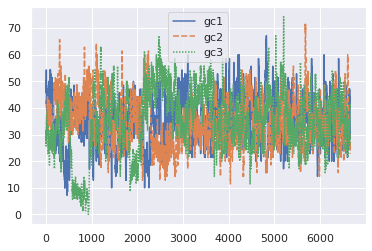

In [5]:
gc_df = generateGCPlot(seq, 210, 15) 
sns.set(rc={"figure.figsize":(20,4)})
sns.lineplot(data = gc_df)